<a href="https://colab.research.google.com/github/ksBrose/3DSGroup_BootcampDataScience/blob/main/atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto Data Science - Grupo 3DS

Foram baixados primeiramente os arquivos de dados telemétricos das cidades de Encantado, Muçum e Santa Tereza, no período de 01/08/2023 a 31/10/2023.
Para o município de Santa Tereza, foram baixados dados de 2 estações: Santa Tereza e Linha José Julio.

**Sites Referencia**
- https://www.snirh.gov.br/hidroweb/mapa
- https://www.snirh.gov.br/hidrotelemetria/serieHistorica.aspx

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime

## Base de dados de 3 meses

In [2]:
df_Encantado = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86720000-ENCANTADO.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86510000-MUCUM.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86472600-SANTA%20TEREZA.csv', encoding='ISO-8859-1', delimiter=';')
df_Lin_JJ = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/86472000-LINHA%20JOSE%20JULIO.csv', encoding='ISO-8859-1', delimiter=';')

In [3]:
df_Encantado['Data_Hora'] = pd.to_datetime(df_Encantado['Data'] + ' ' + df_Encantado['Hora'], format='%d/%m/%Y %H:%M:%S')
df_Encantado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071 entries, 0 to 6070
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          6071 non-null   object        
 1   Hora          6071 non-null   object        
 2   Chuva (mm)    6071 non-null   object        
 3   Nível (cm)    6071 non-null   object        
 4   Vazão (m3/s)  3709 non-null   object        
 5   Unnamed: 5    0 non-null      float64       
 6   Data_Hora     6071 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 332.1+ KB


In [4]:
df_Encantado.head()

Data      Hora      Chuva (mm)        Nível (cm) Vazão (m3/s)  \
0  01/08/2023  02:30:00  0               228                     251.8   
1  01/08/2023  02:45:00  0               228                     251.8   
2  01/08/2023  03:00:00  0               228                     251.8   
3  01/08/2023  03:15:00  0               227                     248.1   
4  01/08/2023  03:30:00  0               227                     248.1   

   Unnamed: 5           Data_Hora  
0         NaN 2023-08-01 02:30:00  
1         NaN 2023-08-01 02:45:00  
2         NaN 2023-08-01 03:00:00  
3         NaN 2023-08-01 03:15:00  
4         NaN 2023-08-01 03:30:00

In [5]:
df_Encantado.tail()

Data      Hora      Chuva (mm)        Nível (cm) Vazão (m3/s)  \
6066  30/10/2023  23:00:00  0               197                     146.1   
6067  30/10/2023  23:15:00  0               197                     146.1   
6068  30/10/2023  23:30:00  0               197                     146.1   
6069  30/10/2023  23:45:00  0               197                     146.1   
6070  31/10/2023  00:00:00  0               197                     146.1   

      Unnamed: 5           Data_Hora  
6066         NaN 2023-10-30 23:00:00  
6067         NaN 2023-10-30 23:15:00  
6068         NaN 2023-10-30 23:30:00  
6069         NaN 2023-10-30 23:45:00  
6070         NaN 2023-10-31 00:00:00

Text(0, 0.5, 'Nivel')

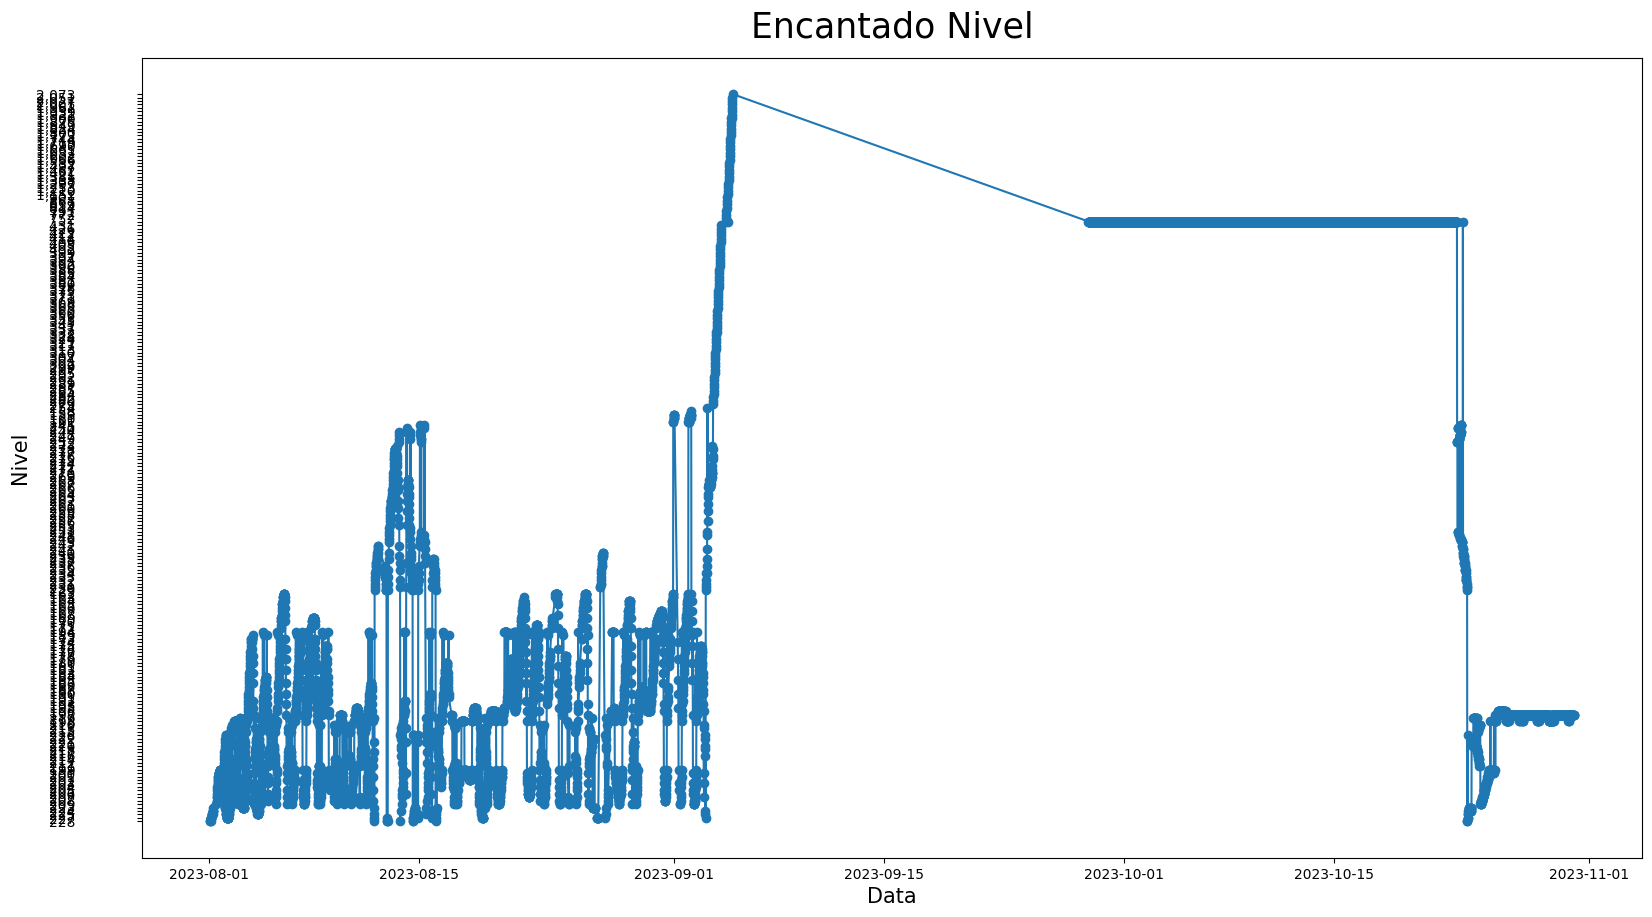

In [6]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

#eixo.scatter(df_Encantado['Data_Hora'], df_Encantado['Nível (cm)'])
eixo.plot(df_Encantado['Data_Hora'], df_Encantado['Nível (cm)'], marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
eixo.set_title('Encantado Nivel', fontsize=25, pad=15)
eixo.set_xlabel('Data', fontsize=15)
eixo.set_ylabel('Nivel', fontsize=15)

## Base de dados de 1 ano

In [7]:
df_Encantado24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86720000-ENCANTADO-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Encantado23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86720000-ENCANTADO-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86510000-MUCUM-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Mucum23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86510000-MUCUM-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472600-SANTA-TEREZA-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Sta_Tereza23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472600-SANTA-TEREZA-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Jose_Julio24 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472000-LINHA-JOSE-JULIO-2024-2023.csv', encoding='ISO-8859-1', delimiter=';')
df_Jose_Julio23 = pd.read_csv('https://raw.githubusercontent.com/ksBrose/3DSGroup_BootcampDataScience/master/5-86472000-LINHA-JOSE-JULIO-2023-2022.csv', encoding='ISO-8859-1', delimiter=';')

In [8]:
df_Encantado24 = df_Encantado24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Encantado23 = df_Encantado23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Mucum24 = df_Mucum24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Mucum23 = df_Mucum23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Sta_Tereza24 = df_Sta_Tereza24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Sta_Tereza23 = df_Sta_Tereza23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Jose_Julio24 = df_Jose_Julio24.drop(['Bateria(V)', 'TempInt(C)'], axis=1)
df_Jose_Julio23 = df_Jose_Julio23.drop(['Bateria(V)', 'TempInt(C)'], axis=1)

In [9]:
df_Encantado24.head()

Data/Hora  Chuva(mm)  Nivel(cm)  Vazao(m3/s)
0  23/10/2024 15:00        0.0      100.0         0.11
1  23/10/2024 14:45        0.0      100.0         0.11
2  23/10/2024 14:30        0.0      100.0         0.11
3  23/10/2024 14:15        0.0       99.0          NaN
4  23/10/2024 14:00        0.0       99.0          NaN

In [10]:
df_Encantado24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35124 entries, 0 to 35123
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data/Hora    35124 non-null  object 
 1   Chuva(mm)    34991 non-null  float64
 2   Nivel(cm)    25415 non-null  float64
 3   Vazao(m3/s)  26309 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.1+ MB


- Alterar Dtype Data/Hora para variavel datetime

In [11]:
df_Encantado24['Data/Hora'] = pd.to_datetime(df_Encantado24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Encantado23['Data/Hora'] = pd.to_datetime(df_Encantado23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum24['Data/Hora'] = pd.to_datetime(df_Mucum24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum23['Data/Hora'] = pd.to_datetime(df_Mucum23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza24['Data/Hora'] = pd.to_datetime(df_Sta_Tereza24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza23['Data/Hora'] = pd.to_datetime(df_Sta_Tereza23['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio24['Data/Hora'] = pd.to_datetime(df_Jose_Julio24['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio23['Data/Hora'] = pd.to_datetime(df_Jose_Julio23['Data/Hora'], format='%d/%m/%Y %H:%M')

In [12]:
df_Encantado24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35124 entries, 0 to 35123
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    35124 non-null  datetime64[ns]
 1   Chuva(mm)    34991 non-null  float64       
 2   Nivel(cm)    25415 non-null  float64       
 3   Vazao(m3/s)  26309 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.1 MB


In [13]:
print('Quantidade de linhas e colunas:', df_Encantado24.shape)
print('Quantidade de dados nulos:', df_Encantado24.isna().sum().sum())

Quantidade de linhas e colunas: (35124, 4)
Quantidade de dados nulos: 18657


In [14]:
df_Encantado_unico = pd.concat([df_Encantado24, df_Encantado23]).drop_duplicates().reset_index(drop=True)
df_Encantado_unico['Data/Hora'] = pd.to_datetime(df_Encantado_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Mucum_unico = pd.concat([df_Mucum24, df_Mucum23]).drop_duplicates().reset_index(drop=True)
df_Mucum_unico['Data/Hora'] = pd.to_datetime(df_Mucum_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Sta_Tereza_unico = pd.concat([df_Sta_Tereza24, df_Sta_Tereza23]).drop_duplicates().reset_index(drop=True)
df_Sta_Tereza_unico['Data/Hora'] = pd.to_datetime(df_Sta_Tereza_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Jose_Julio_unico = pd.concat([df_Jose_Julio24, df_Jose_Julio23]).drop_duplicates().reset_index(drop=True)
df_Jose_Julio_unico['Data/Hora'] = pd.to_datetime(df_Jose_Julio_unico['Data/Hora'], format='%d/%m/%Y %H:%M')
df_Encantado_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64814 entries, 0 to 64813
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    64814 non-null  datetime64[ns]
 1   Chuva(mm)    62248 non-null  float64       
 2   Nivel(cm)    52718 non-null  float64       
 3   Vazao(m3/s)  53612 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 MB


In [15]:
df_Mucum_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69397 entries, 0 to 69396
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    69397 non-null  datetime64[ns]
 1   Chuva(mm)    69201 non-null  float64       
 2   Nivel(cm)    68913 non-null  float64       
 3   Vazao(m3/s)  68913 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.1 MB


In [16]:
df_Sta_Tereza_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37003 entries, 0 to 37002
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    37003 non-null  datetime64[ns]
 1   Chuva(mm)    36961 non-null  float64       
 2   Nivel(cm)    36870 non-null  float64       
 3   Vazao(m3/s)  0 non-null      float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.1 MB


In [17]:
df_Jose_Julio_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67289 entries, 0 to 67288
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    67289 non-null  datetime64[ns]
 1   Chuva(mm)    66981 non-null  float64       
 2   Nivel(cm)    55443 non-null  float64       
 3   Vazao(m3/s)  55443 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.1 MB


In [18]:
df_Encantado_unico.head()

Data/Hora  Chuva(mm)  Nivel(cm)  Vazao(m3/s)
0 2024-10-23 15:00:00        0.0      100.0         0.11
1 2024-10-23 14:45:00        0.0      100.0         0.11
2 2024-10-23 14:30:00        0.0      100.0         0.11
3 2024-10-23 14:15:00        0.0       99.0          NaN
4 2024-10-23 14:00:00        0.0       99.0          NaN

In [19]:
df_Encantado_unico.tail()

Data/Hora  Chuva(mm)  Nivel(cm)  Vazao(m3/s)
64809 2022-10-22 16:15:00        0.0      223.0        233.2
64810 2022-10-22 16:00:00        0.0      224.0        236.9
64811 2022-10-22 15:45:00        0.0      226.0        244.3
64812 2022-10-22 15:30:00        0.0      226.0        244.3
64813 2022-10-22 15:15:00        0.0      227.0        248.1

# Tratamento de dados chuva e vazao

In [20]:
df_Encantado_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64814 entries, 0 to 64813
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    64814 non-null  datetime64[ns]
 1   Chuva(mm)    62248 non-null  float64       
 2   Nivel(cm)    52718 non-null  float64       
 3   Vazao(m3/s)  53612 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 MB


Para chuva vamos substituir valores nulos por zeros

In [21]:
df_Encantado_unico['Chuva(mm)'] = df_Encantado_unico['Chuva(mm)'].fillna(0)

para vazão vamos interpolar os valores nulos

In [22]:
df_Encantado_unico['Vazao(m3/s)'] = df_Encantado_unico['Vazao(m3/s)'].interpolate(method='linear')

In [23]:
df_Encantado_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64814 entries, 0 to 64813
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    64814 non-null  datetime64[ns]
 1   Chuva(mm)    64814 non-null  float64       
 2   Nivel(cm)    52718 non-null  float64       
 3   Vazao(m3/s)  64814 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 MB


# Plotando graficos Nivel (ano)




In [24]:
def plotar_matplot(titulo, labelx, labely, x, y, dataset):
  fig = plt.figure(figsize=(15,8))
  eixo = fig.add_axes([0,0,1,1])
  eixo.plot(x, y, data = dataset, marker='o', linestyle='-')  # 'o-' combina linha com pontos nas marcações
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)
  eixo = eixo

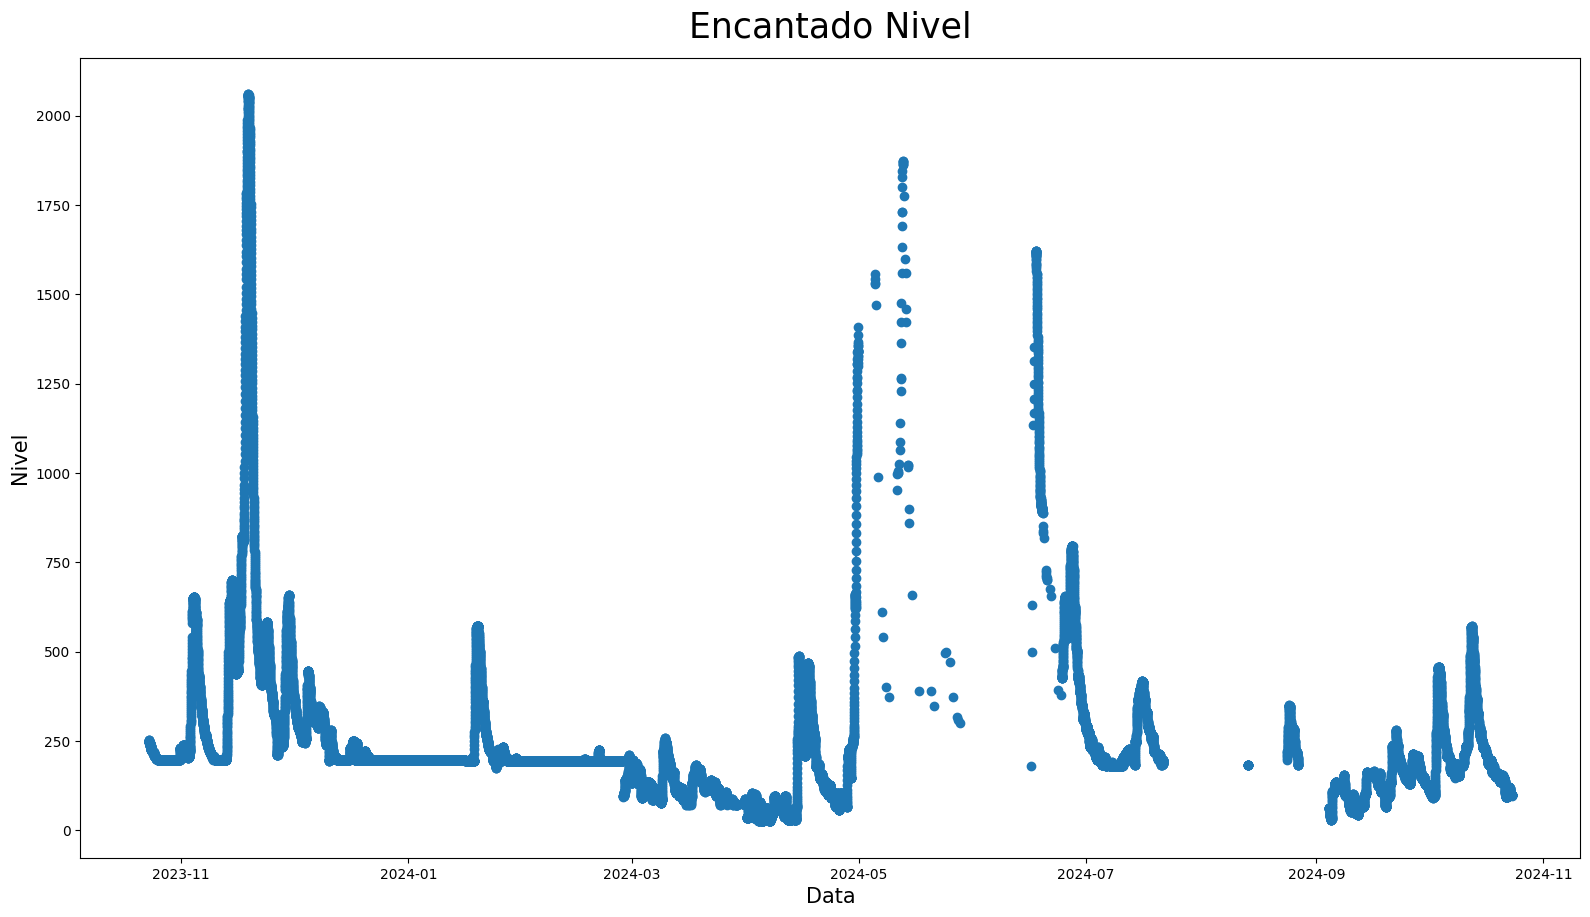

In [25]:
plotar_matplot('Encantado Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado24)

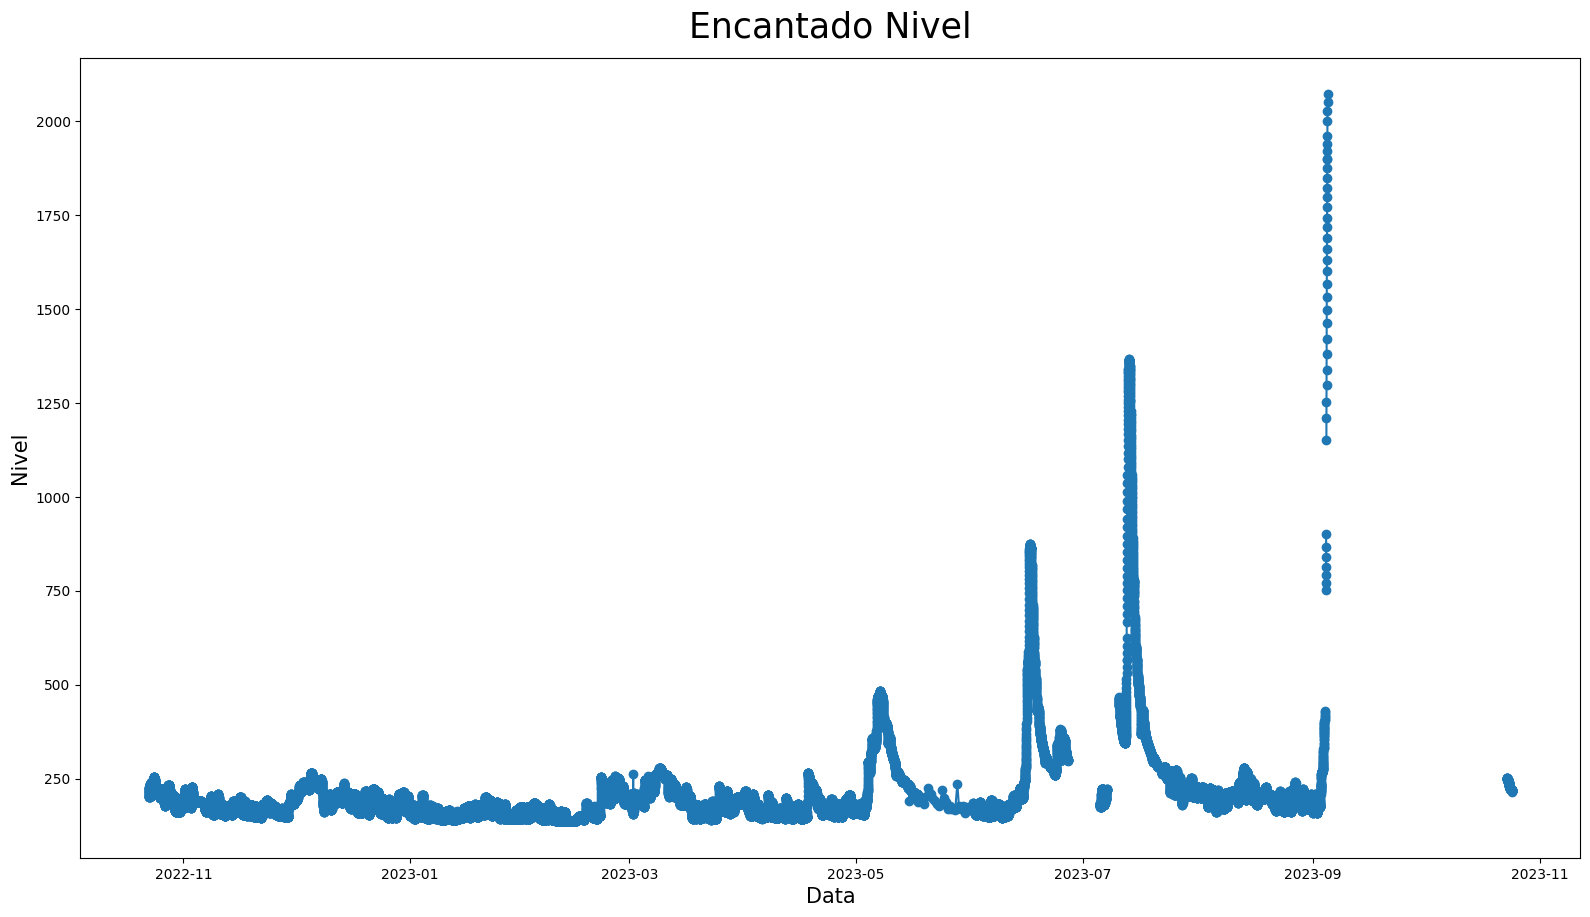

In [26]:
plotar_matplot('Encantado Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado23)

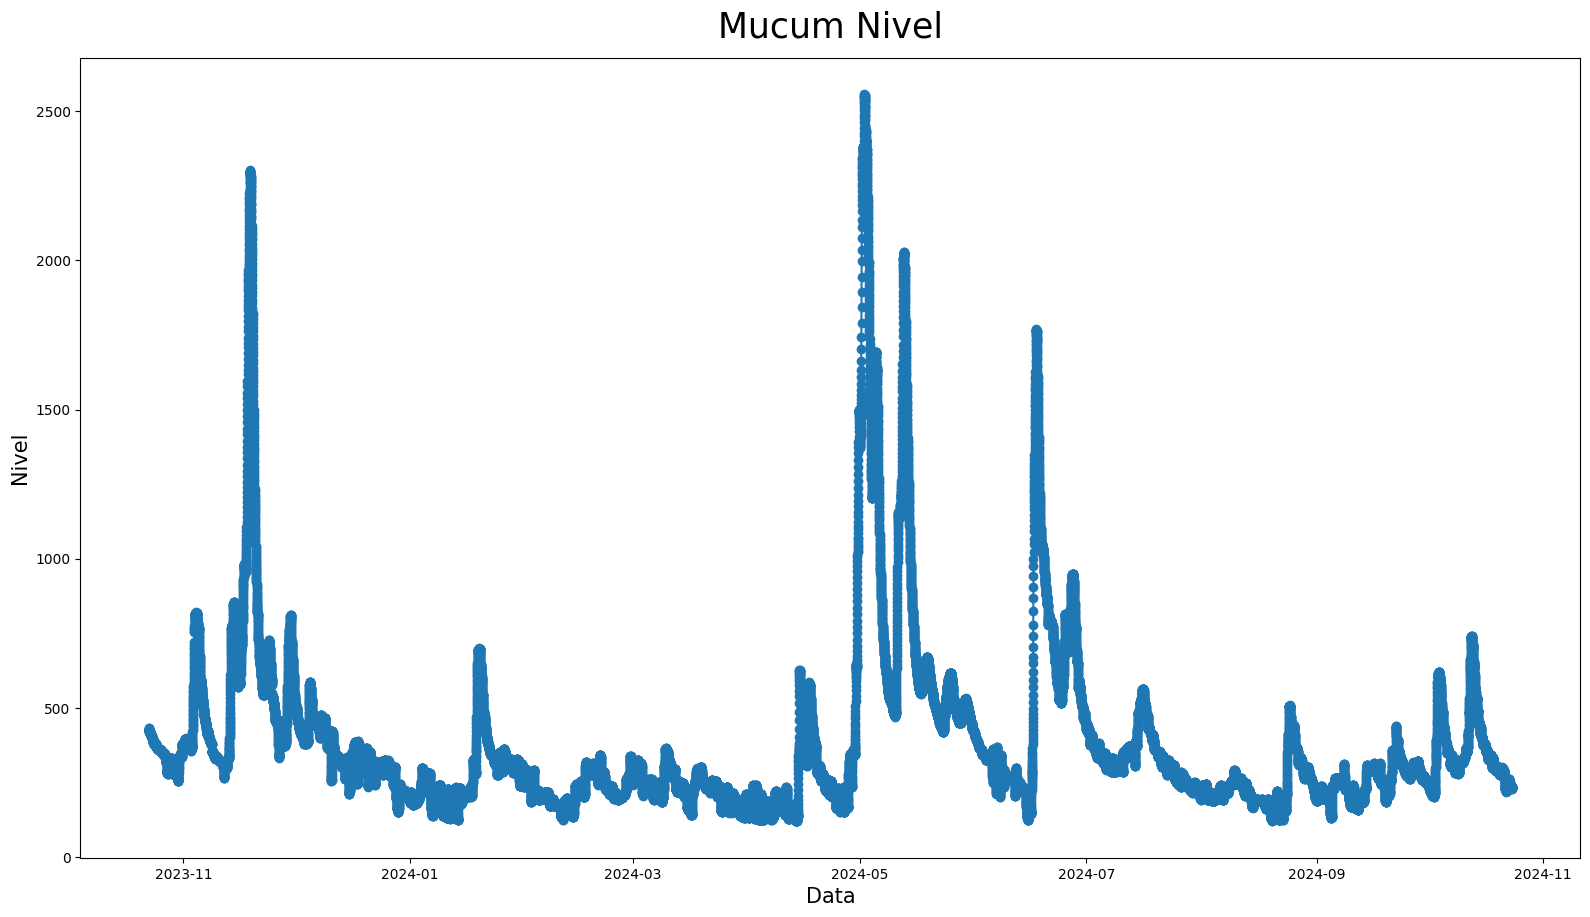

In [27]:
plotar_matplot('Mucum Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum24)

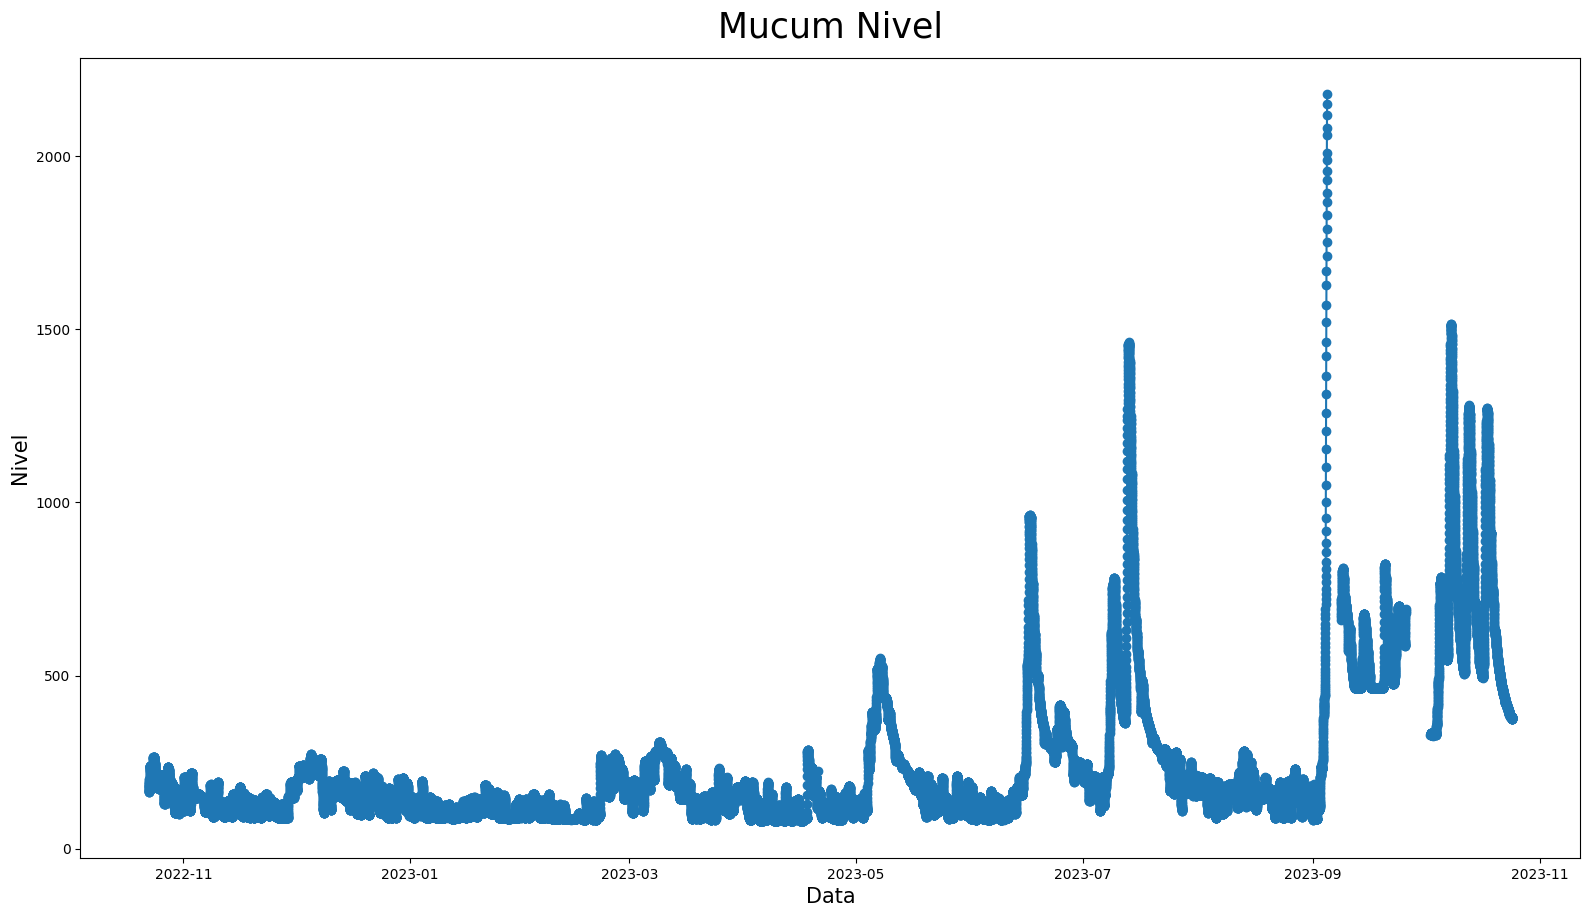

In [28]:
plotar_matplot('Mucum Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum23)

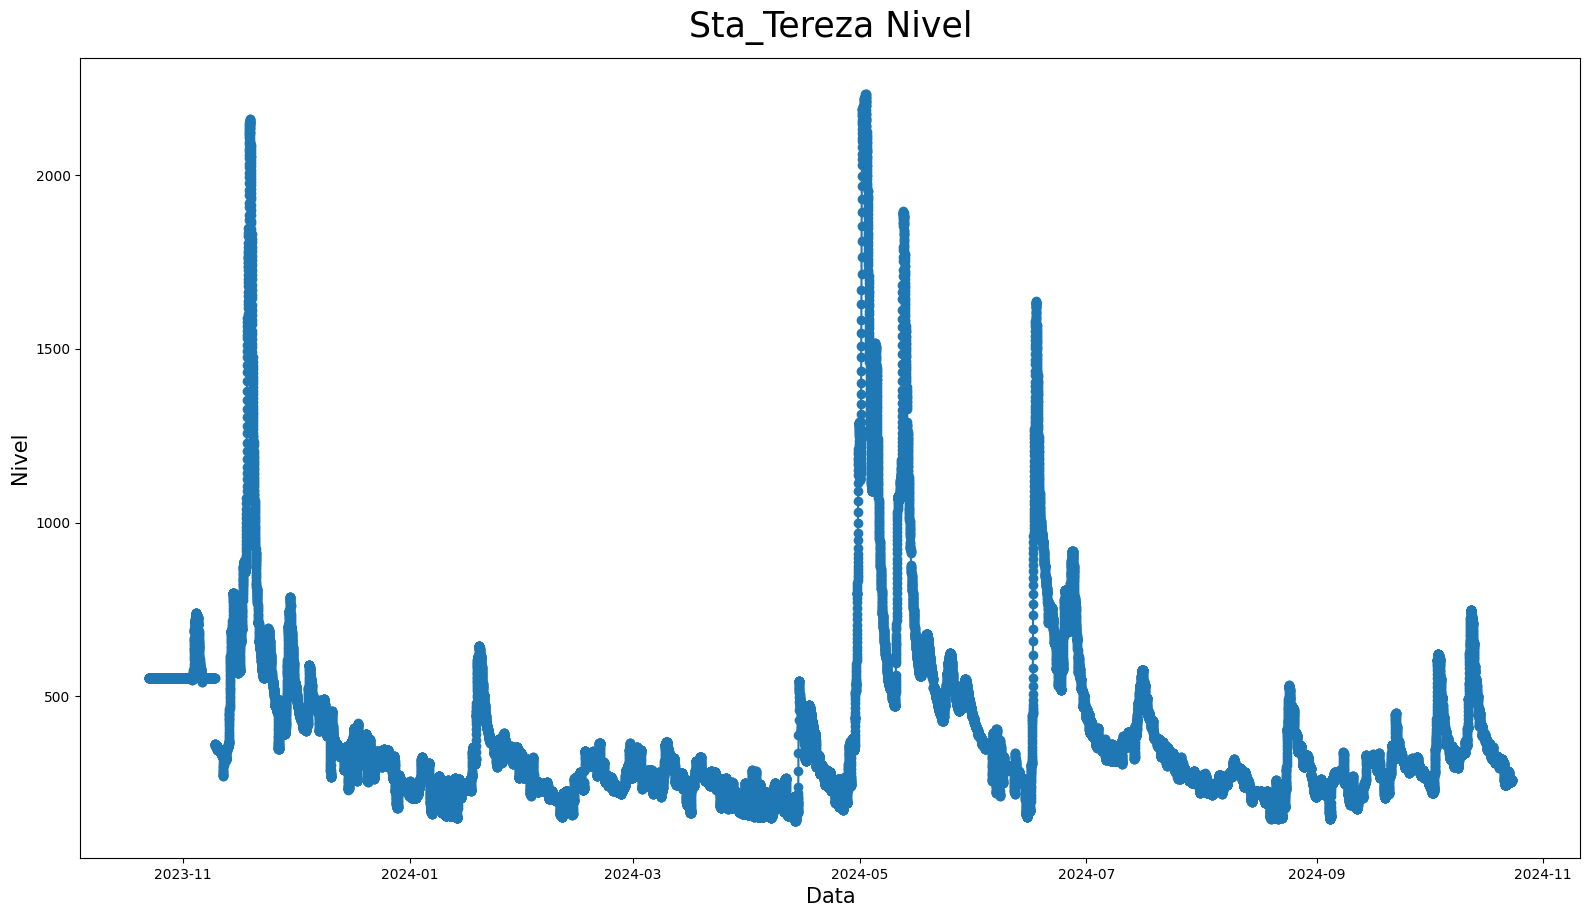

In [29]:
plotar_matplot('Sta_Tereza Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza24)

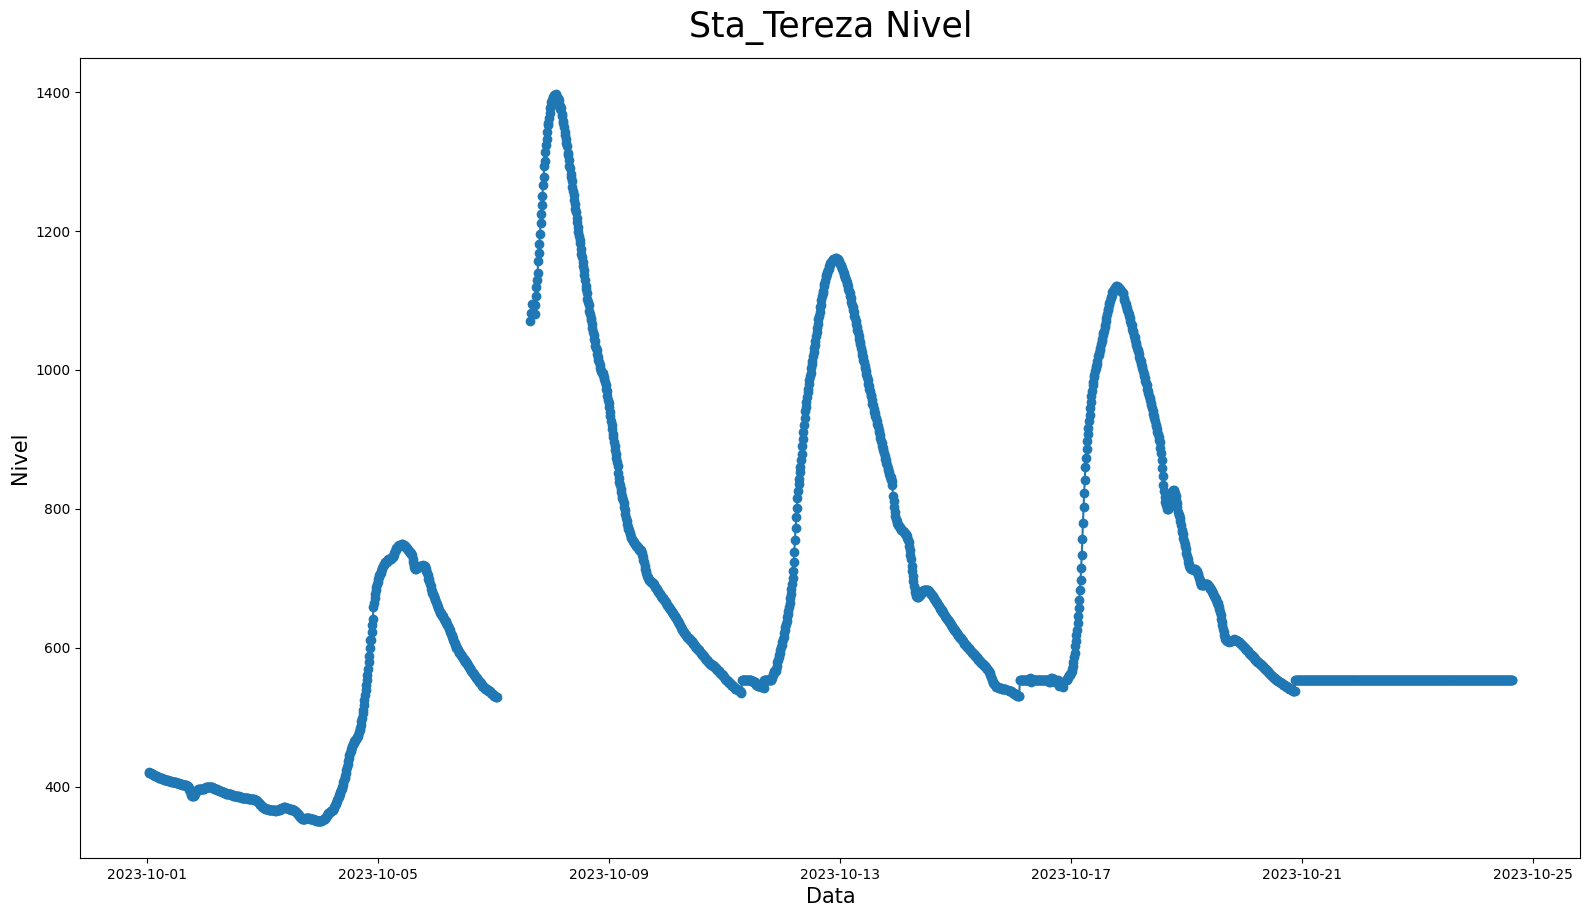

In [30]:
plotar_matplot('Sta_Tereza Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza23)

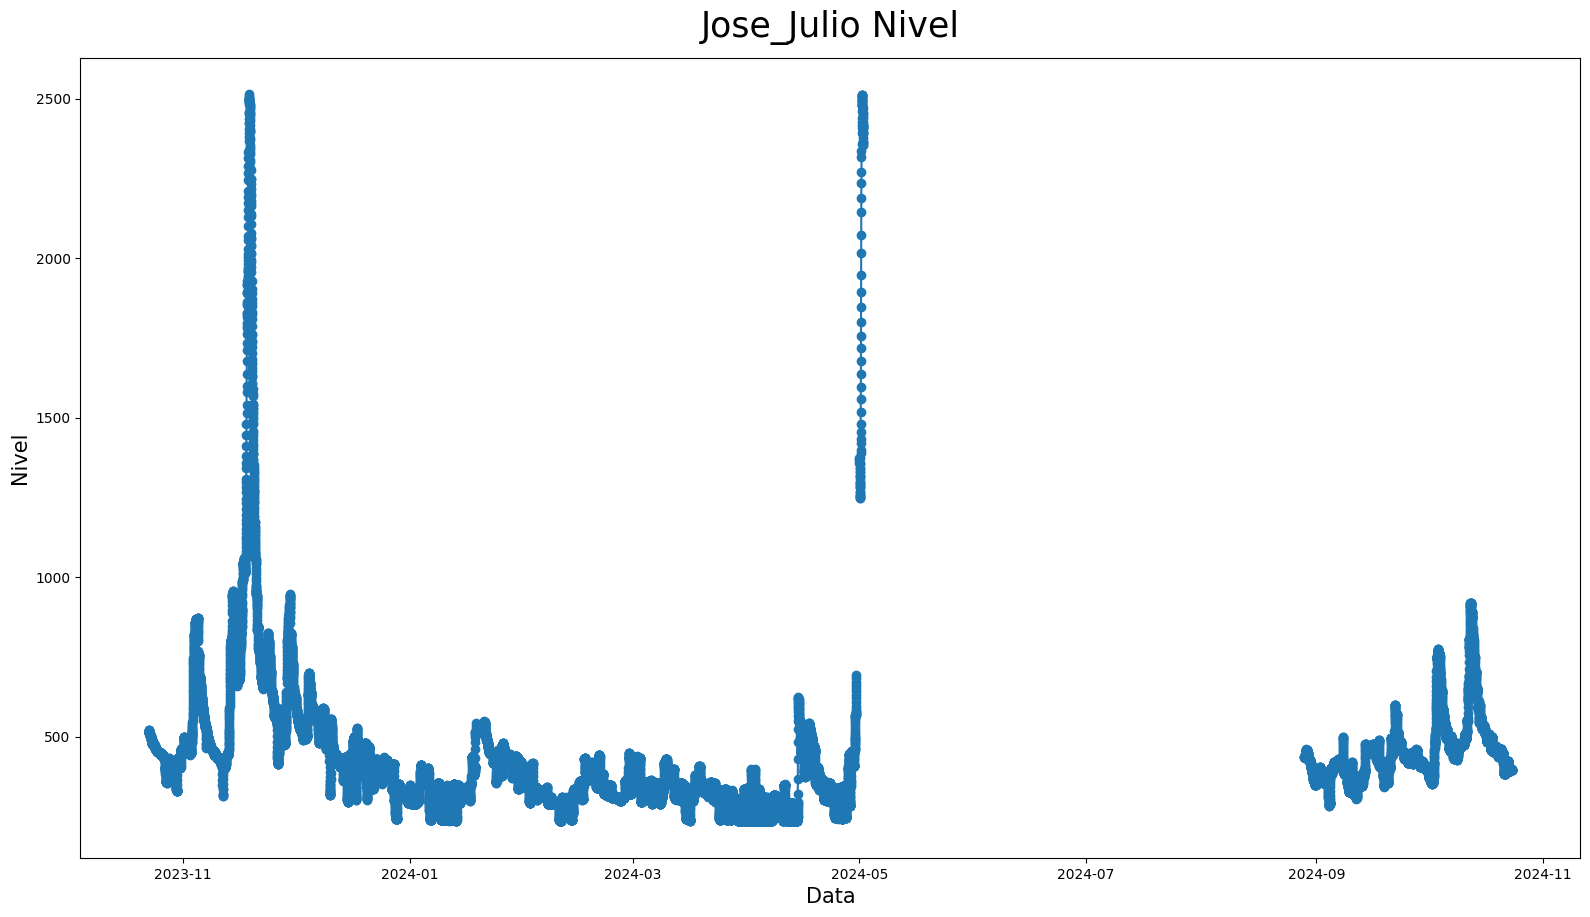

In [31]:
plotar_matplot('Jose_Julio Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio24)

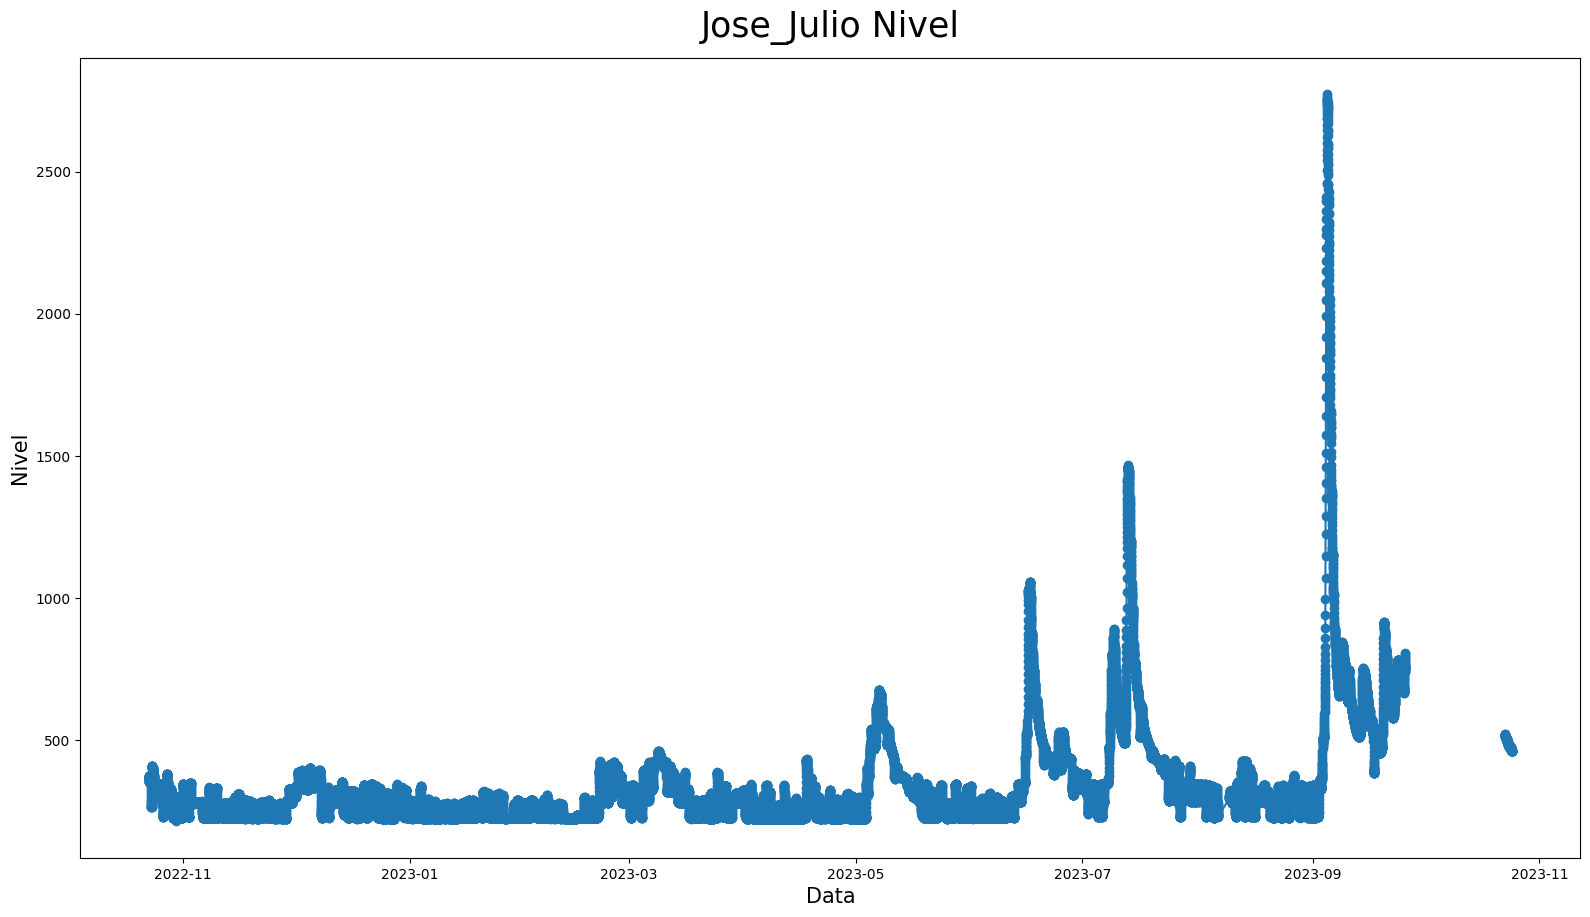

In [32]:
plotar_matplot('Jose_Julio Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio23)

# Boxplot

In [33]:
def plotar_matplot(titulo, labelx, labely, x, y, dataset, tipo='linha'):
    # Verificar se o dataset não está vazio
    if dataset.empty:
        print("O dataset está vazio.")
        return

    # Verificar se as colunas especificadas existem no dataset
    if x not in dataset.columns or y not in dataset.columns:
        print(f"As colunas '{x}' e '{y}' devem existir no dataset.")
        return

    fig = plt.figure(figsize=(15, 8))
    eixo = fig.add_axes([0, 0, 1, 1])

    if tipo == 'linha':
        eixo.plot(dataset[x], dataset[y], marker='o', linestyle='-')  # Gráfico de linha com pontos
    elif tipo == 'boxplot':
        # Remover nulos apenas da coluna y
        dataset_cleaned = dataset.dropna(subset=[y])
        eixo.boxplot(dataset_cleaned[y], vert=True)
        eixo.set_xticklabels([labelx])  # Rótulo do eixo x

    # Configurar título e rótulos dos eixos
    eixo.set_title(titulo, fontsize=25, pad=15)
    eixo.set_xlabel(labelx, fontsize=15)
    eixo.set_ylabel(labely, fontsize=15)

    plt.show()


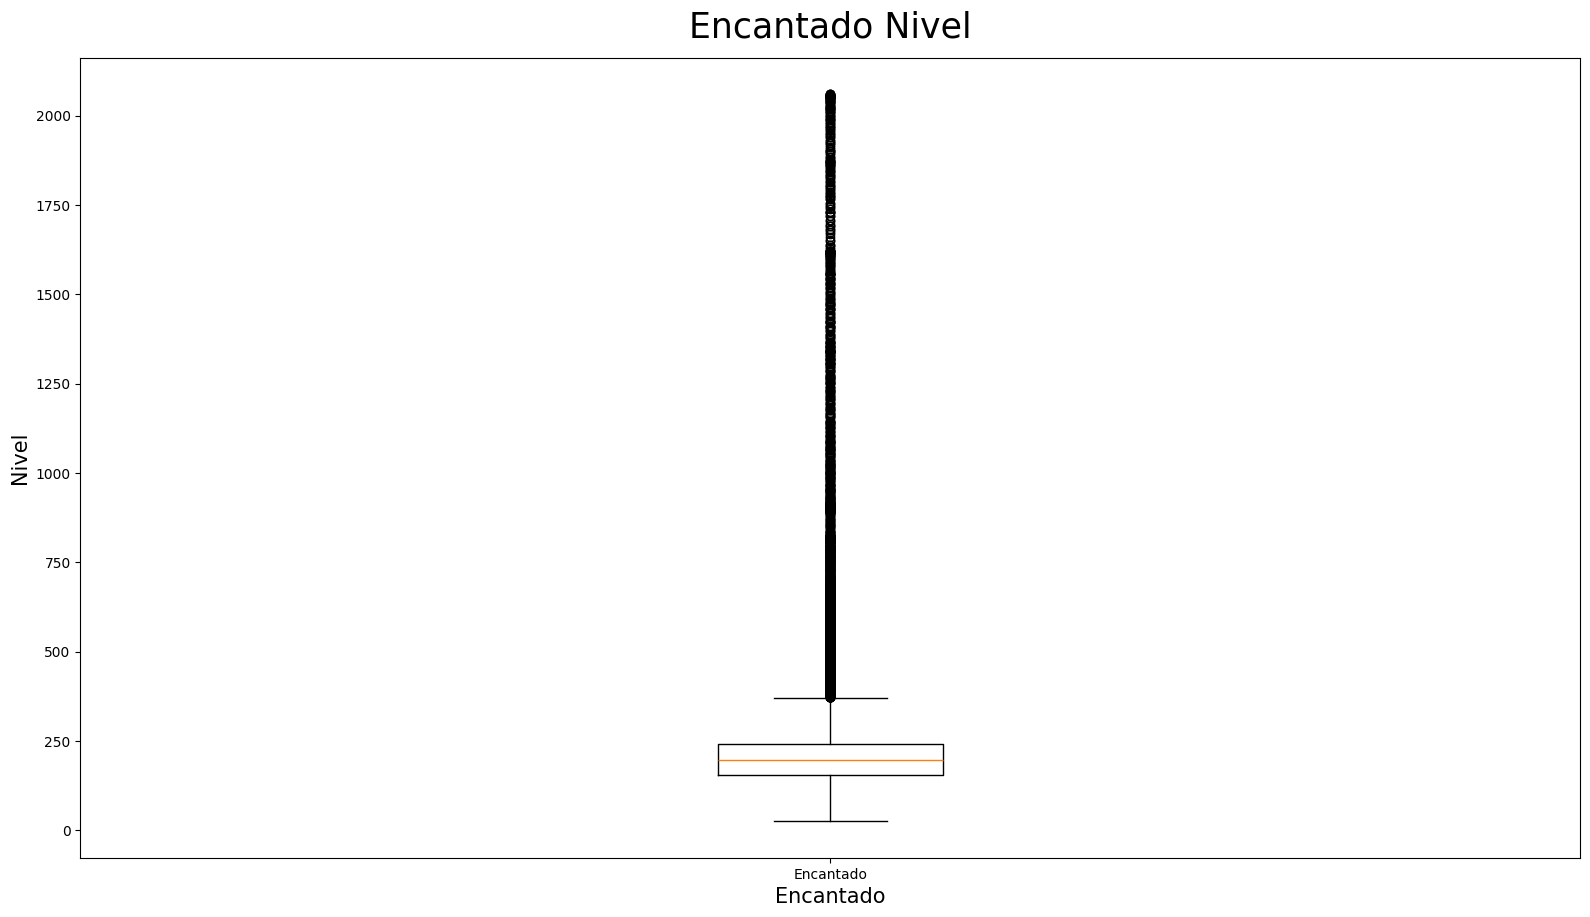

In [34]:
plotar_matplot('Encantado Nivel', 'Encantado', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado24, tipo='boxplot')

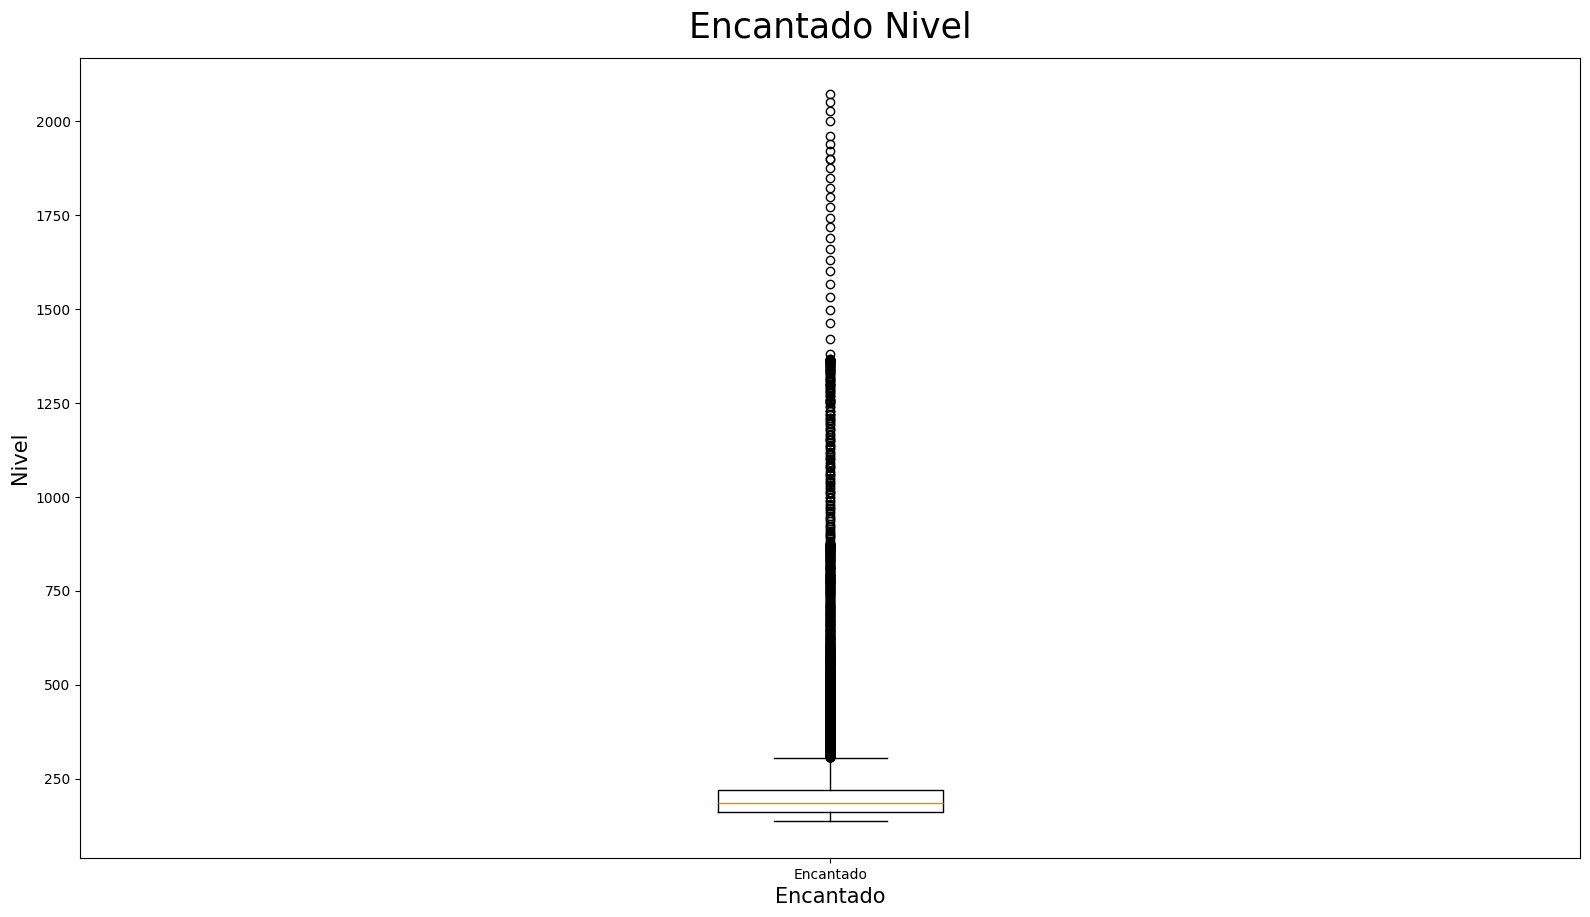

In [35]:
plotar_matplot('Encantado Nivel', 'Encantado', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado23, tipo='boxplot')

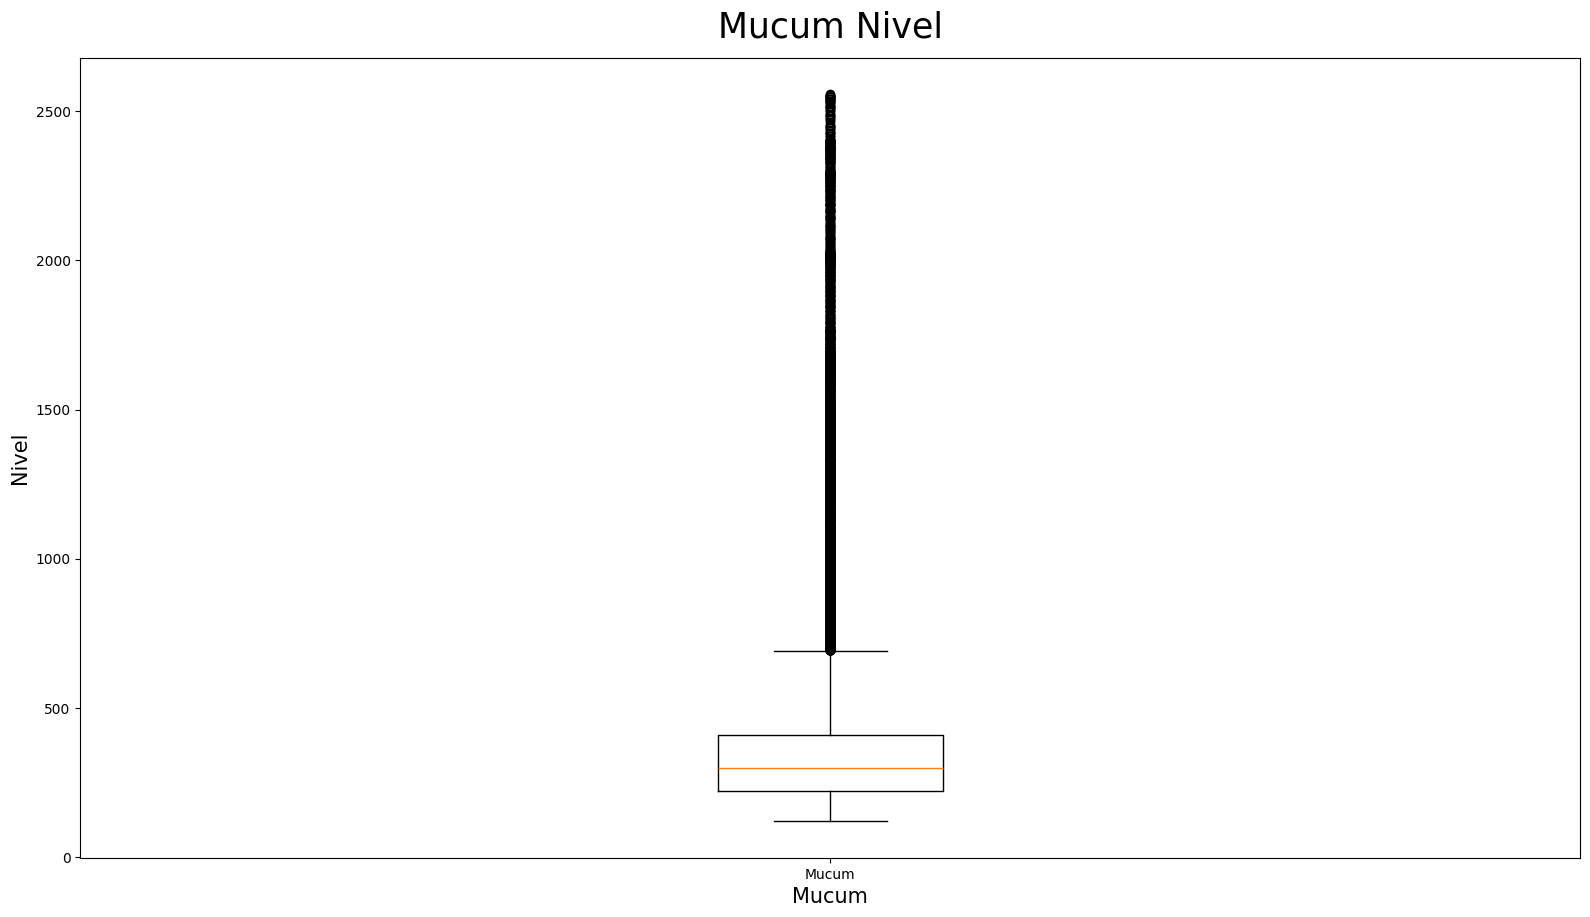

In [36]:
plotar_matplot('Mucum Nivel', 'Mucum', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum24, tipo='boxplot')

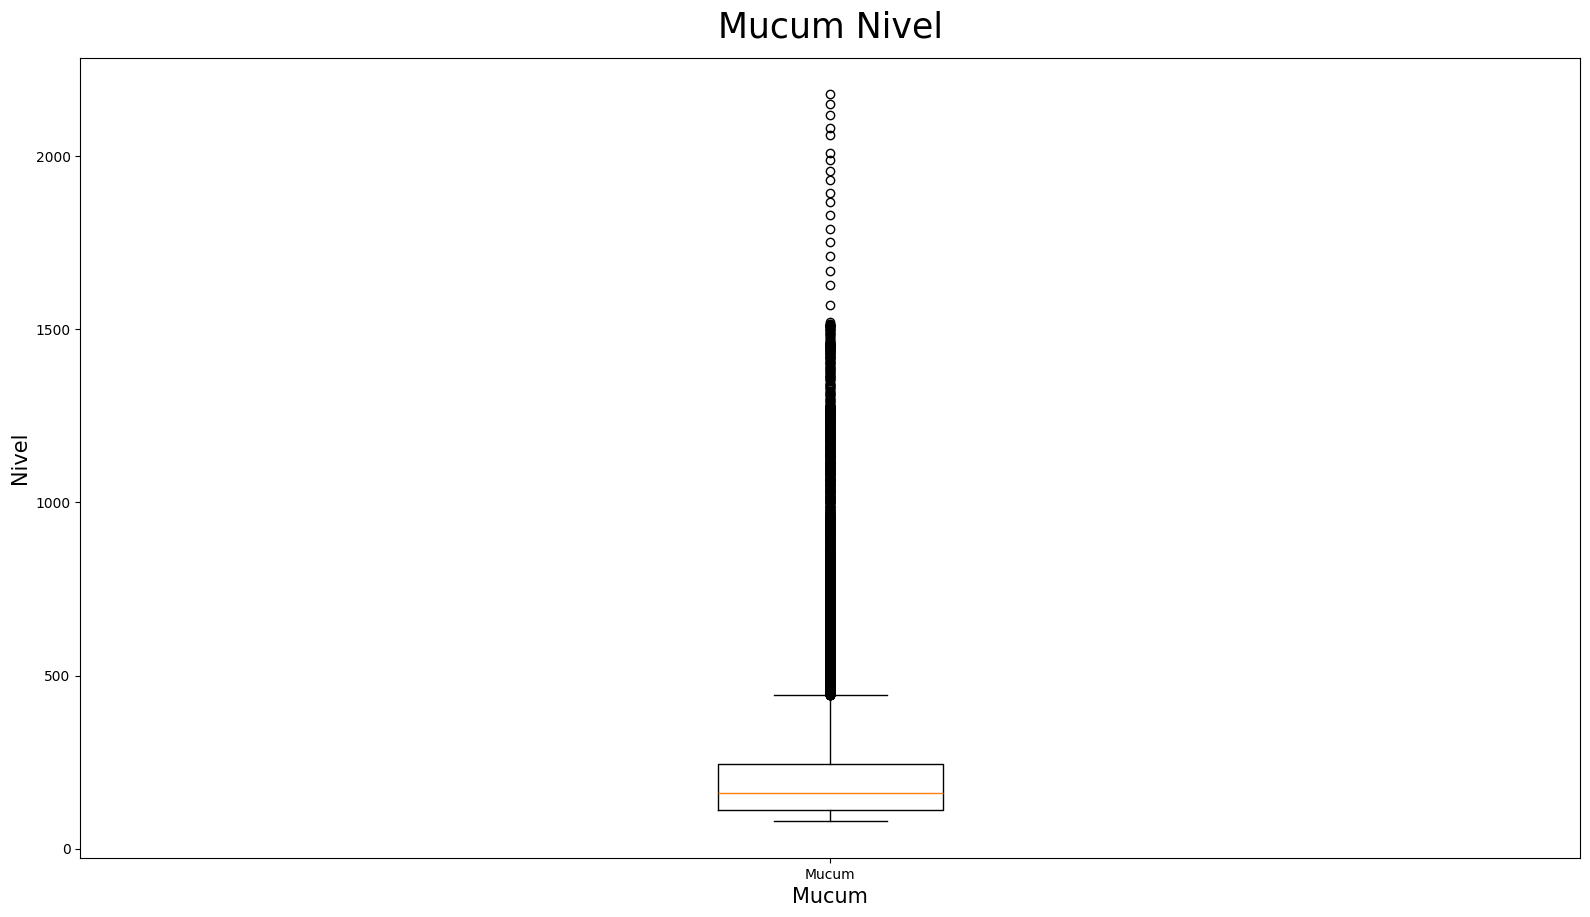

In [37]:
plotar_matplot('Mucum Nivel', 'Mucum', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum23, tipo='boxplot')

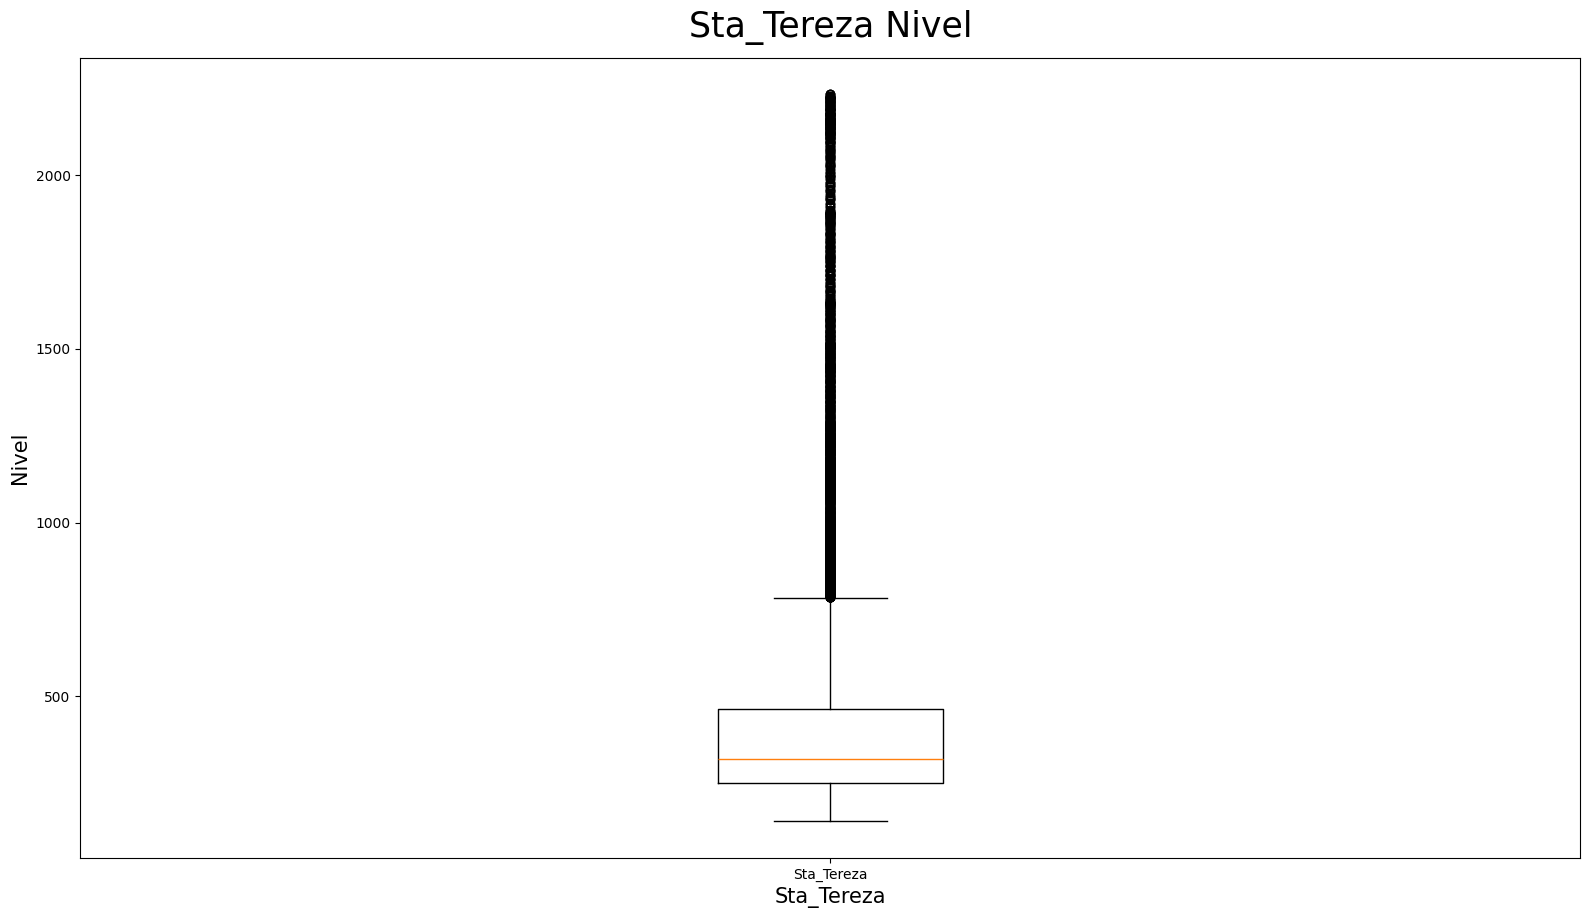

In [38]:
plotar_matplot('Sta_Tereza Nivel', 'Sta_Tereza', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza24, tipo='boxplot')

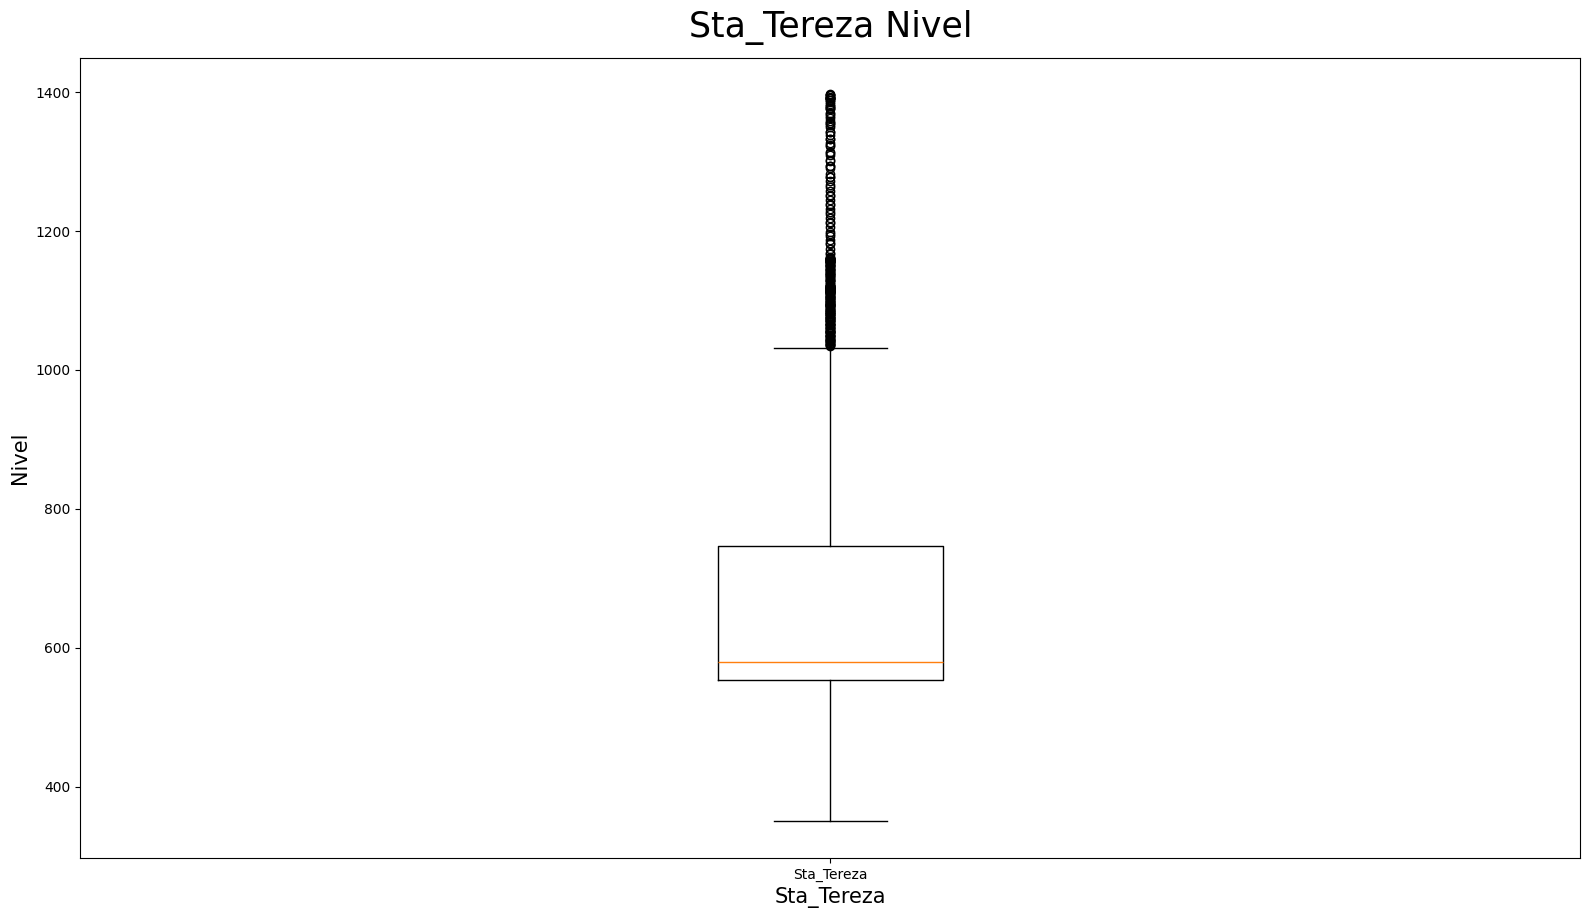

In [39]:
plotar_matplot('Sta_Tereza Nivel', 'Sta_Tereza', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza23, tipo='boxplot')

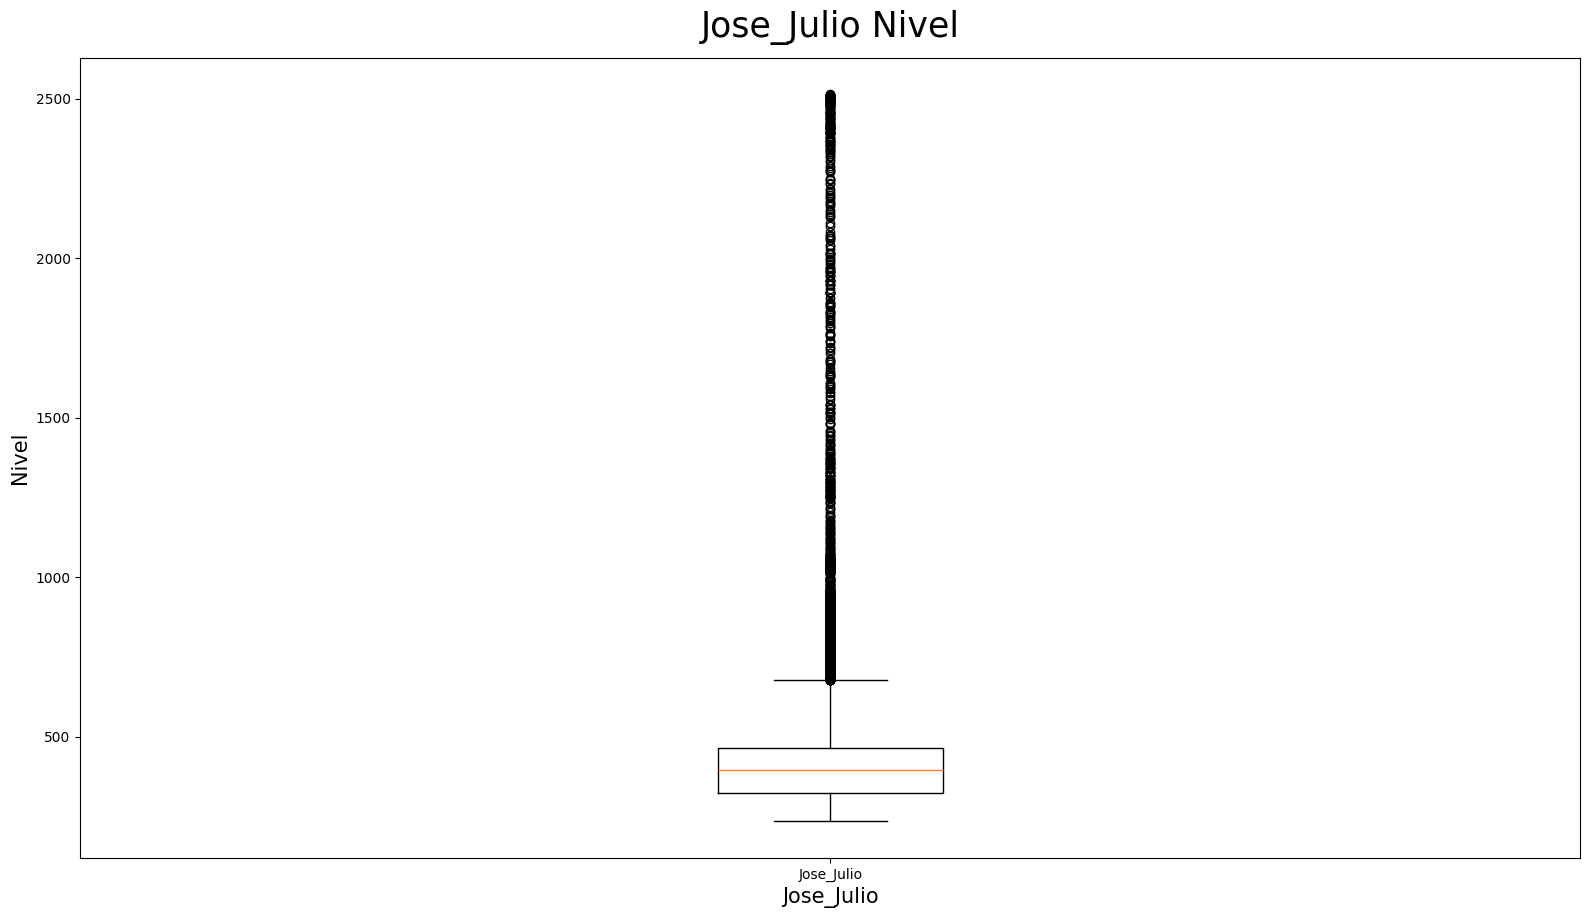

In [40]:
plotar_matplot('Jose_Julio Nivel', 'Jose_Julio', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio24, tipo='boxplot')

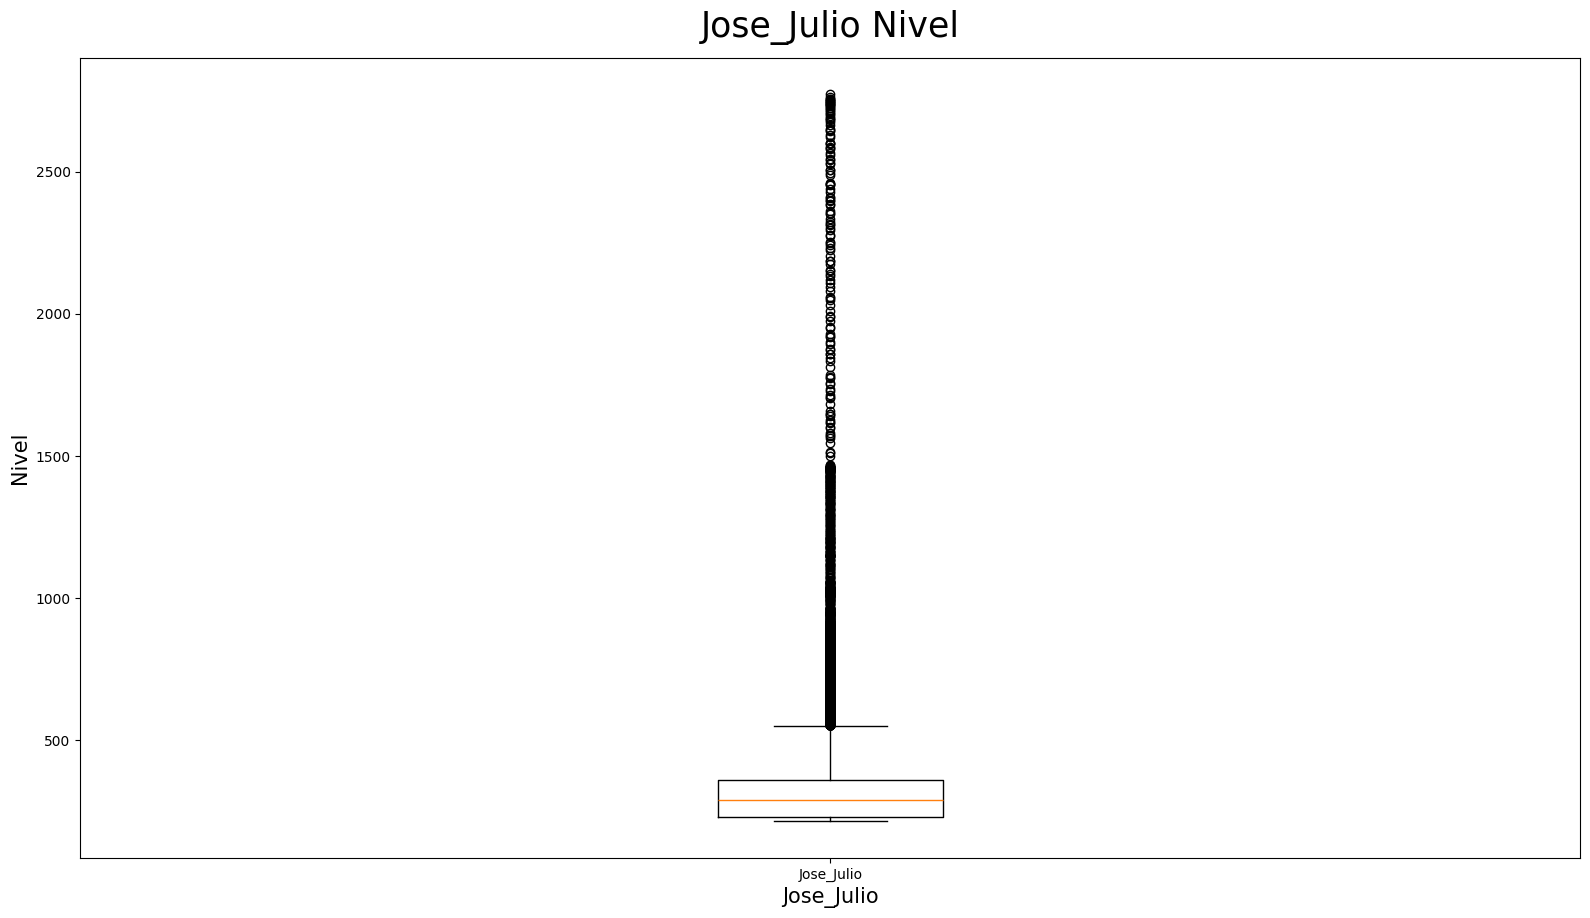

In [41]:
plotar_matplot('Jose_Julio Nivel', 'Jose_Julio', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio23, tipo='boxplot')

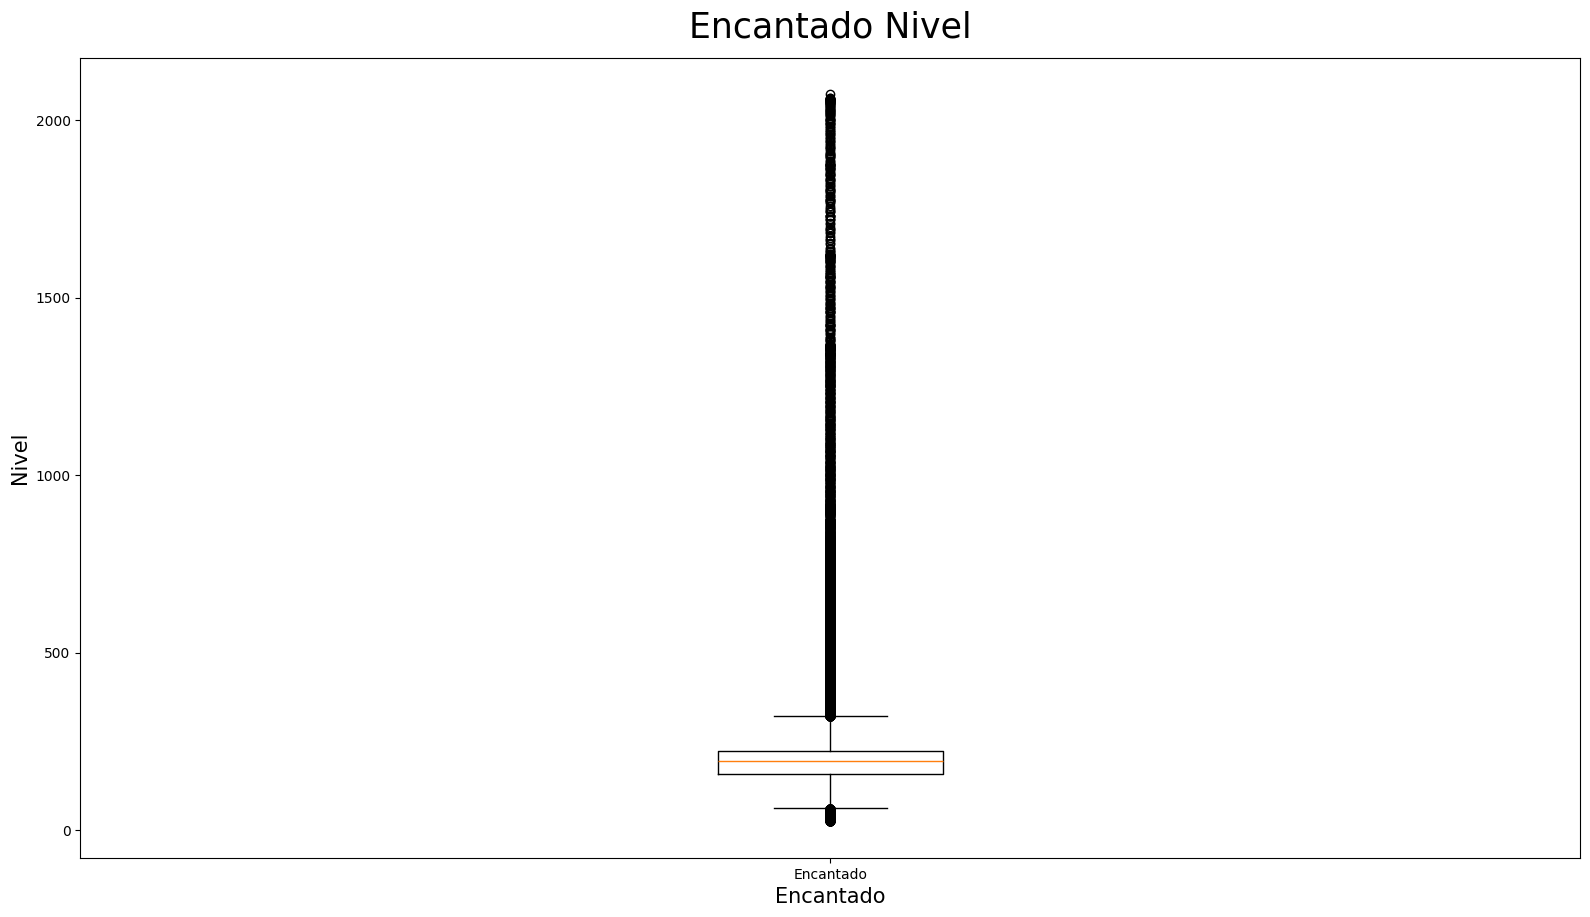

In [42]:
plotar_matplot('Encantado Nivel', 'Encantado', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado_unico, tipo='boxplot')

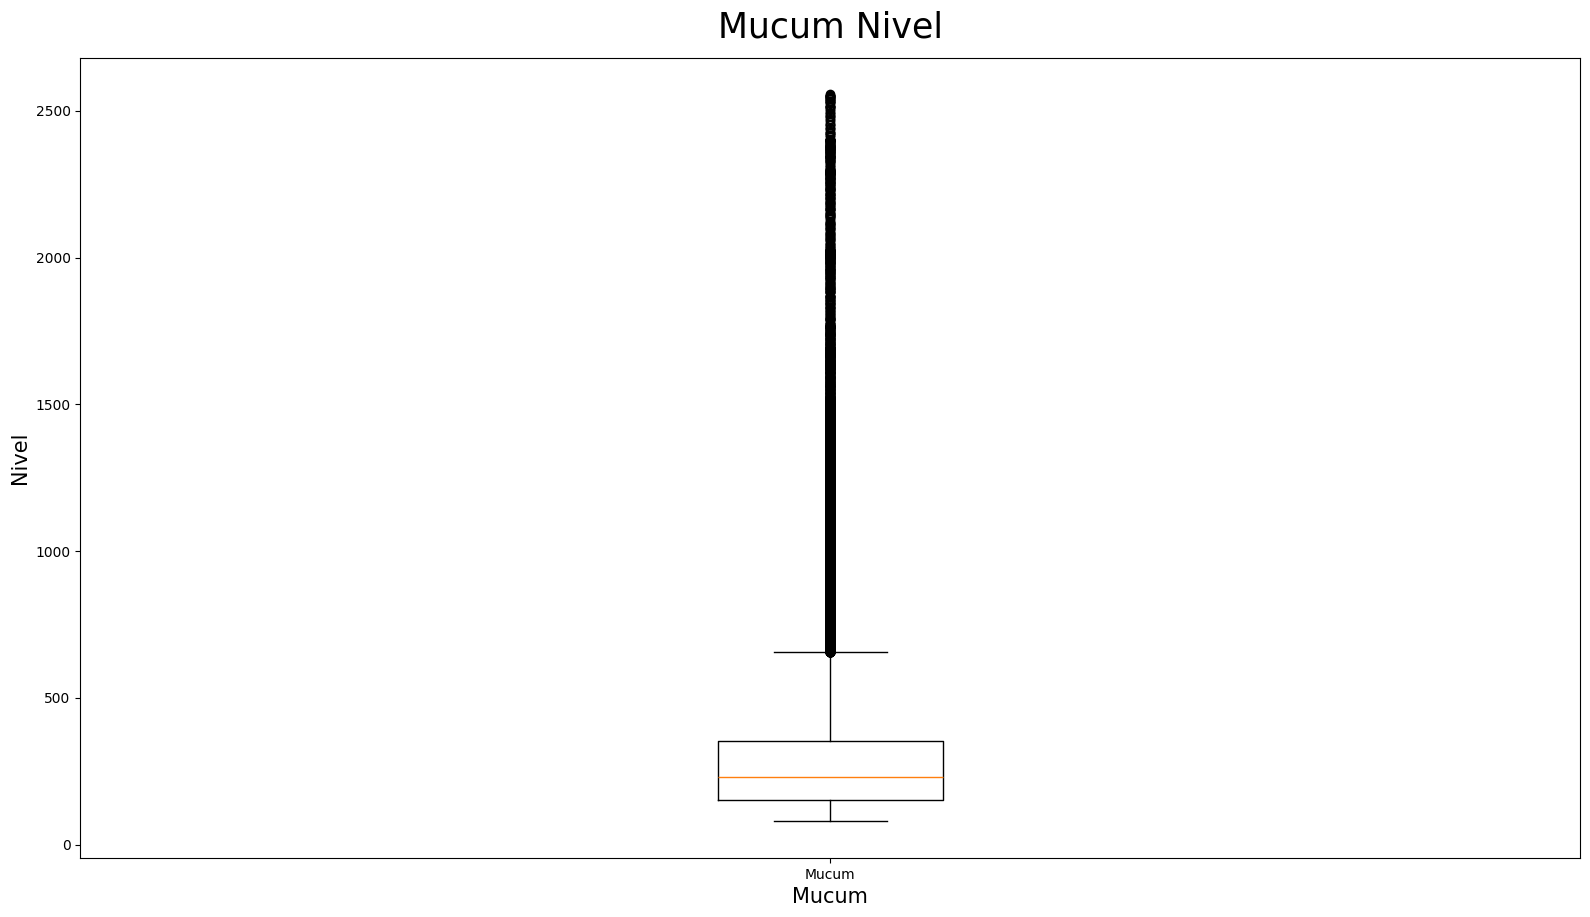

In [43]:
plotar_matplot('Mucum Nivel', 'Mucum', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Mucum_unico, tipo='boxplot')

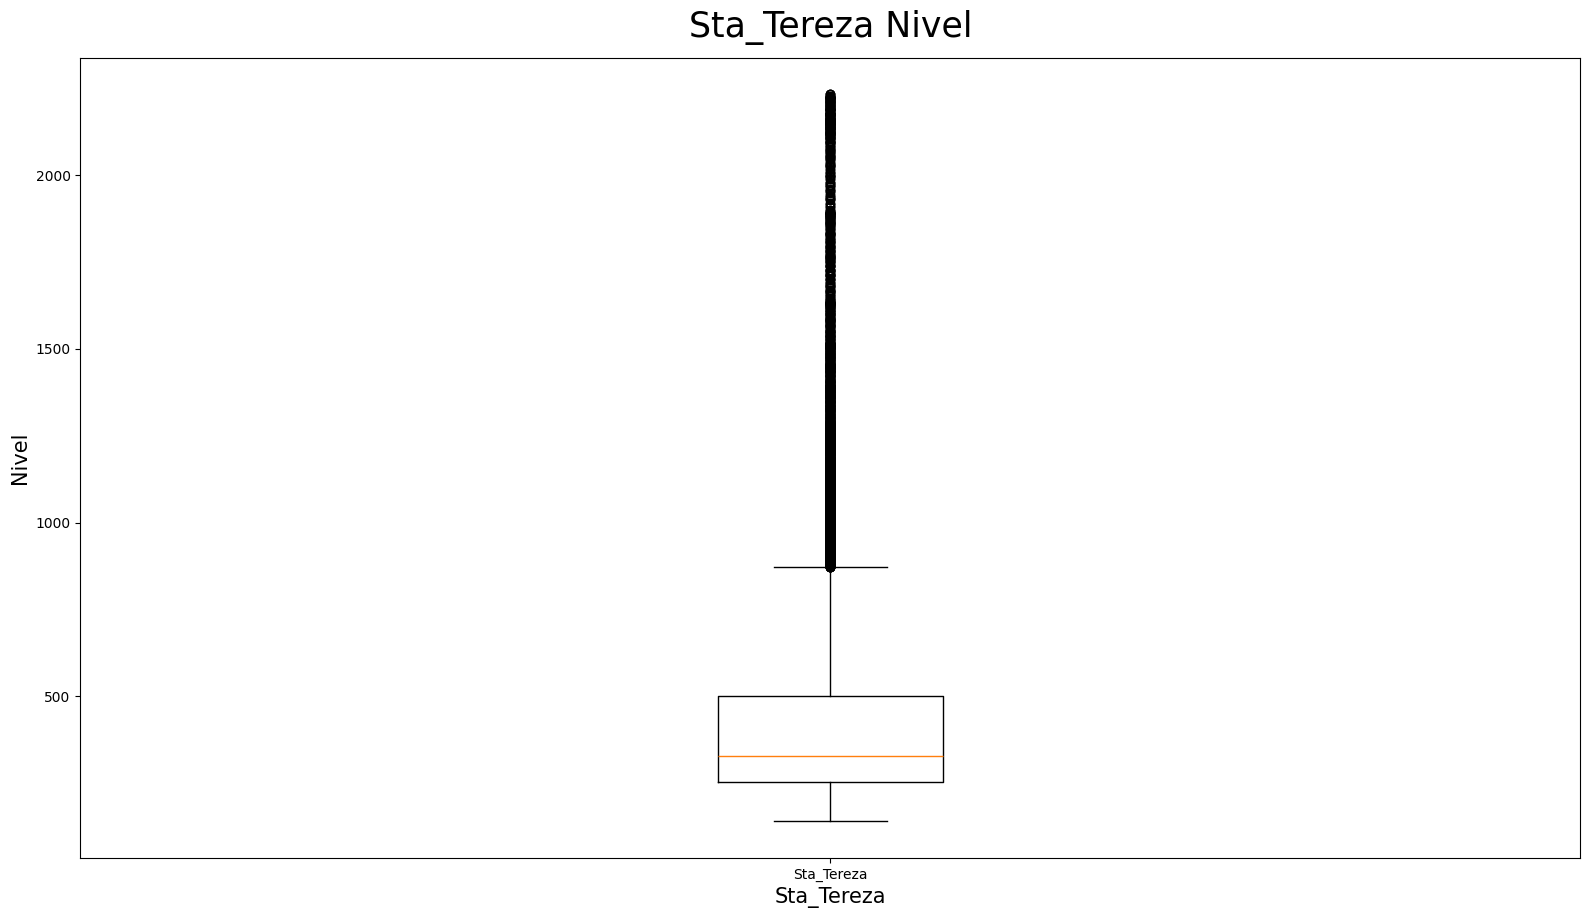

In [44]:
plotar_matplot('Sta_Tereza Nivel', 'Sta_Tereza', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Sta_Tereza_unico, tipo='boxplot')

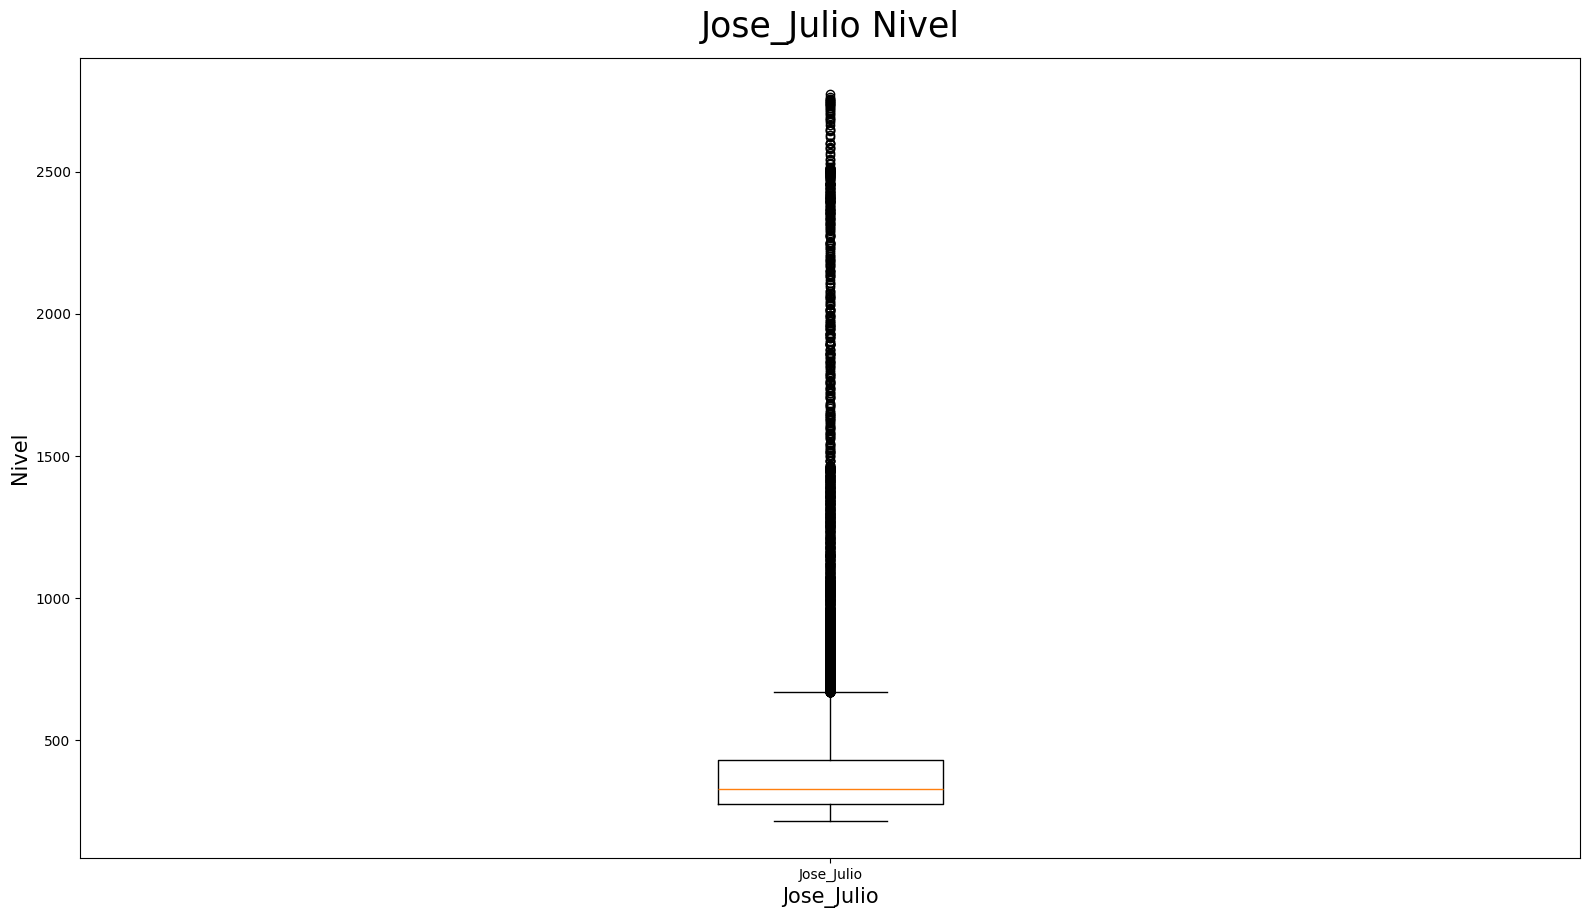

In [45]:
plotar_matplot('Jose_Julio Nivel', 'Jose_Julio', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Jose_Julio_unico, tipo='boxplot')

# Plot com seleção de intervalo (1 cidade)

In [46]:
def plotar_matplot4(titulo, labelx, labely, x, y, dataset1, label1, intervalo_data=None):

  fig = plt.figure(figsize=(15, 8))
  eixo = fig.add_axes([0, 0, 1, 1])

  # Filtrar o intervalo de datas, se fornecido
  if intervalo_data is not None:
      data_inicio, data_fim = intervalo_data
      dataset1 = dataset1[(dataset1[x] >= data_inicio) & (dataset1[x] <= data_fim)]

  # Plotar os dados com os labels fornecidos
  eixo.plot(x, y, data=dataset1, label=label1, linestyle='-')

  # Configurar título e rótulos dos eixos
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)

  # Adicionar a legenda
  eixo.legend()
  eixo = eixo

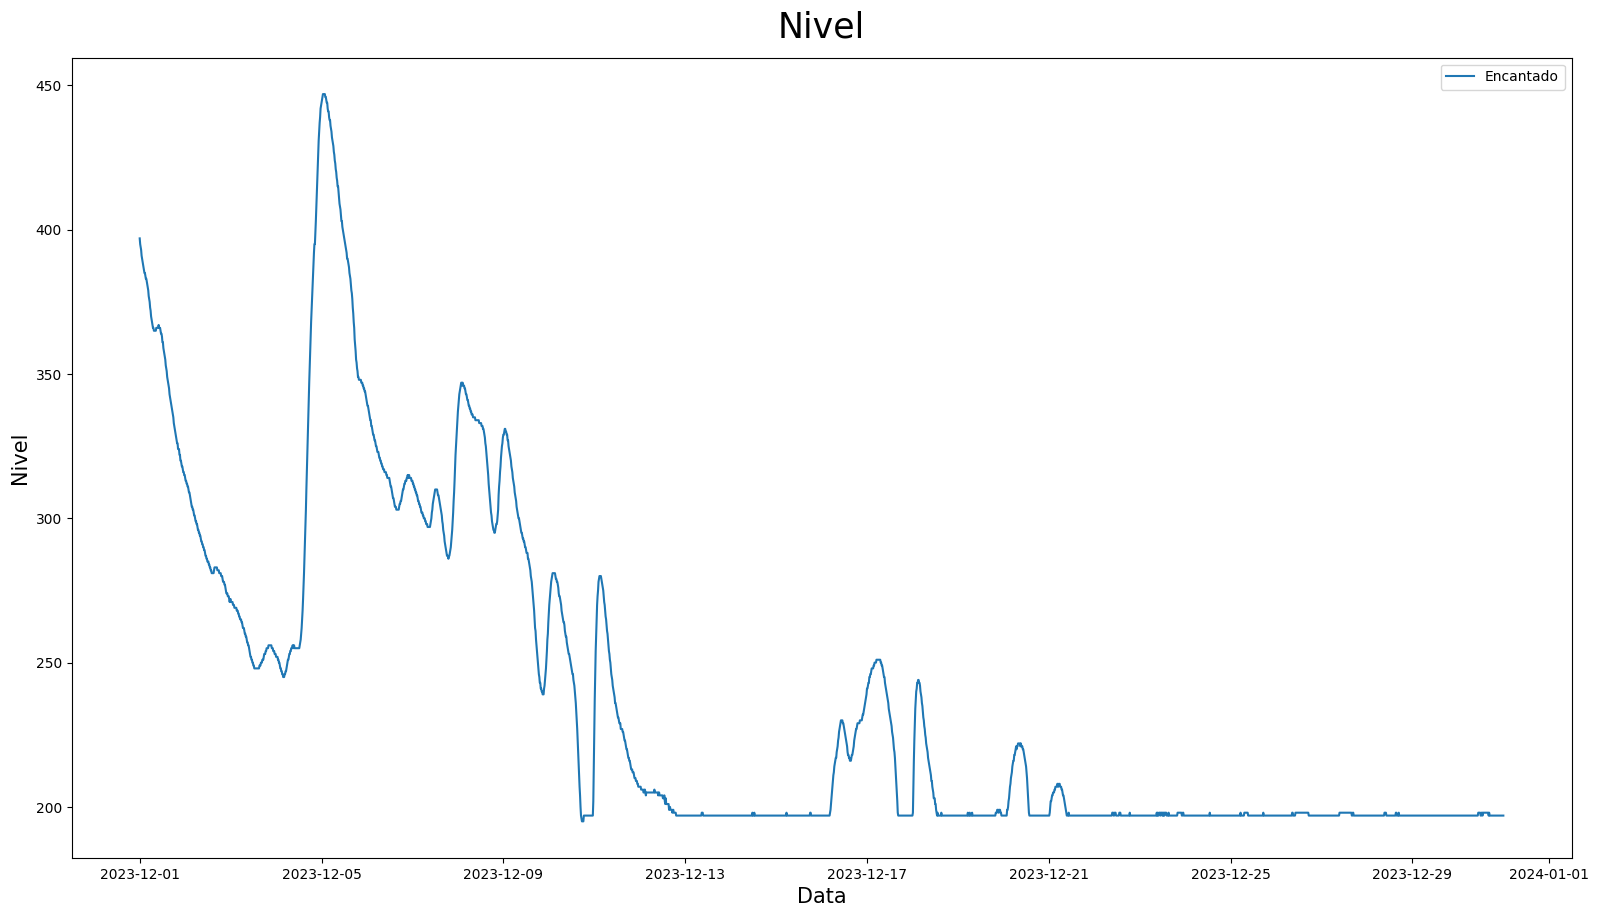

In [47]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-12-01')
data_fim = pd.to_datetime('2023-12-31')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico,
                'Encantado',
                intervalo_data=(data_inicio, data_fim))

# 4 Graficos em um plot com seleção de intervalo

In [48]:
def plotar_matplot4(titulo, labelx, labely, x, y, dataset1, dataset2, dataset3, dataset4, label1, label2, label3, label4, intervalo_data=None):

  fig = plt.figure(figsize=(15, 8))
  eixo = fig.add_axes([0, 0, 1, 1])

  # Filtrar o intervalo de datas, se fornecido
  if intervalo_data is not None:
      data_inicio, data_fim = intervalo_data
      dataset1 = dataset1[(dataset1[x] >= data_inicio) & (dataset1[x] <= data_fim)]
      dataset2 = dataset2[(dataset2[x] >= data_inicio) & (dataset2[x] <= data_fim)]
      dataset3 = dataset3[(dataset3[x] >= data_inicio) & (dataset3[x] <= data_fim)]
      dataset4 = dataset4[(dataset4[x] >= data_inicio) & (dataset4[x] <= data_fim)]

  # Plotar os dados com os labels fornecidos
  eixo.plot(x, y, data=dataset1, label=label1, linestyle='-')
  eixo.plot(x, y, data=dataset2, label=label2, linestyle='-')
  eixo.plot(x, y, data=dataset3, label=label3, linestyle='-')
  eixo.plot(x, y, data=dataset4, label=label4, linestyle='-')

  # Configurar título e rótulos dos eixos
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)

  # Adicionar a legenda
  eixo.legend()
  eixo = eixo

### grafico nivel da agua 3 meses descartado

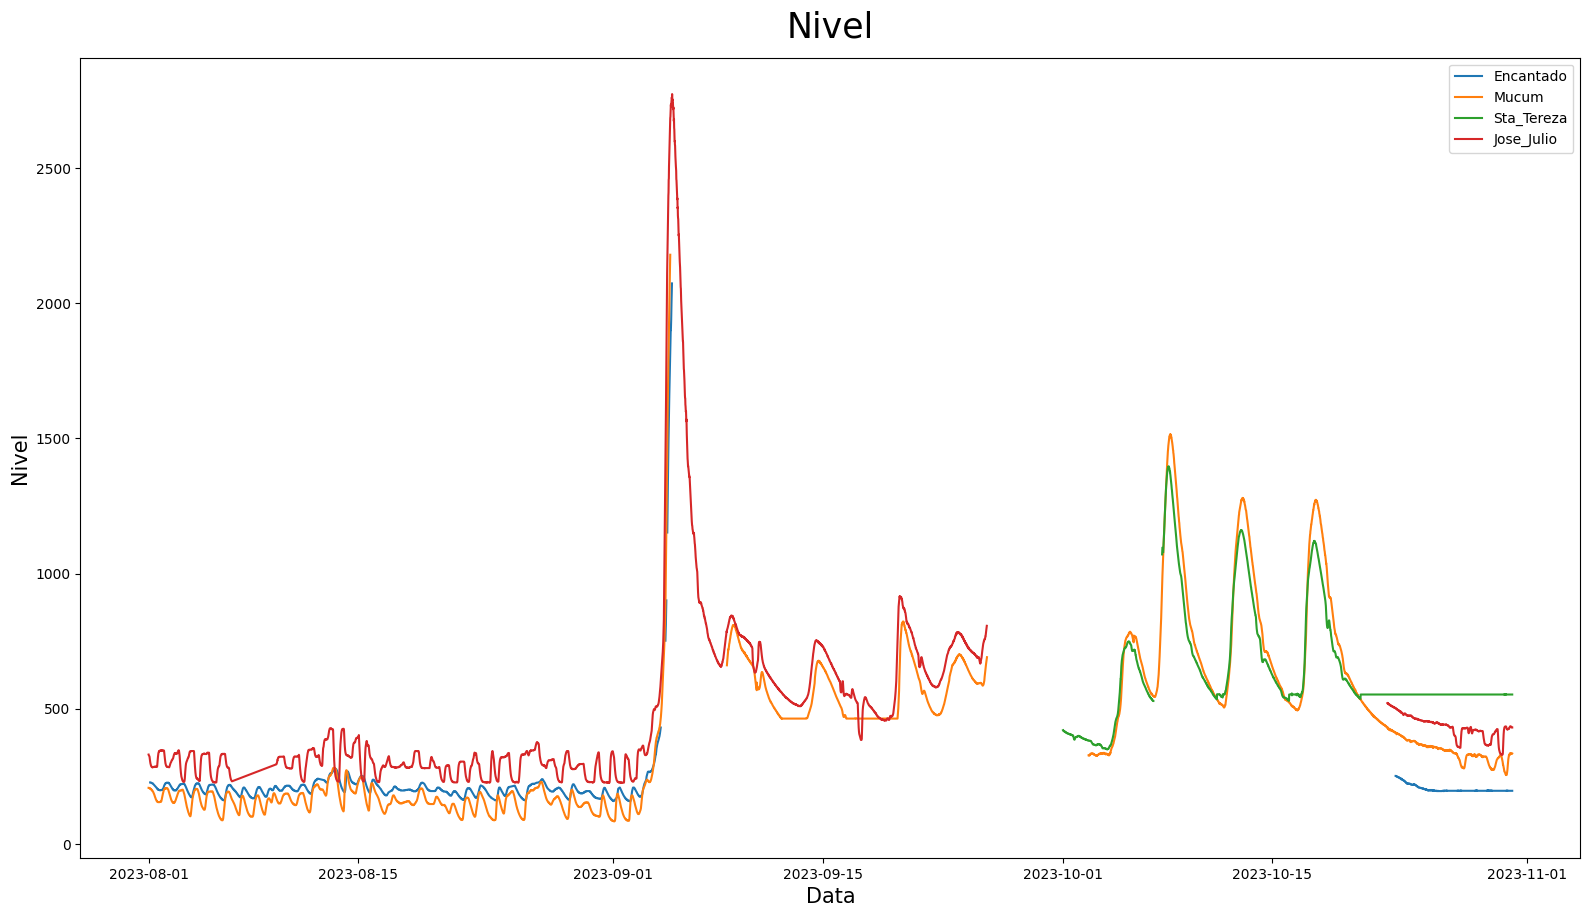

In [49]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-8-01')
data_fim = pd.to_datetime('2023-10-31')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

### grafico nivel da agua relevantes

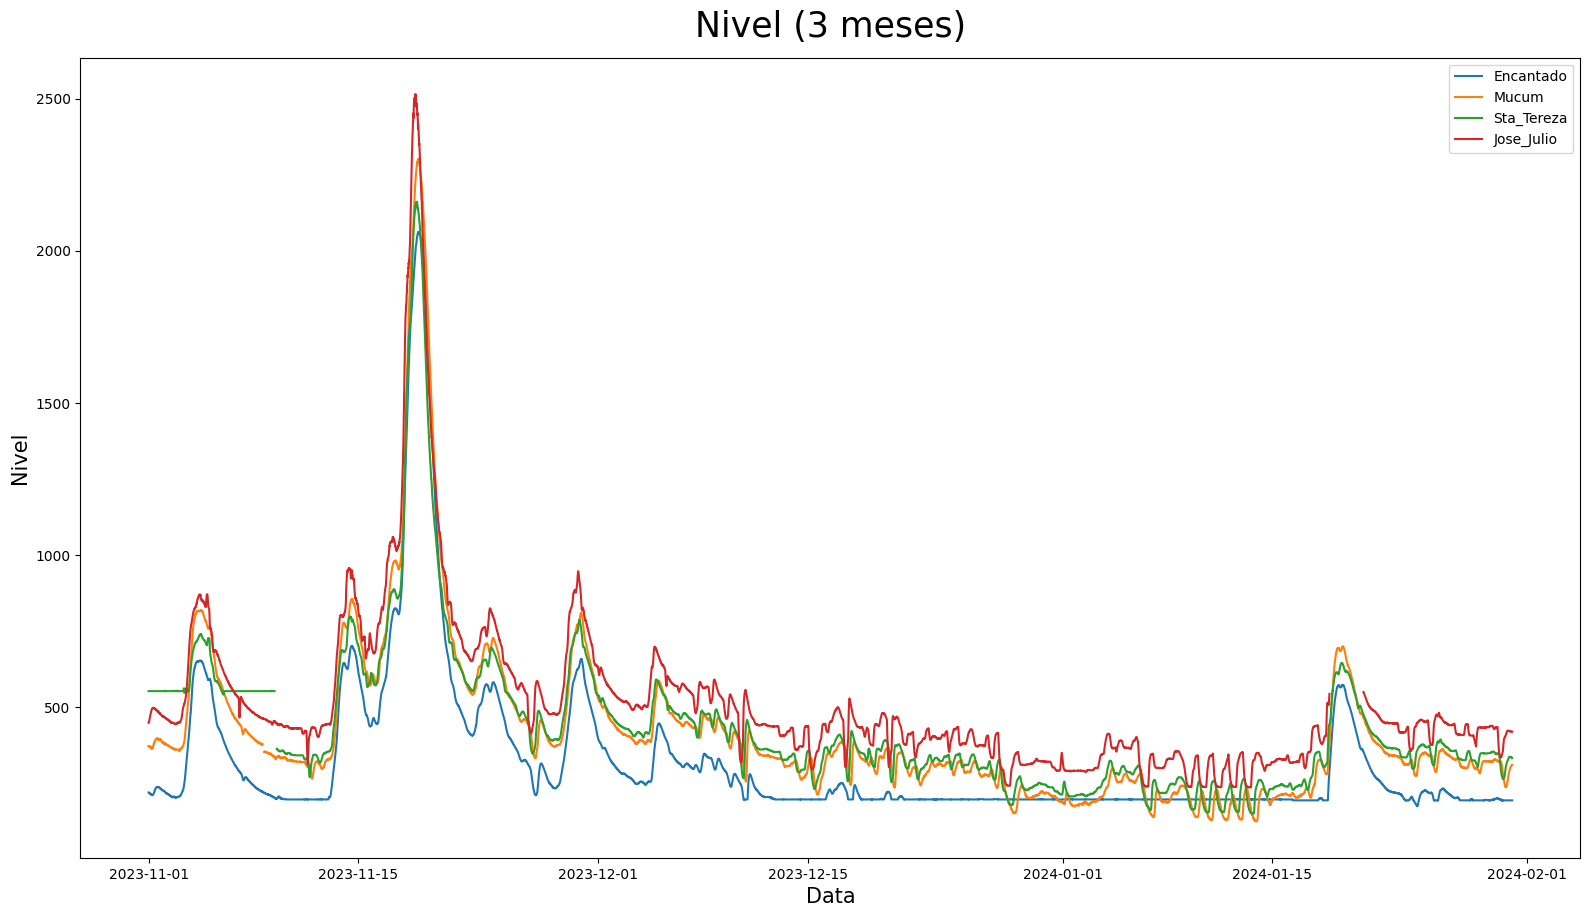

In [50]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (3 meses)', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

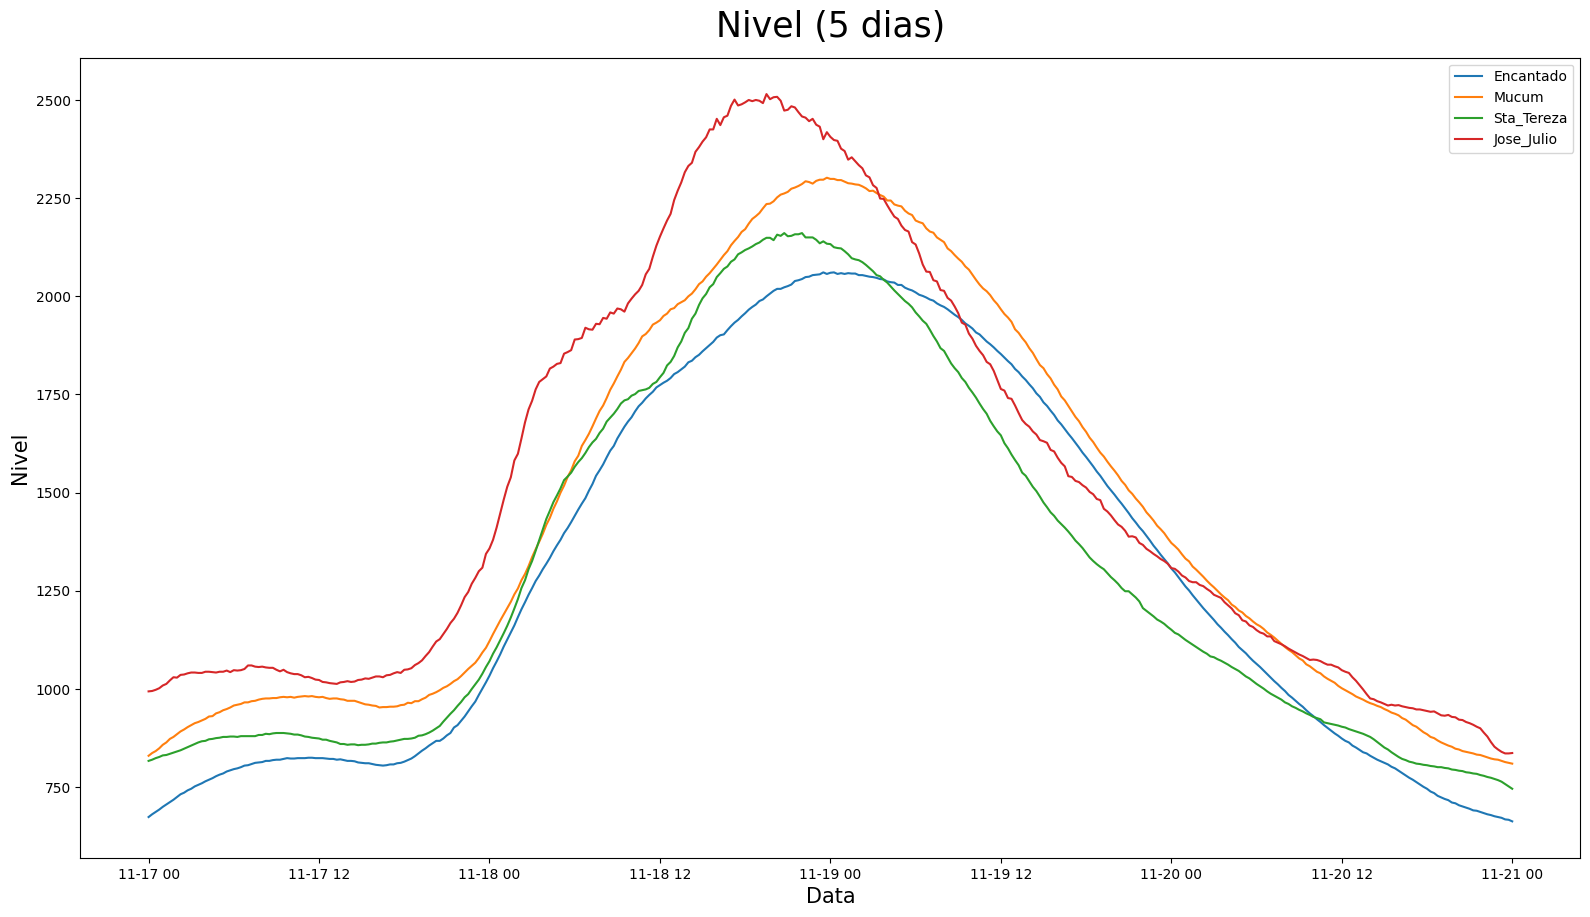

In [51]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-17')
data_fim = pd.to_datetime('2023-11-21')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel (5 dias)', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

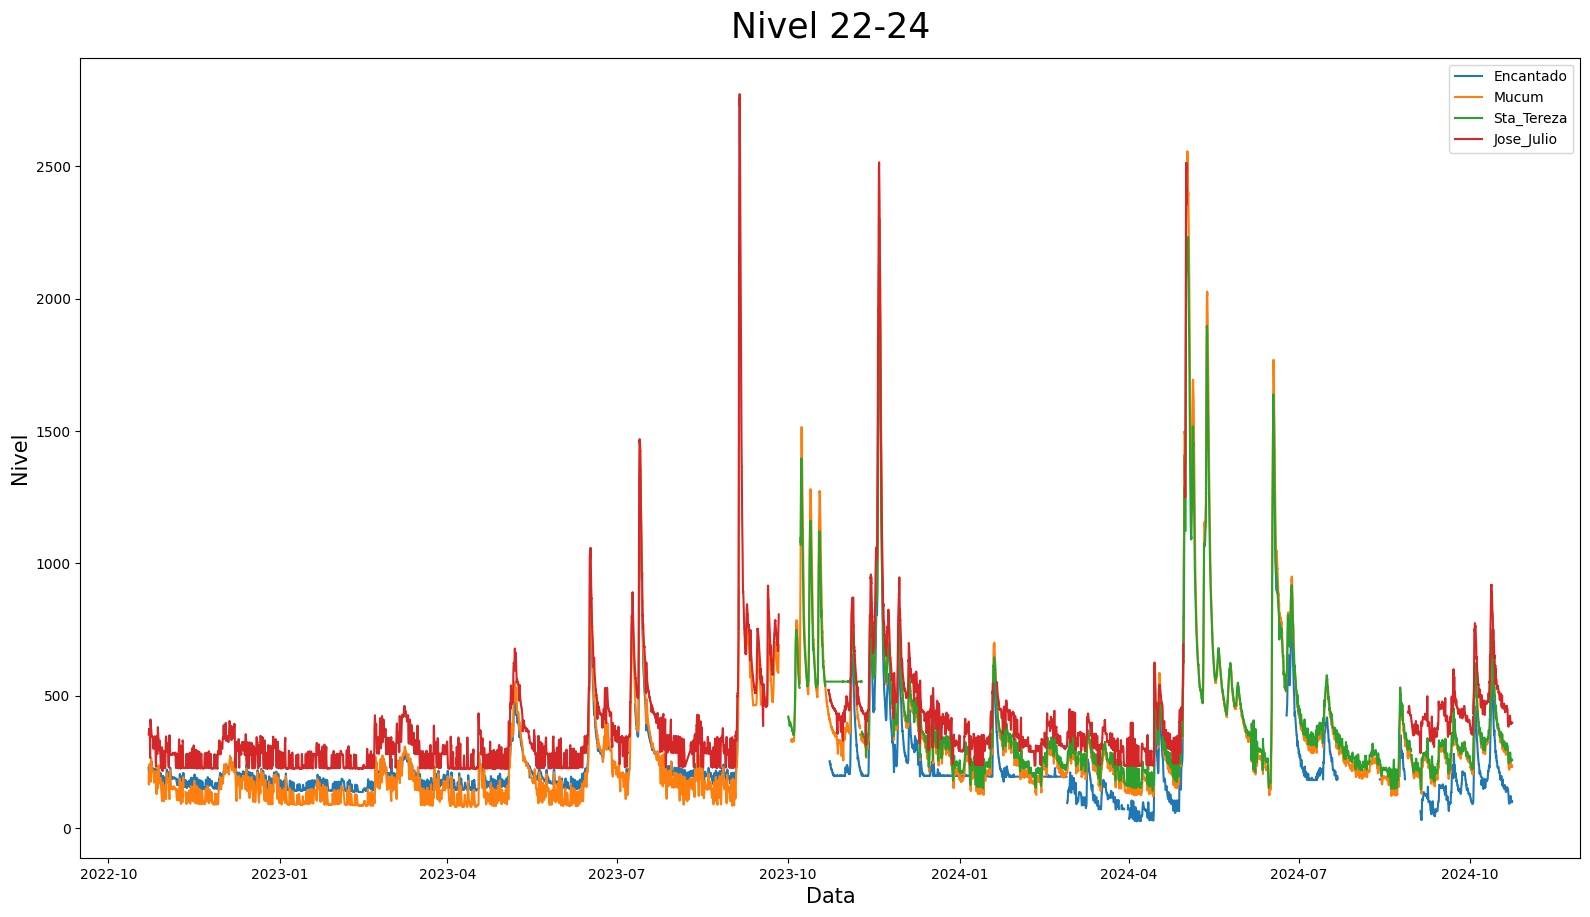

In [52]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-7-01')
data_fim = pd.to_datetime('2024-12-31')

# Chamando a função com intervalo de data
plotar_matplot4('Nivel 22-24', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

### Grafico Chuva 4 cidades

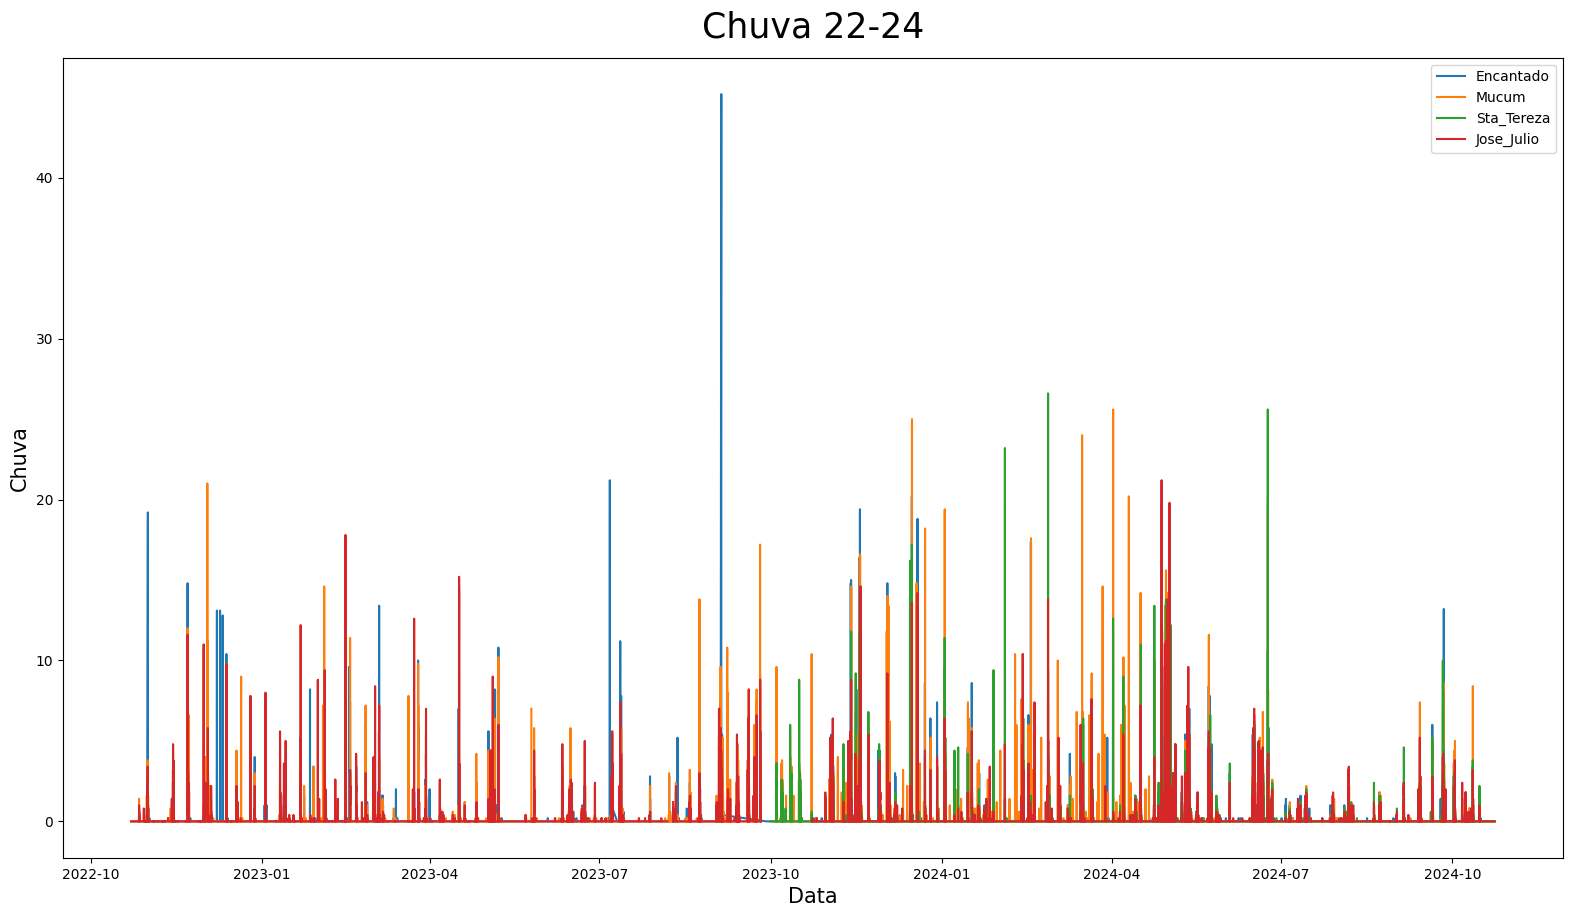

In [53]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-7-01')
data_fim = pd.to_datetime('2024-12-31')

# Chamando a função com intervalo de data
plotar_matplot4('Chuva 22-24', 'Data', 'Chuva', 'Data/Hora', 'Chuva(mm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

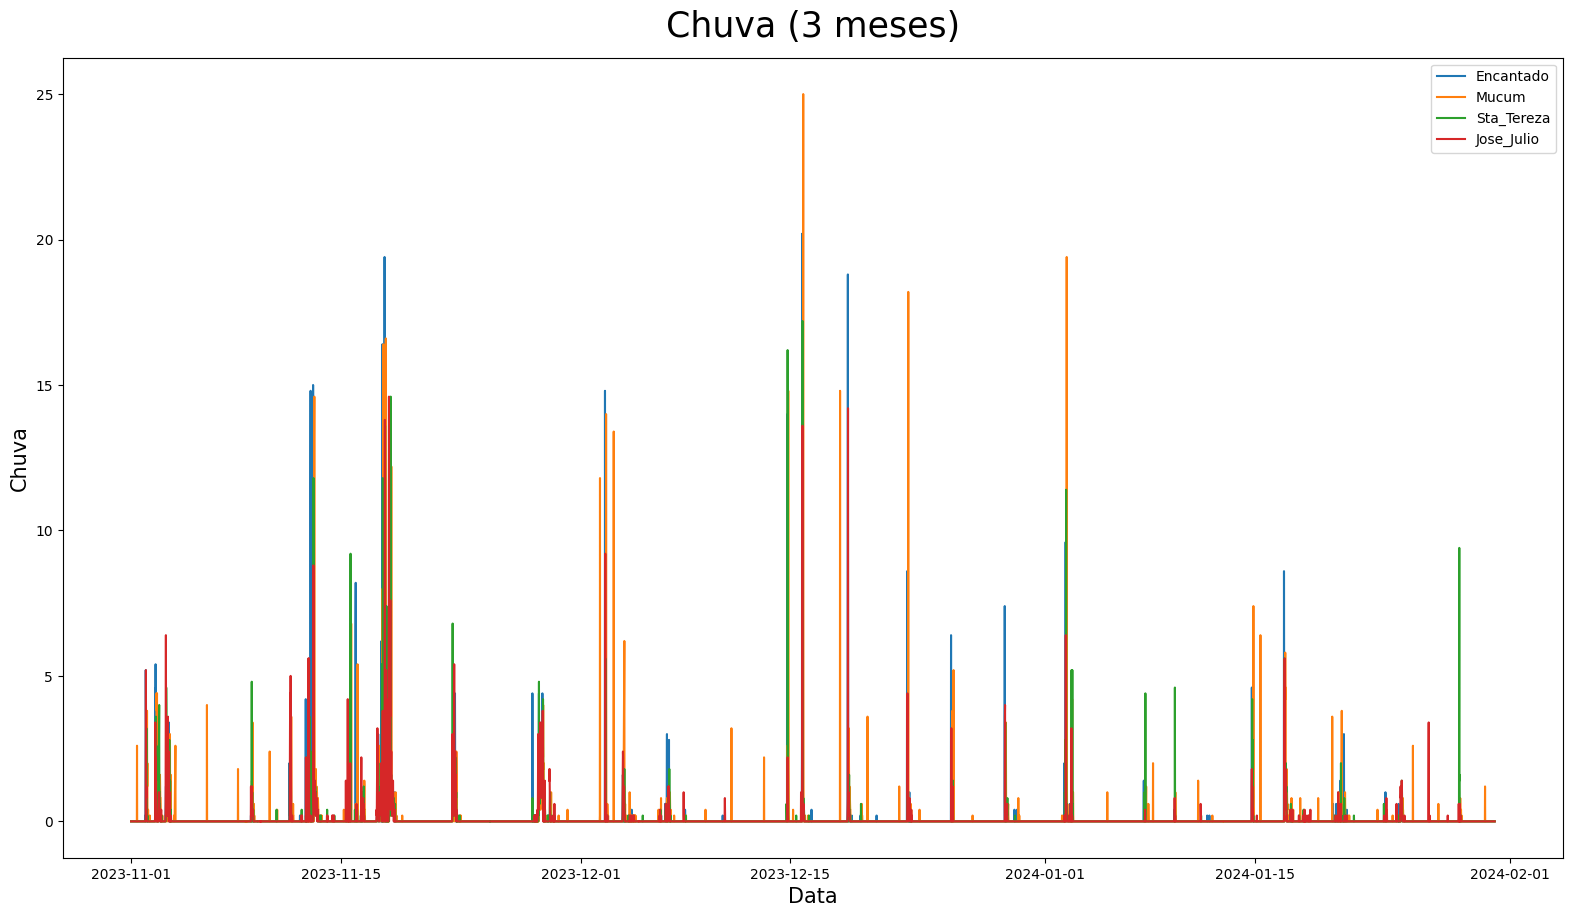

In [54]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

# Chamando a função com intervalo de data
plotar_matplot4('Chuva (3 meses)', 'Data', 'Chuva', 'Data/Hora', 'Chuva(mm)',
                df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,
                'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio',
                intervalo_data=(data_inicio, data_fim))

## Boxplot 4 em 1

In [55]:
def plotar_boxplot4(titulo, labelx, labely, x, y, dataset1, dataset2, dataset3, dataset4, label1, label2, label3, label4, intervalo_data=None):
  fig = plt.figure(figsize=(15, 8))
  eixo = fig.add_axes([0, 0, 1, 1])

  # Filtrar o intervalo de datas, se fornecido
  if intervalo_data is not None:
      data_inicio, data_fim = intervalo_data
      dataset1 = dataset1[(dataset1[x] >= data_inicio) & (dataset1[x] <= data_fim)]
      dataset2 = dataset2[(dataset2[x] >= data_inicio) & (dataset2[x] <= data_fim)]
      dataset3 = dataset3[(dataset3[x] >= data_inicio) & (dataset3[x] <= data_fim)]
      dataset4 = dataset4[(dataset4[x] >= data_inicio) & (dataset4[x] <= data_fim)]

  # Criar uma lista com os dados para o boxplot, ignorando dados nulos
  dados_boxplot = [
      dataset1[y].dropna().values,
      dataset2[y].dropna().values,
      dataset3[y].dropna().values,
      dataset4[y].dropna().values
  ]

  # Plotar o boxplot
  eixo.boxplot(dados_boxplot, labels=[label1, label2, label3, label4])

  # Configurar título e rótulos dos eixos
  eixo.set_title(titulo, fontsize=25, pad=15)
  eixo.set_xlabel(labelx, fontsize=15)
  eixo.set_ylabel(labely, fontsize=15)

  # Adicionar a legenda
  eixo.legend()
  eixo = eixo


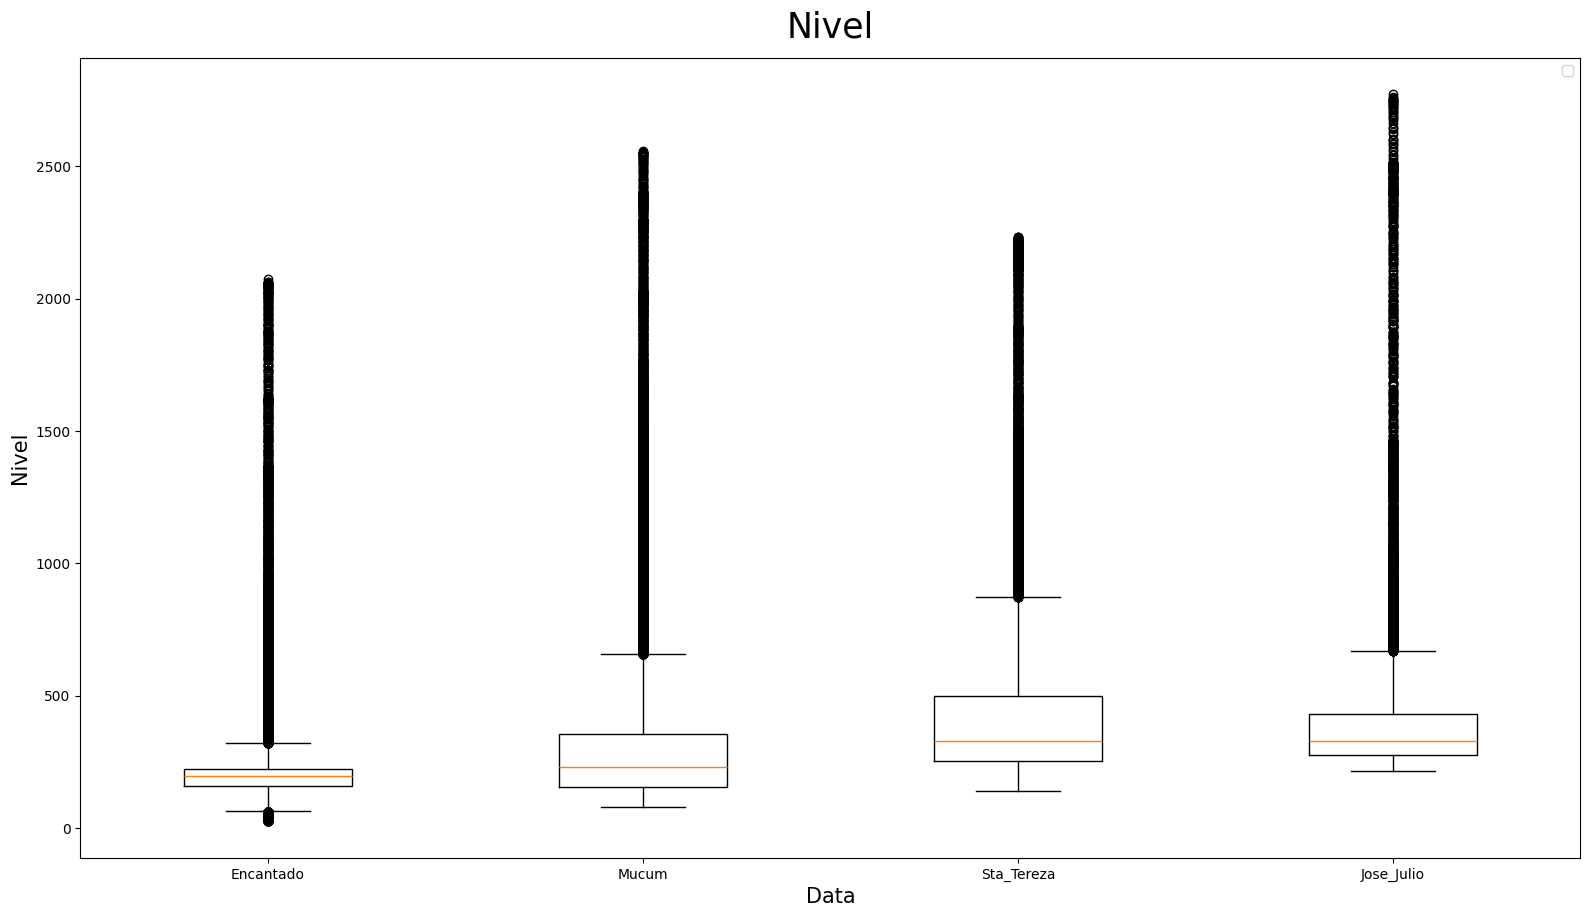

In [56]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-8-01')
data_fim = pd.to_datetime('2024-10-31')

# Chamando a função com intervalo de data
plotar_boxplot4('Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio', intervalo_data=(data_inicio, data_fim))

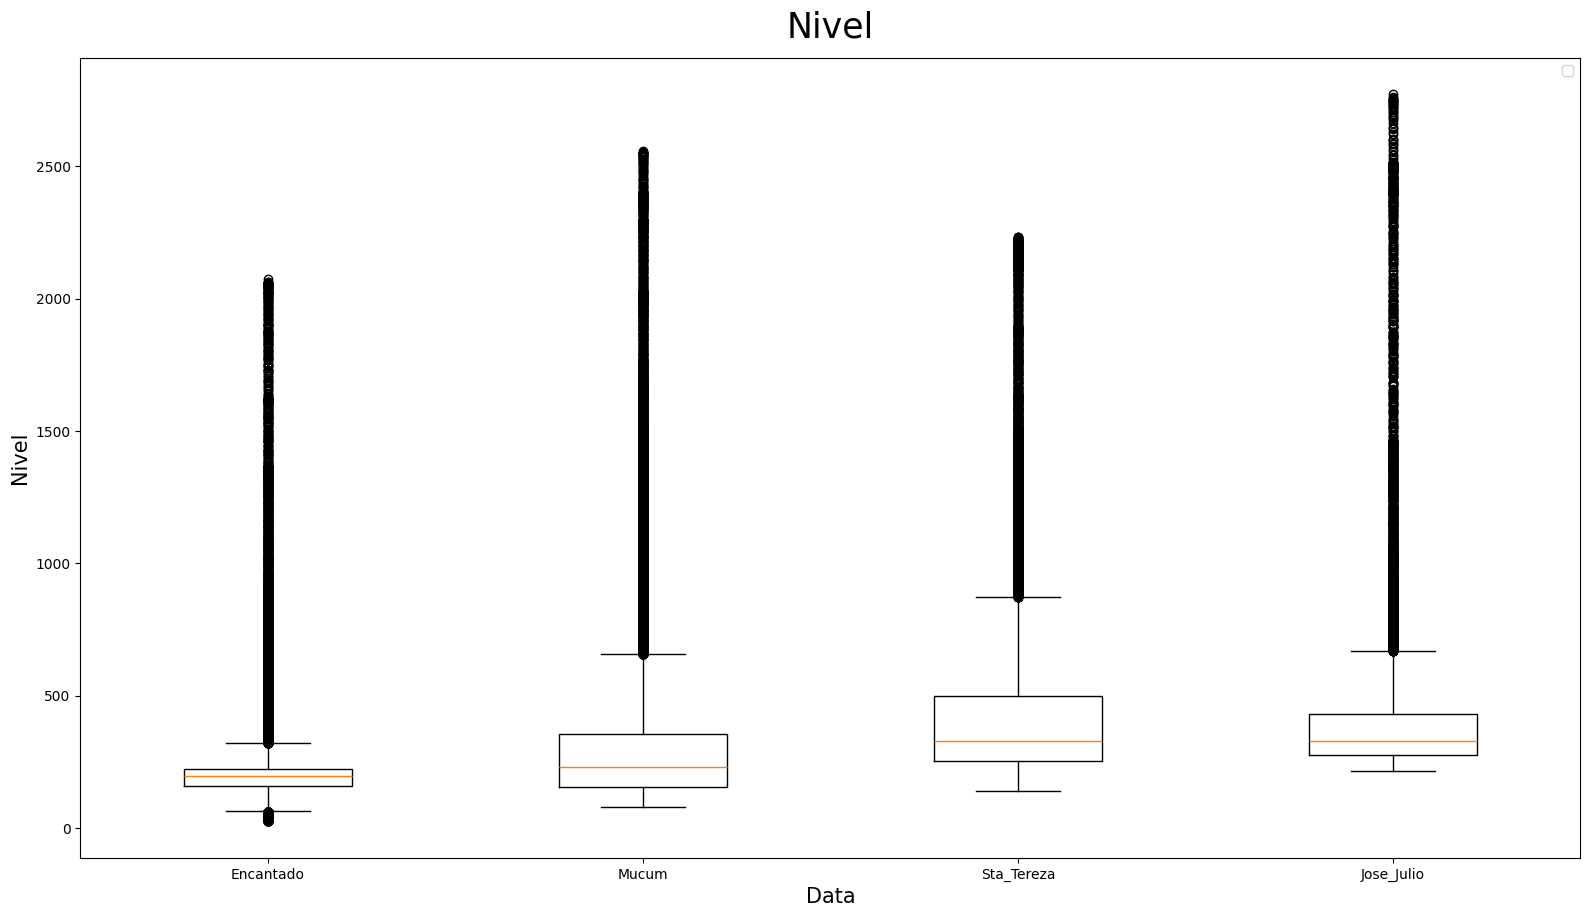

In [57]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-8-01')
data_fim = pd.to_datetime('2024-10-31')

# Chamando a função com intervalo de data
plotar_boxplot4('Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado_unico, df_Mucum_unico, df_Sta_Tereza_unico, df_Jose_Julio_unico,'Encantado', 'Mucum', 'Sta_Tereza', 'Jose_Julio', intervalo_data=(data_inicio, data_fim))

# Nivel e chuva

### Nivel em linha / chuva em barra sobreposta

In [58]:
import matplotlib.pyplot as plt

def plotar_chuva_nivel(dataset, titulo, labelx, labely1, labely2, coluna_data, coluna_chuva, coluna_nivel, intervalo_data=None):
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Filtrar o intervalo de datas, se fornecido
    if intervalo_data is not None:
        data_inicio, data_fim = intervalo_data
        dataset = dataset[(dataset[coluna_data] >= data_inicio) & (dataset[coluna_data] <= data_fim)]

    # Eixo primário (eixo y à esquerda) para o nível da água (linha)
    ax1.plot(dataset[coluna_data], dataset[coluna_nivel], color='b', label='Nível da Água', linestyle='-')
    ax1.set_xlabel(labelx, fontsize=15)
    ax1.set_ylabel(labely1, color='b', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='b')

    # Eixo secundário (eixo y à direita) para a chuva (barras)
    ax2 = ax1.twinx()
    ax2.bar(dataset[coluna_data], dataset[coluna_chuva], color='g', alpha=0.6, label='Chuva')
    ax2.set_ylabel(labely2, color='g', fontsize=15)
    ax2.tick_params(axis='y', labelcolor='g')

    # Título e legendas
    fig.suptitle(titulo, fontsize=25)  # Removi o parâmetro `pad`
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.show()



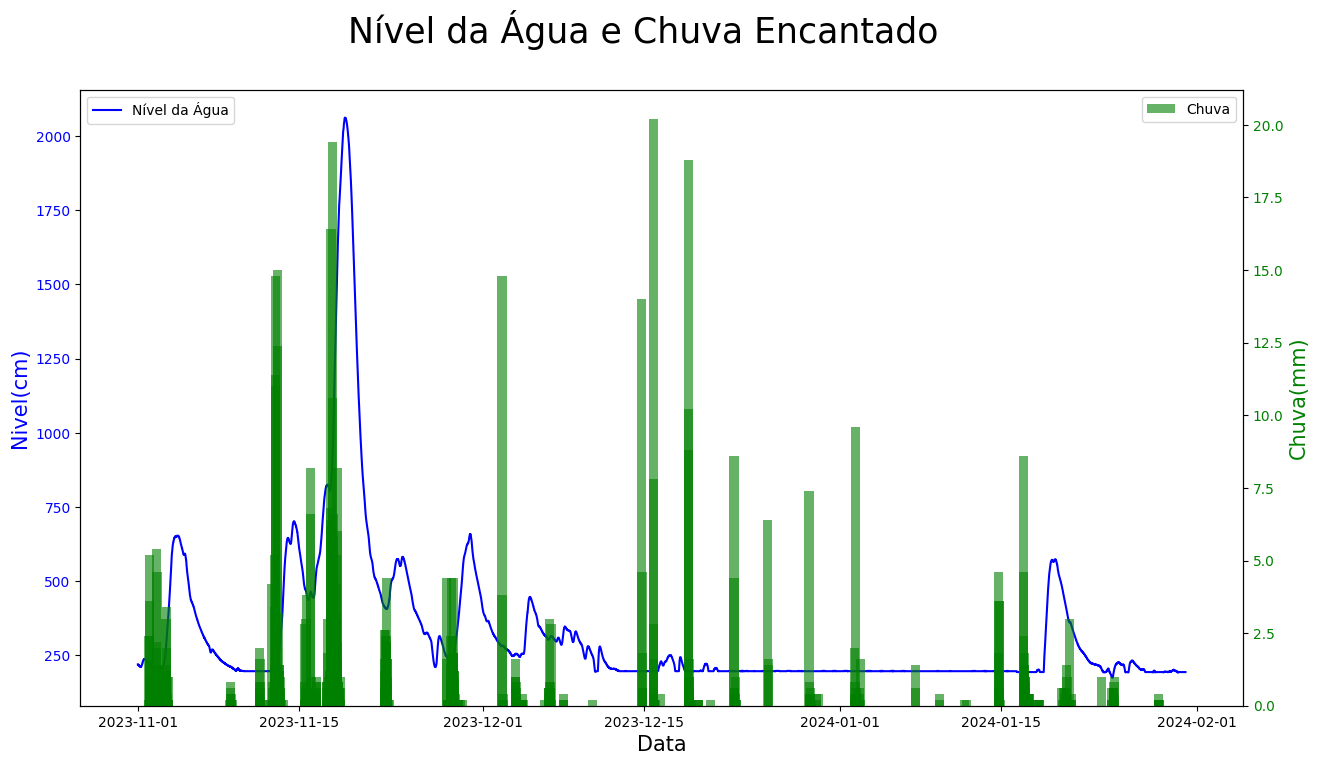

In [59]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

plotar_chuva_nivel(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim))

### Nivel em linha / chuva em barra sobreposta (Granulando ambos)
possivel selecionar agrupamento por dia, semana, mes ou hora

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

def plotar_chuva_nivel_agrupa_ambos(dataset, titulo, labelx, labely1, labely2, coluna_data, coluna_chuva, coluna_nivel, intervalo_data=None, frequencia='D'):
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Converter a coluna de data para datetime, caso ainda não esteja
    dataset[coluna_data] = pd.to_datetime(dataset[coluna_data])

    # Filtrar o intervalo de datas, se fornecido
    if intervalo_data is not None:
        data_inicio, data_fim = intervalo_data
        dataset = dataset[(dataset[coluna_data] >= data_inicio) & (dataset[coluna_data] <= data_fim)]

    # Agrupar por frequência especificada (D - dia, W - semana, M - mês, H - hora)
    dados_agrupados = dataset.resample(frequencia, on=coluna_data).agg({coluna_chuva: 'sum', coluna_nivel: 'mean'}).reset_index()

    # Eixo primário (eixo y à esquerda) para o nível da água (linha)
    ax1.plot(dados_agrupados[coluna_data], dados_agrupados[coluna_nivel], color='b', label='Nível da Água', linestyle='-')
    ax1.set_xlabel(labelx, fontsize=15)
    ax1.set_ylabel(labely1, color='b', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='b')

    # Eixo secundário (eixo y à direita) para a chuva (barras)
    ax2 = ax1.twinx()
    ax2.bar(dados_agrupados[coluna_data], dados_agrupados[coluna_chuva], color='g', alpha=0.6, label='Chuva')
    ax2.set_ylabel(labely2, color='g', fontsize=15)
    ax2.tick_params(axis='y', labelcolor='g')



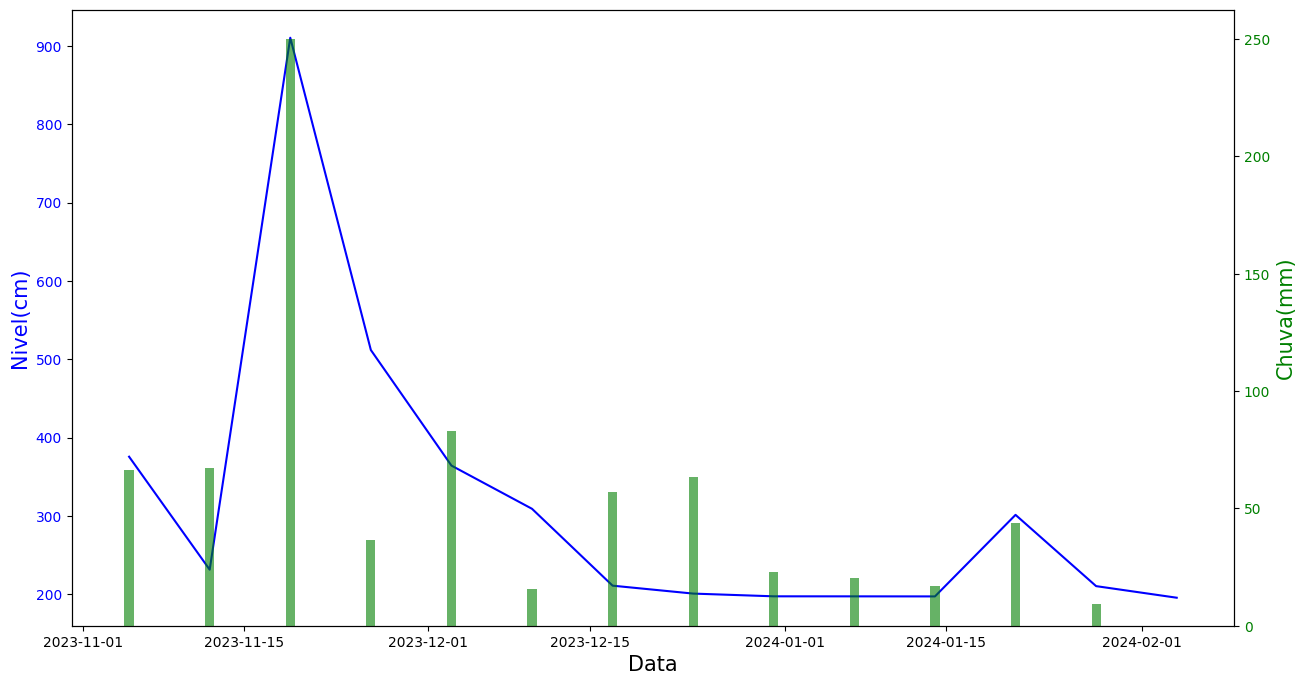

In [61]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

plotar_chuva_nivel_agrupa_ambos(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='W' )

### Nivel em linha / chuva em barra sobreposta (Granulando chuva)
possivel selecionar agrupamento por dia, semana, mes ou hora

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

def plotar_chuva_nivel_agrupa_chuva(dataset, titulo, labelx, labely1, labely2, coluna_data, coluna_chuva, coluna_nivel, intervalo_data=None, frequencia='D'):
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Converter a coluna de data para datetime, caso ainda não esteja
    dataset[coluna_data] = pd.to_datetime(dataset[coluna_data])

    # Filtrar o intervalo de datas, se fornecido
    if intervalo_data is not None:
        data_inicio, data_fim = intervalo_data
        dataset = dataset[(dataset[coluna_data] >= data_inicio) & (dataset[coluna_data] <= data_fim)]

    # Agrupar os dados de chuva pela frequência especificada (D - dia, W - semana, M - mês, H - hora)
    dados_chuva_agrupados = dataset.resample(frequencia, on=coluna_data).agg({coluna_chuva: 'sum'}).reset_index()

    # Eixo primário (eixo y à esquerda) para o nível da água (linha)
    ax1.plot(dataset[coluna_data], dataset[coluna_nivel], color='b', label='Nível da Água', linestyle='-')
    ax1.set_xlabel(labelx, fontsize=15)
    ax1.set_ylabel(labely1, color='b', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='b')

    # Eixo secundário (eixo y à direita) para a chuva (barras)
    ax2 = ax1.twinx()
    ax2.bar(dados_chuva_agrupados[coluna_data], dados_chuva_agrupados[coluna_chuva], color='g', alpha=0.6, label='Chuva')
    ax2.set_ylabel(labely2, color='g', fontsize=15)
    ax2.tick_params(axis='y', labelcolor='g')

    # Título e legendas
    fig.suptitle(titulo, fontsize=25)
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.show()


#### cidades intervalo 23-11-01 ate 24-1-31 (3 meses)

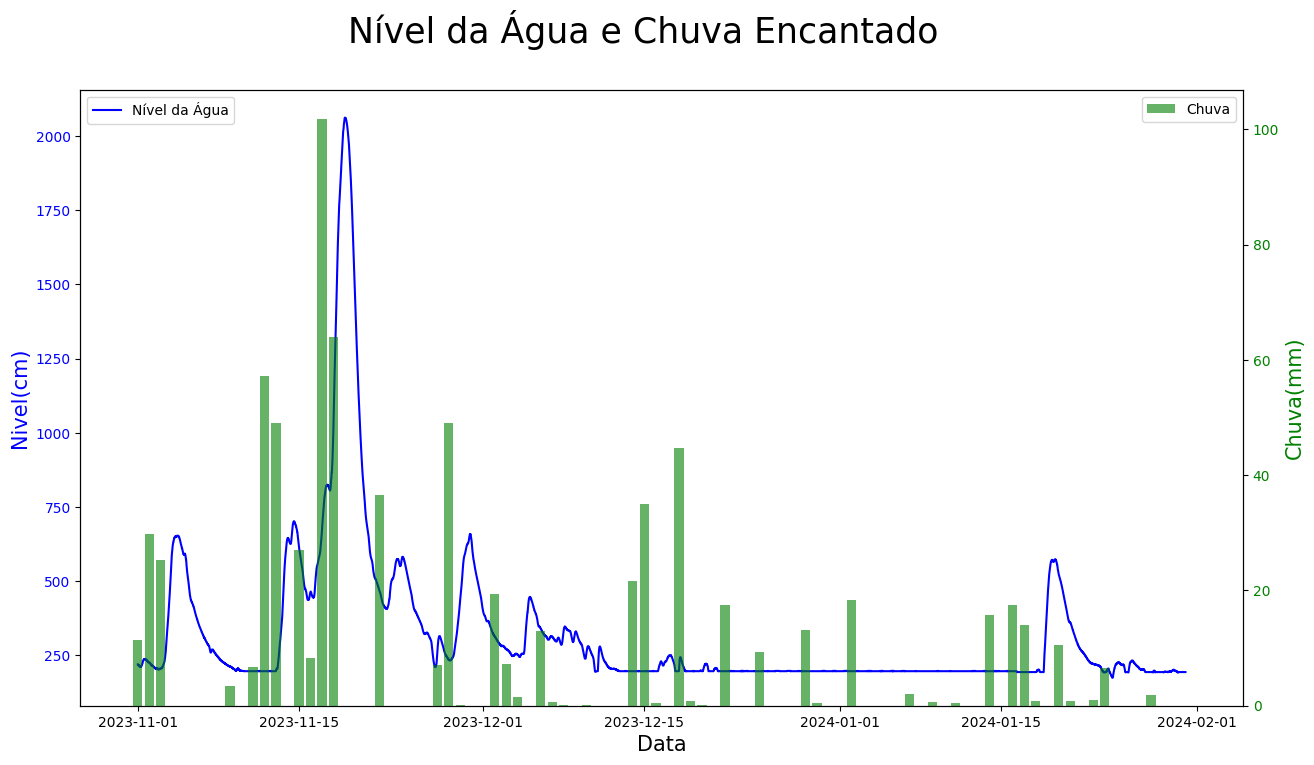

In [63]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

plotar_chuva_nivel_agrupa_chuva(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

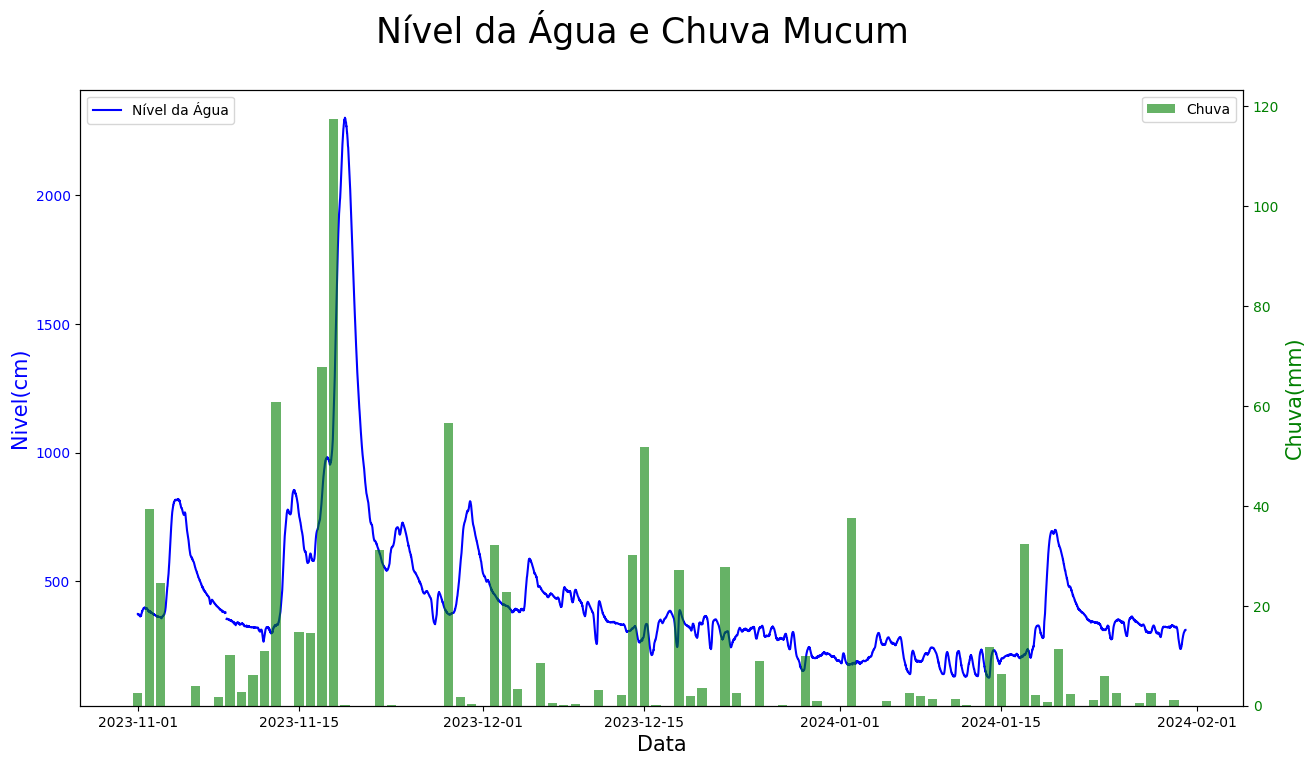

In [64]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

plotar_chuva_nivel_agrupa_chuva(df_Mucum_unico,
                   "Nível da Água e Chuva Mucum",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

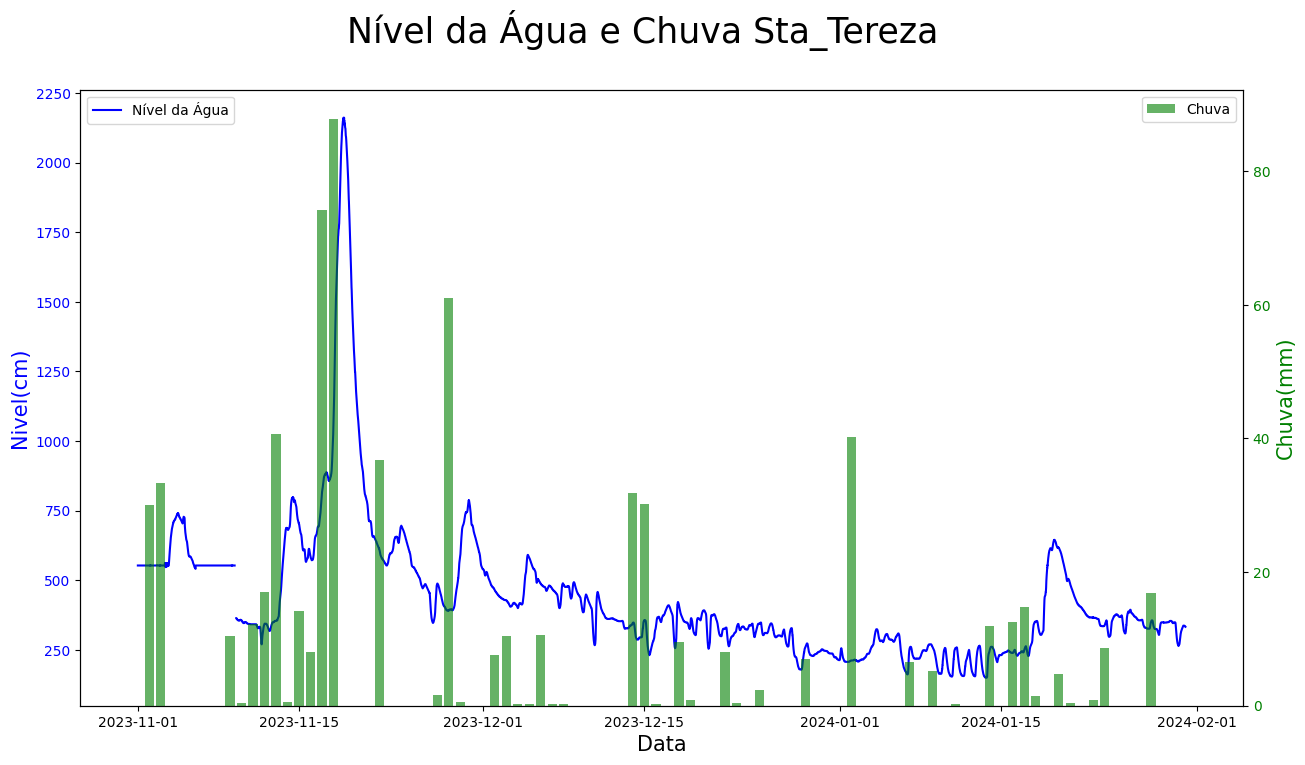

In [65]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

plotar_chuva_nivel_agrupa_chuva(df_Sta_Tereza_unico,
                   "Nível da Água e Chuva Sta_Tereza",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

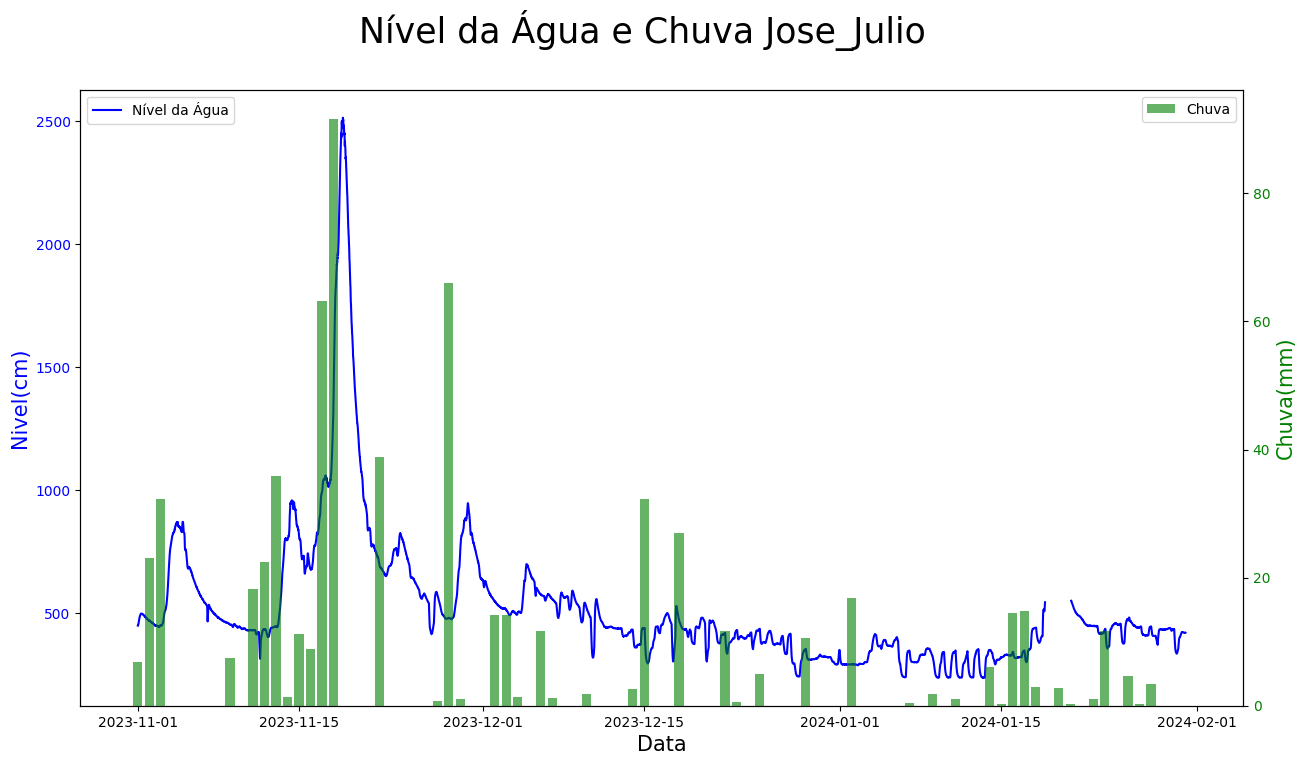

In [66]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-1-31')

plotar_chuva_nivel_agrupa_chuva(df_Jose_Julio_unico,
                   "Nível da Água e Chuva Jose_Julio",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

#### cidades intervalo 22-11-01 ate 24-10-31 (2anos separado por ano)

---




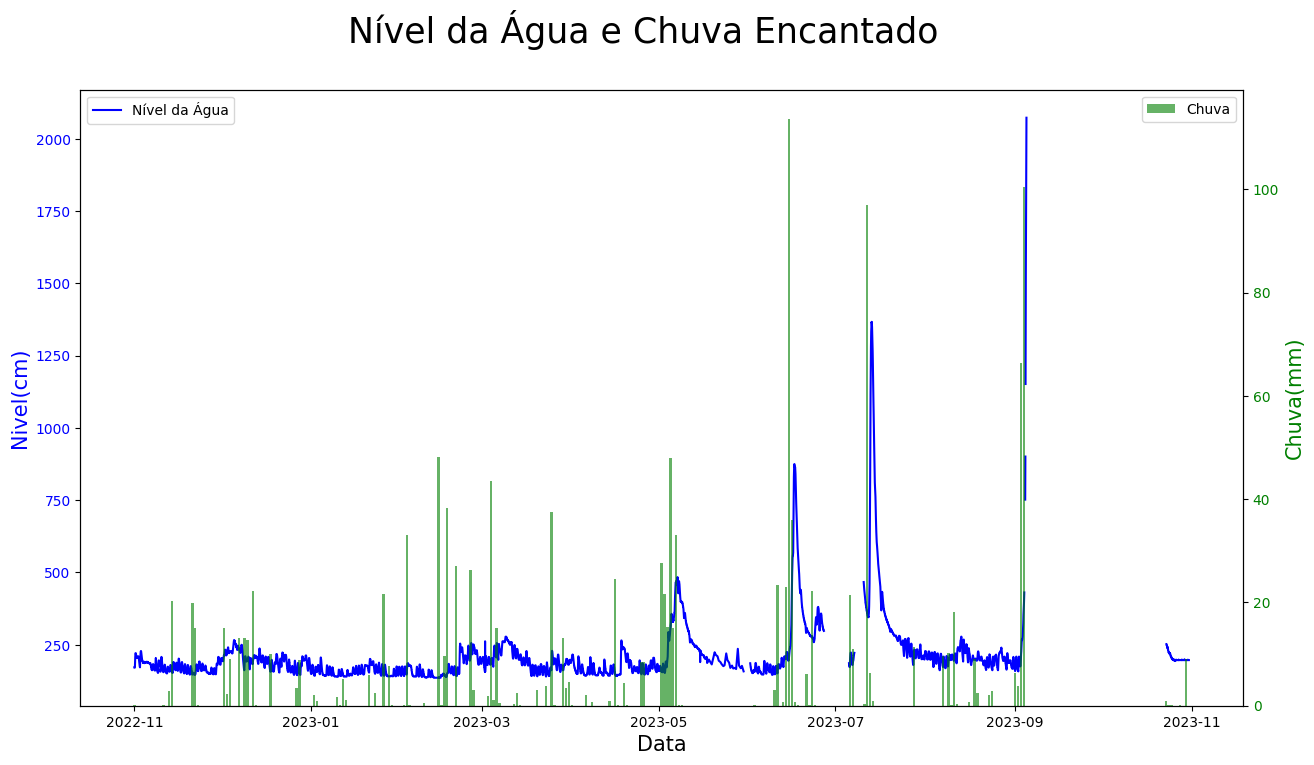

In [67]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-11-01')
data_fim = pd.to_datetime('2023-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

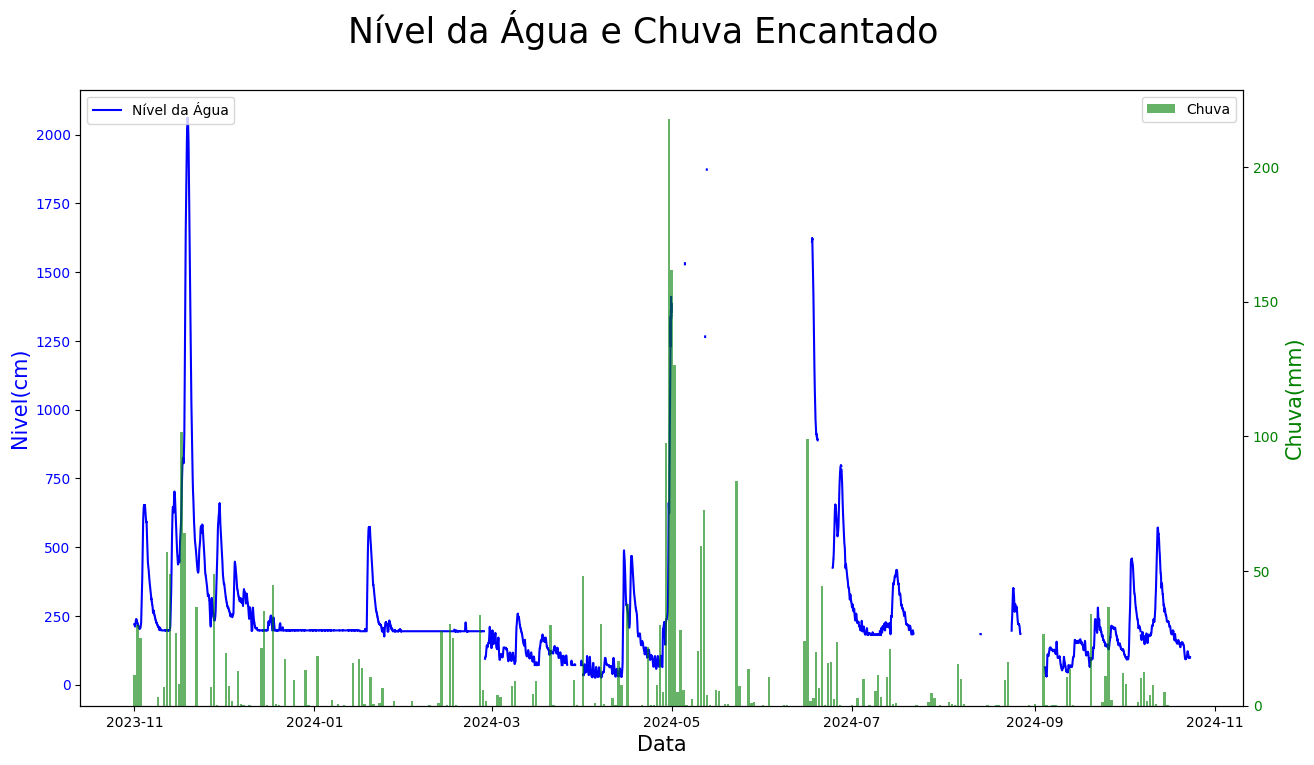

In [68]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Encantado_unico,
                   "Nível da Água e Chuva Encantado",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

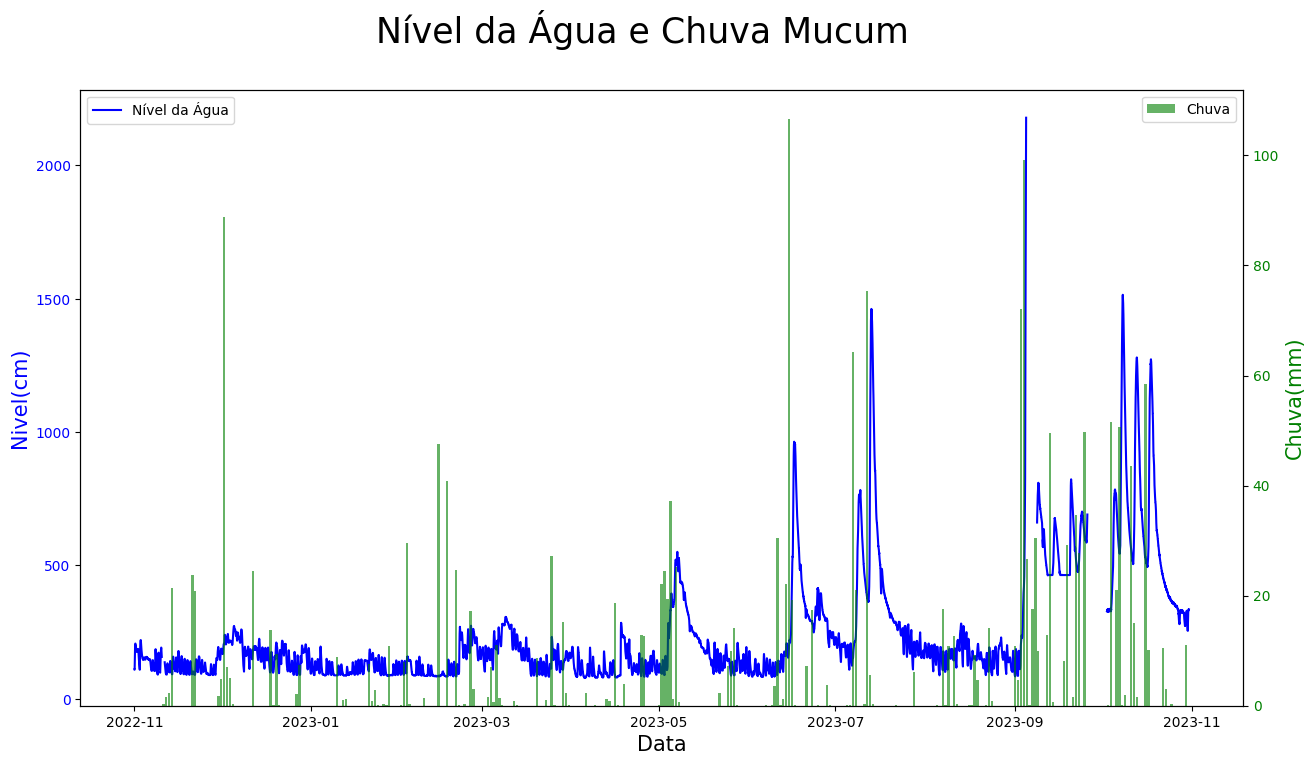

In [69]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-11-01')
data_fim = pd.to_datetime('2023-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Mucum_unico,
                   "Nível da Água e Chuva Mucum",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

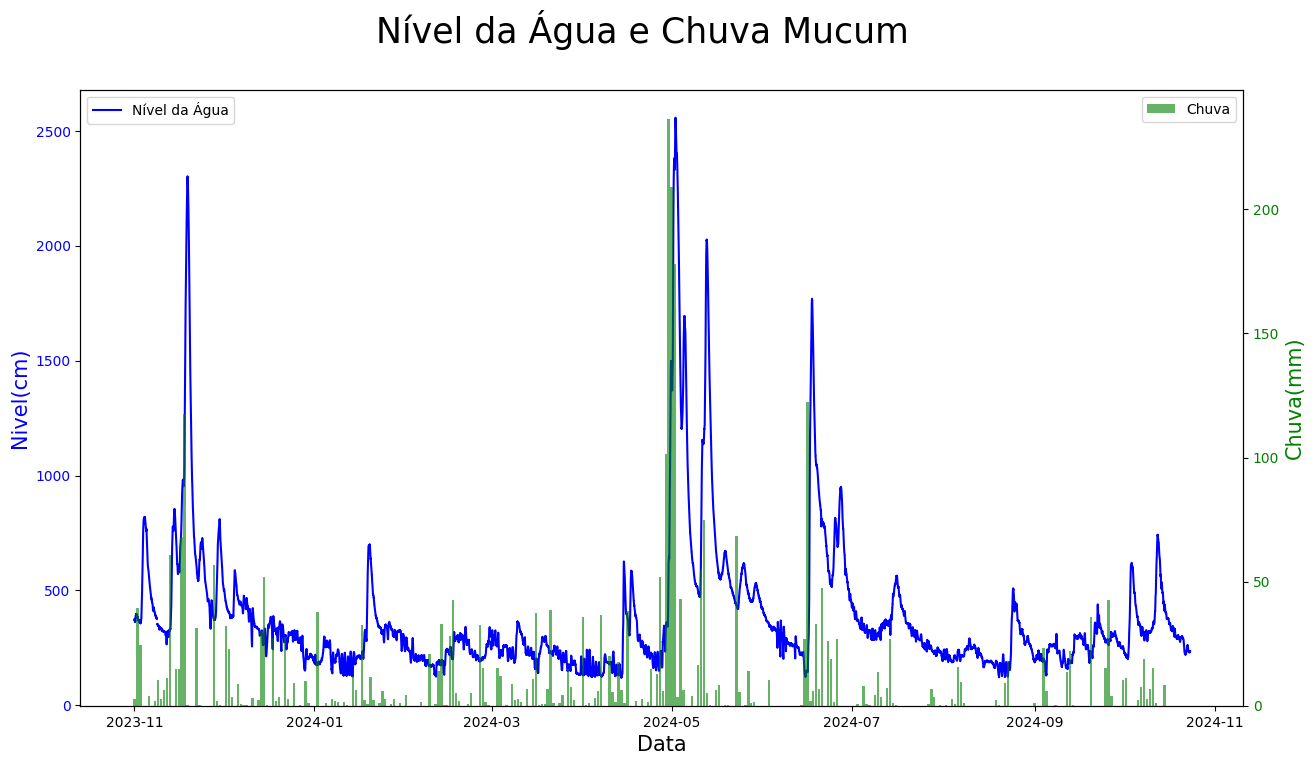

In [70]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Mucum_unico,
                   "Nível da Água e Chuva Mucum",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

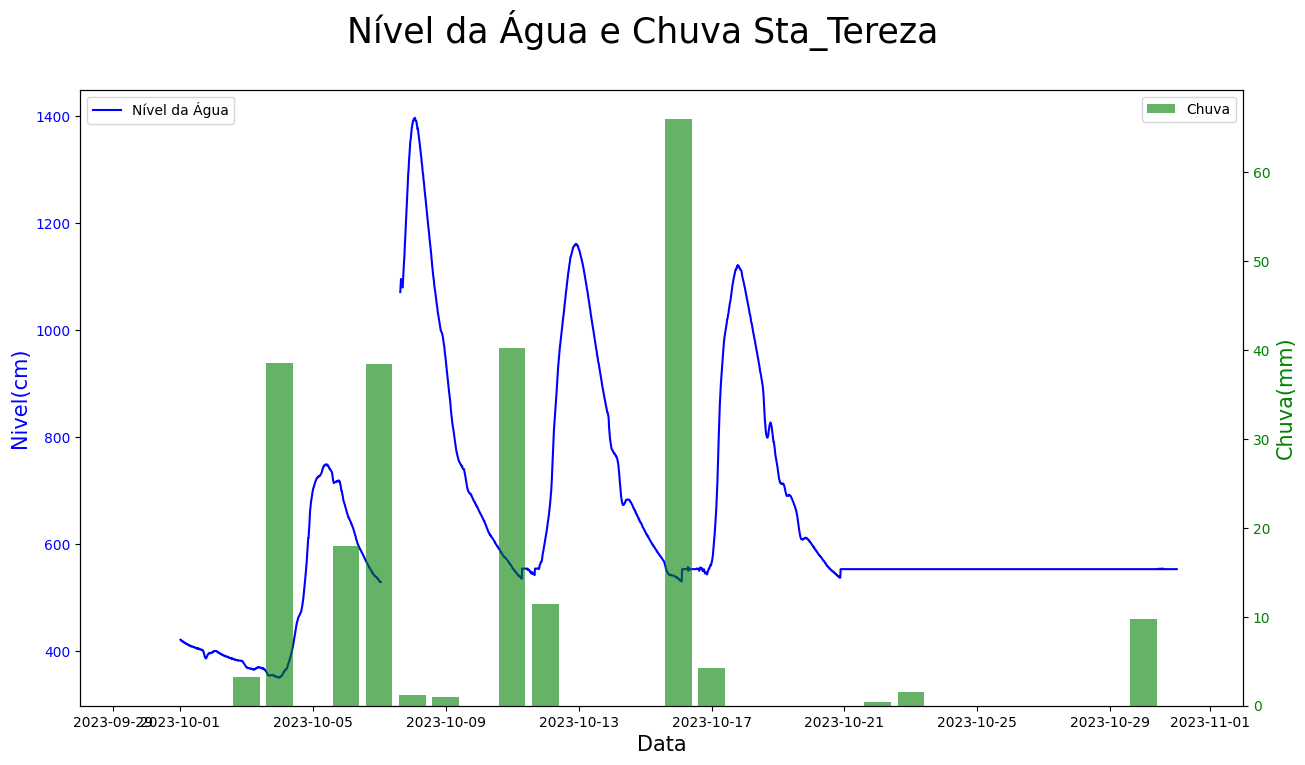

In [71]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-11-01')
data_fim = pd.to_datetime('2023-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Sta_Tereza_unico,
                   "Nível da Água e Chuva Sta_Tereza",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

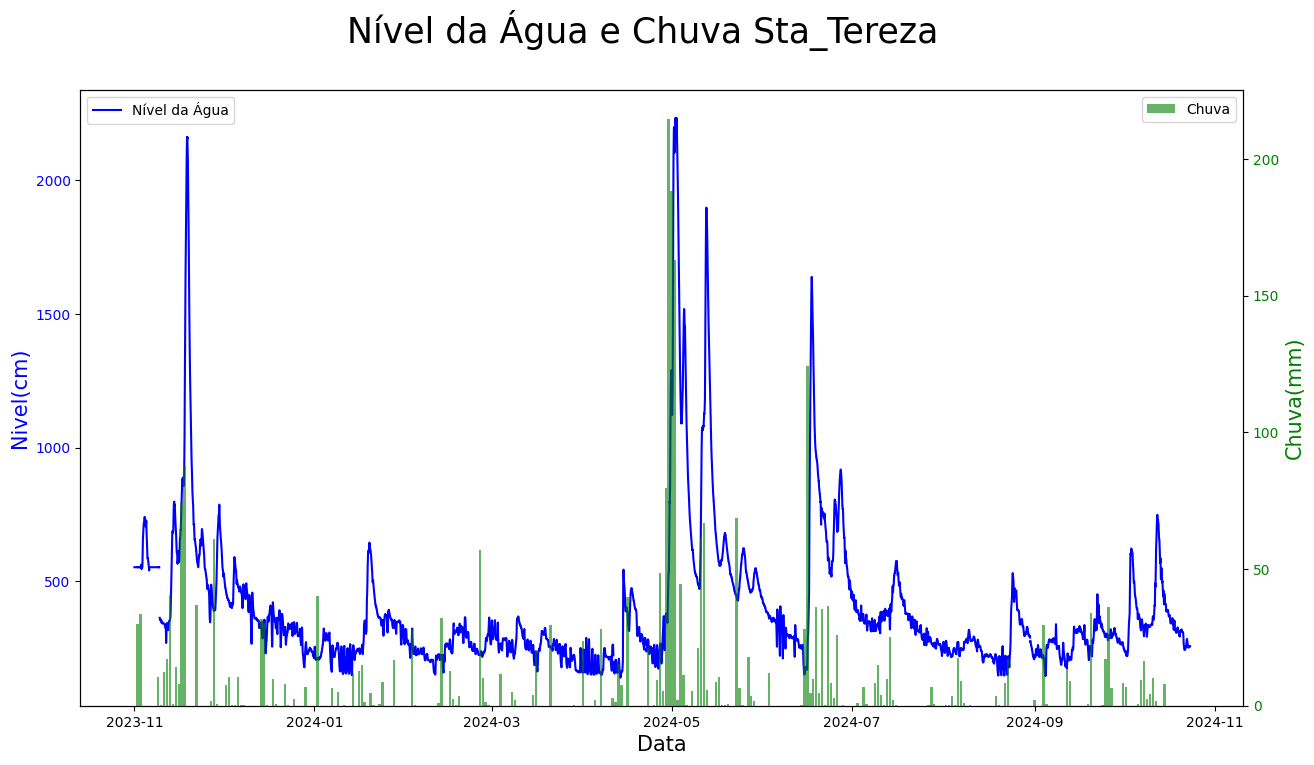

In [72]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Sta_Tereza_unico,
                   "Nível da Água e Chuva Sta_Tereza",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

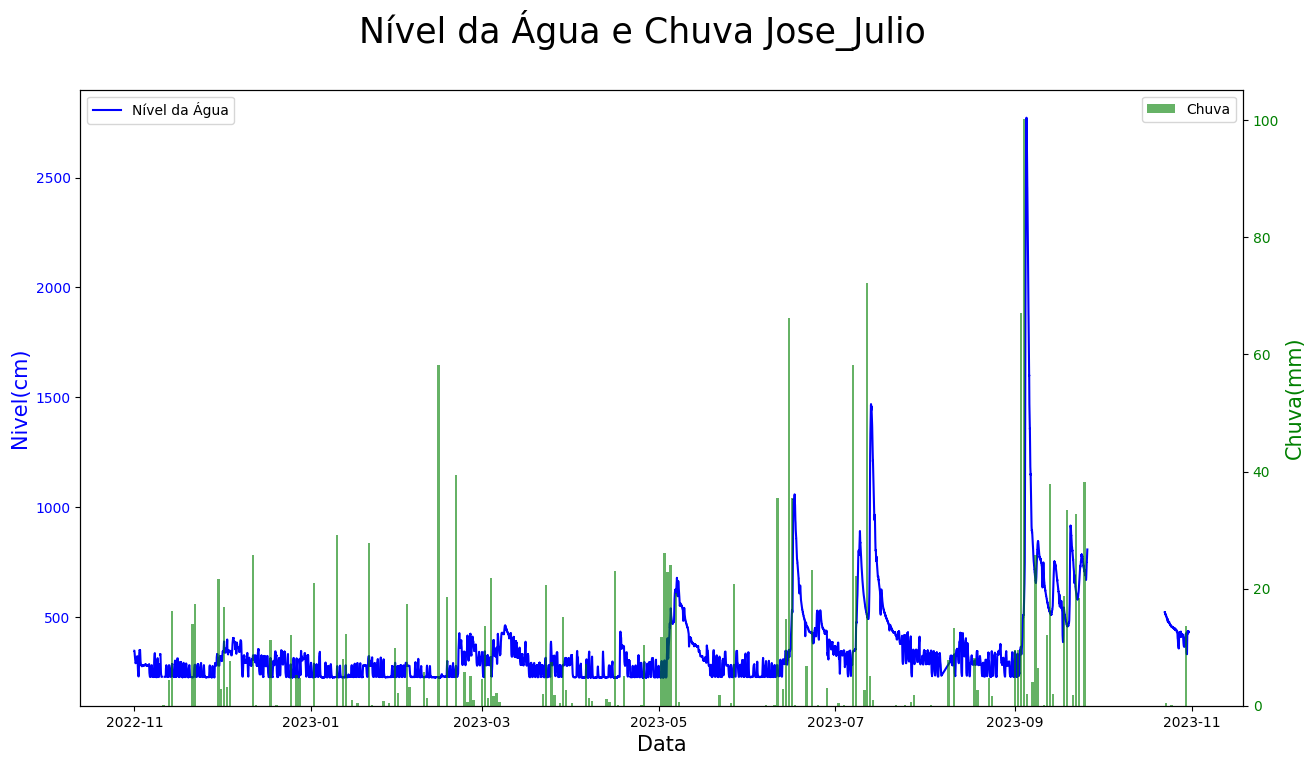

In [73]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2022-11-01')
data_fim = pd.to_datetime('2023-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Jose_Julio_unico,
                   "Nível da Água e Chuva Jose_Julio",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

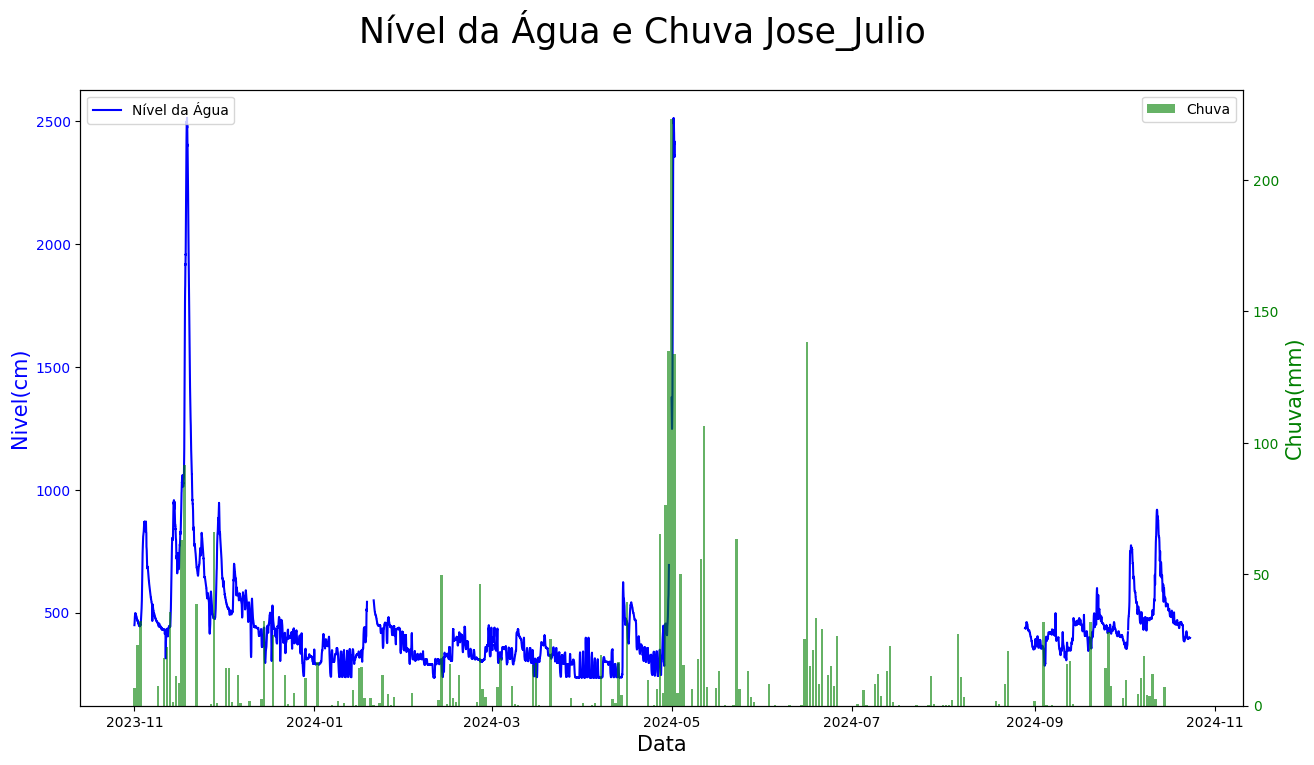

In [74]:
# Definir intervalo de data
data_inicio = pd.to_datetime('2023-11-01')
data_fim = pd.to_datetime('2024-10-31')

plotar_chuva_nivel_agrupa_chuva(df_Jose_Julio_unico,
                   "Nível da Água e Chuva Jose_Julio",
                   "Data",
                   "Nivel(cm)",
                   "Chuva(mm)",
                   coluna_data='Data/Hora',
                   coluna_chuva='Chuva(mm)',
                   coluna_nivel='Nivel(cm)',
                   intervalo_data=(data_inicio, data_fim),
                   frequencia='D' )

# teste

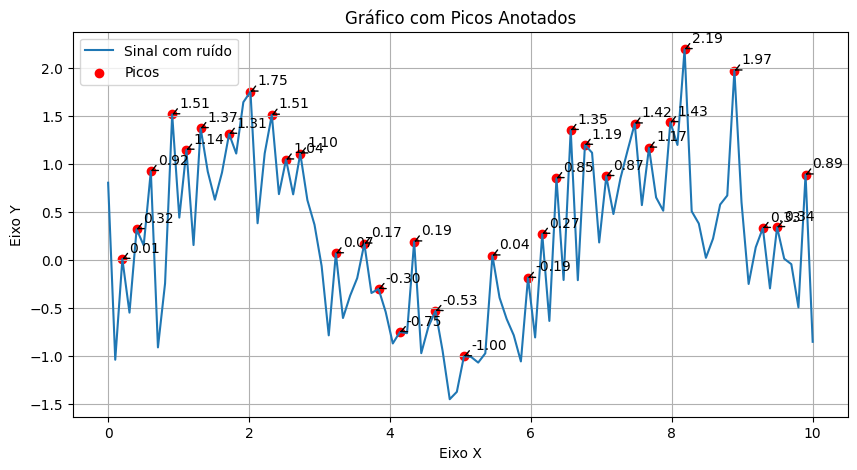

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Criar dados de exemplo
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.5 * np.random.normal(size=x.shape)

# Encontrar os picos
picos = (y[1:-1] > y[:-2]) & (y[1:-1] > y[2:])
x_picos = x[1:-1][picos]
y_picos = y[1:-1][picos]

# Criar o gráfico
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Sinal com ruído')
plt.scatter(x_picos, y_picos, color='red', label='Picos')

# Anotar os picos
for (x_peak, y_peak) in zip(x_picos, y_picos):
    plt.annotate(f'{y_peak:.2f}', xy=(x_peak, y_peak), xytext=(5, 5),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->'))

plt.title('Gráfico com Picos Anotados')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.grid()
plt.show()

#Plotar Grafico usando SNS

In [76]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(16,9)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

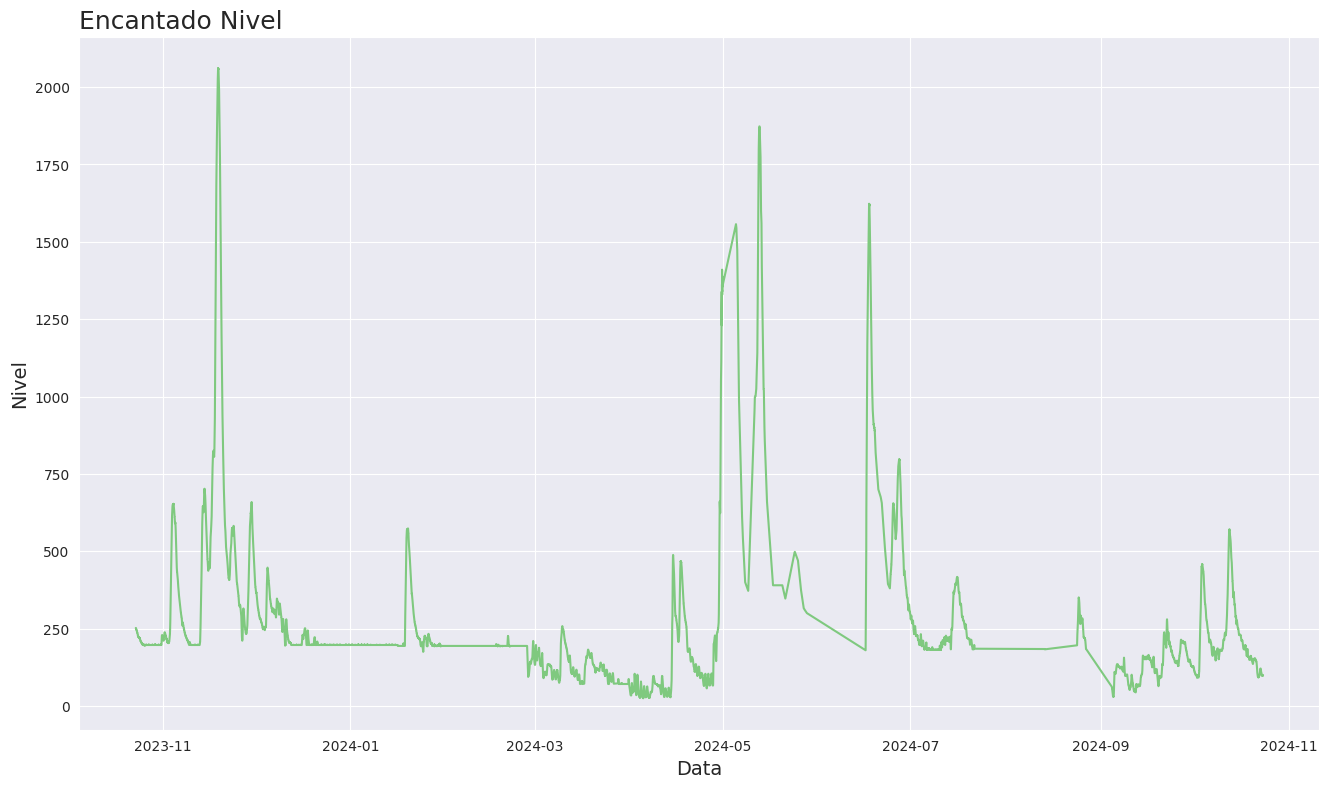

In [77]:
plotar('Encantado Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado24)

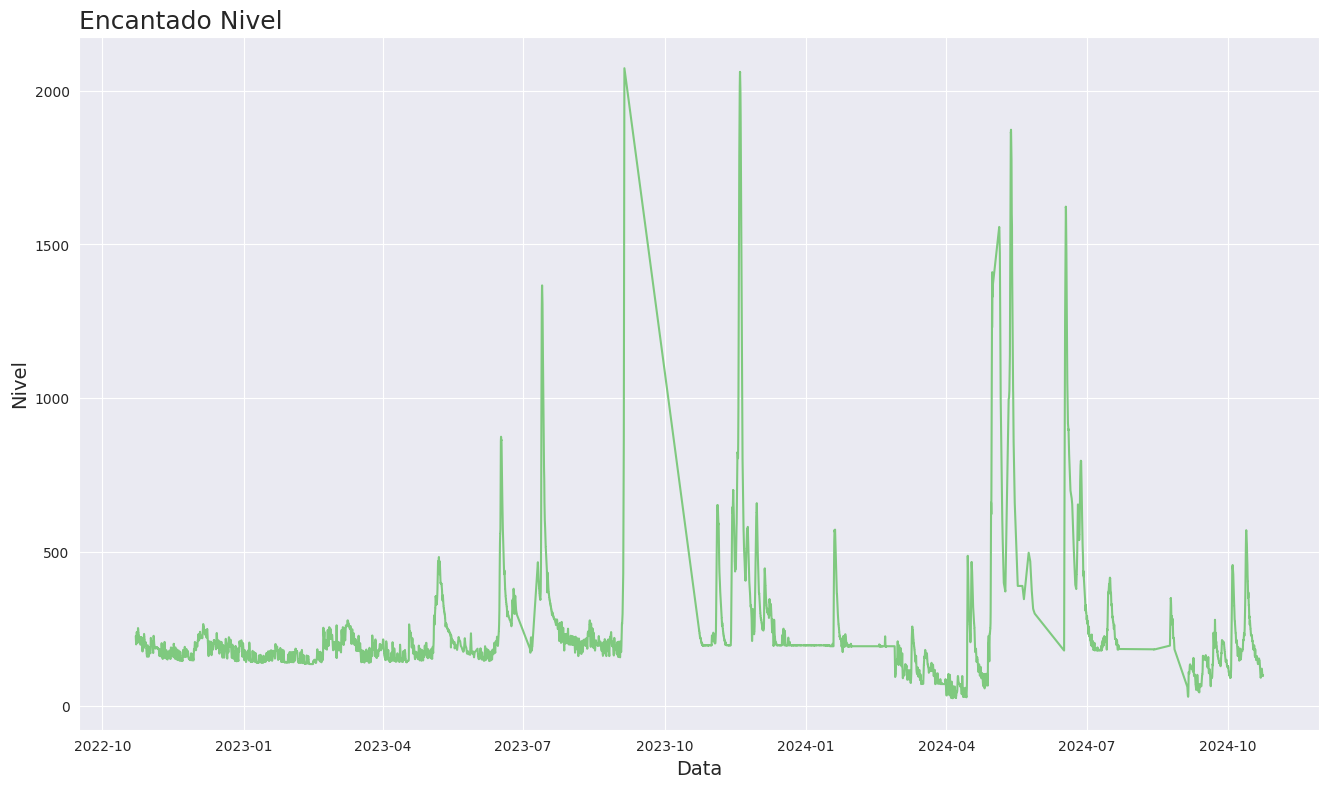

In [78]:
plotar('Encantado Nivel', 'Data', 'Nivel', 'Data/Hora', 'Nivel(cm)', df_Encantado_unico)

In [79]:
df_Encantado_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64814 entries, 0 to 64813
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    64814 non-null  datetime64[ns]
 1   Chuva(mm)    64814 non-null  float64       
 2   Nivel(cm)    52718 non-null  float64       
 3   Vazao(m3/s)  64814 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.0 MB


# Calcular correlação

In [95]:
niveis = [df_Encantado_unico['Nivel(cm)'],df_Mucum_unico['Nivel(cm)'],df_Sta_Tereza_unico['Nivel(cm)'],df_Jose_Julio_unico['Nivel(cm)']]
niveis = pd.concat(niveis, axis=1)
niveis.columns = ['Nivel_Encantado', 'Nivel_Mucum', 'Nivel_Sta_Tereza', 'Nivel_Jose_Julio']


correlacao_niveis = niveis.corr()


chuvas = [df_Encantado_unico['Chuva(mm)'],df_Mucum_unico['Chuva(mm)'],df_Sta_Tereza_unico['Chuva(mm)'],df_Jose_Julio_unico['Chuva(mm)']]
chuvas = pd.concat(chuvas, axis=1)
chuvas.columns = ['chuva_Encantado', 'chuva_Mucum', 'chuva_Sta_Tereza', 'chuva_Jose_Julio']

correlacao_chuvas= chuvas.corr()

vazoes = [df_Encantado_unico['Vazao(m3/s)'],df_Mucum_unico['Vazao(m3/s)'],df_Jose_Julio_unico['Vazao(m3/s)']]
vazoes = pd.concat(vazoes, axis=1)
vazoes.columns = ['Vazao_Encantado', 'Vazao_Mucum', 'Vazao_Jose_Julio']

correlacao_vazoes = vazoes.corr()

correlacoes = [correlacao_niveis, correlacao_chuvas, correlacao_vazoes]
correlacoes = pd.concat(correlacoes, axis=1)

df_geral = [niveis, chuvas, vazoes]
df_geral = pd.concat(df_geral, axis=1)
df_geral

correlacao_geral = df_geral.corr()
correlacao_geral

Nivel_Encantado  Nivel_Mucum  Nivel_Sta_Tereza  \
Nivel_Encantado          1.000000     0.675251          0.626096   
Nivel_Mucum              0.675251     1.000000          0.667657   
Nivel_Sta_Tereza         0.626096     0.667657          1.000000   
Nivel_Jose_Julio         0.705788     0.658962          0.505547   
chuva_Encantado          0.073118     0.097260          0.008816   
chuva_Mucum              0.054835     0.114497          0.013658   
chuva_Sta_Tereza         0.090397     0.217658          0.139679   
chuva_Jose_Julio         0.085540     0.135353          0.040993   
Vazao_Encantado          0.966319     0.653895          0.561025   
Vazao_Mucum              0.724186     0.977554          0.605411   
Vazao_Jose_Julio         0.756561     0.598034          0.352679   

                  Nivel_Jose_Julio  chuva_Encantado  chuva_Mucum  \
Nivel_Encantado           0.705788         0.073118     0.054835   
Nivel_Mucum               0.658962         0.097260     0.114497   
Nivel_Sta_Tereza          0.505547         0.008816     0.013658   
Nivel_Jose_Julio          1.000000         0.067098     0.090496   
chuva_Encantado           0.067098         1.000000     0.109747   
chuva_Mucum               0.090496         0.109747     1.000000   
chuva_Sta_Tereza          0.111490         0.056463     0.065983   
chuva_Jose_Julio          0.110646         0.214283     0.163657   
Vazao_Encantado           0.607563         0.054415     0.094746   
Vazao_Mucum               0.666506         0.102564     0.121420   
Vazao_Jose_Julio          0.938660         0.073693     0.097661   

                  chuva_Sta_Tereza  chuva_Jose_Julio  Vazao_Encantado  \
Nivel_Encantado           0.090397          0.085540         0.966319   
Nivel_Mucum               0.217658          0.135353         0.653895   
Nivel_Sta_Tereza          0.139679          0.040993         0.561025   
Nivel_Jose_Julio          0.111490          0.110646         0.607563   
chuva_Encantado           0.056463          0.214283         0.054415   
chuva_Mucum               0.065983          0.163657         0.094746   
chuva_Sta_Tereza          1.000000          0.079291         0.159178   
chuva_Jose_Julio          0.079291          1.000000         0.128752   
Vazao_Encantado           0.159178          0.128752         1.000000   
Vazao_Mucum               0.227472          0.142590         0.658566   
Vazao_Jose_Julio          0.107269          0.114694         0.588800   

                  Vazao_Mucum  Vazao_Jose_Julio  
Nivel_Encantado      0.724186          0.756561  
Nivel_Mucum          0.977554          0.598034  
Nivel_Sta_Tereza     0.605411          0.352679  
Nivel_Jose_Julio     0.666506          0.938660  
chuva_Encantado      0.102564          0.073693  
chuva_Mucum          0.121420          0.097661  
chuva_Sta_Tereza     0.227472          0.107269  
chuva_Jose_Julio     0.142590          0.114694  
Vazao_Encantado      0.658566          0.588800  
Vazao_Mucum          1.000000          0.648276  
Vazao_Jose_Julio     0.648276          1.000000

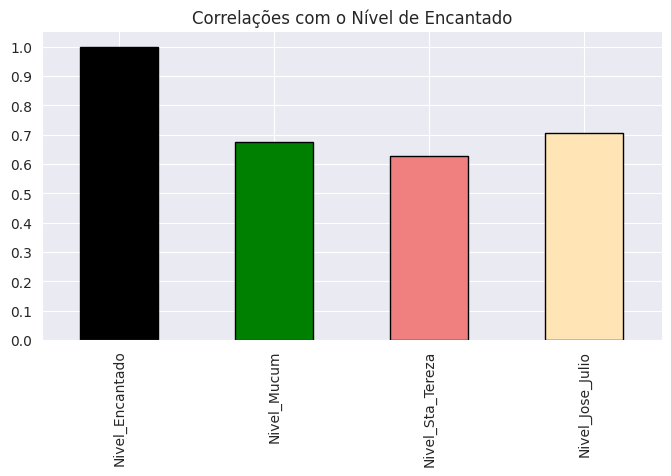

In [96]:
from matplotlib import pyplot as plt
correlacao_niveis['Nivel_Encantado'].plot(kind='bar', figsize=(8, 4), color = ['black','g','lightcoral','moccasin'], edgecolor='black', title='Correlações com o Nível de Encantado')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

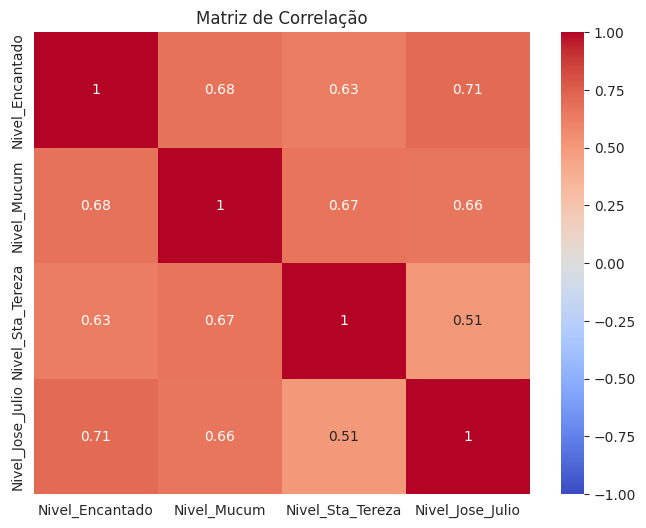

In [97]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
sns.heatmap(correlacao_niveis, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

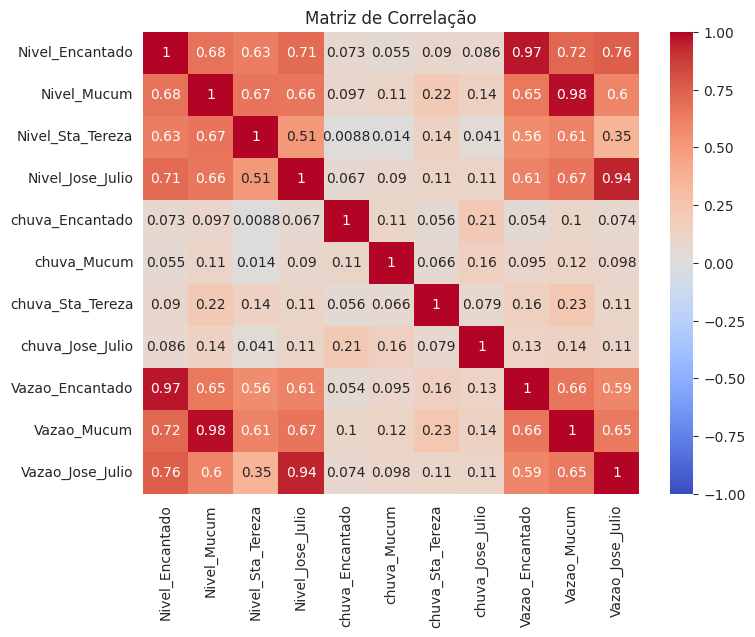

In [98]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
sns.heatmap(correlacao_geral, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

In [100]:
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69397 entries, 0 to 69396
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nivel_Encantado   52718 non-null  float64
 1   Nivel_Mucum       68913 non-null  float64
 2   Nivel_Sta_Tereza  36870 non-null  float64
 3   Nivel_Jose_Julio  55443 non-null  float64
 4   chuva_Encantado   64814 non-null  float64
 5   chuva_Mucum       69201 non-null  float64
 6   chuva_Sta_Tereza  36961 non-null  float64
 7   chuva_Jose_Julio  66981 non-null  float64
 8   Vazao_Encantado   64814 non-null  float64
 9   Vazao_Mucum       68913 non-null  float64
 10  Vazao_Jose_Julio  55443 non-null  float64
dtypes: float64(11)
memory usage: 5.8 MB


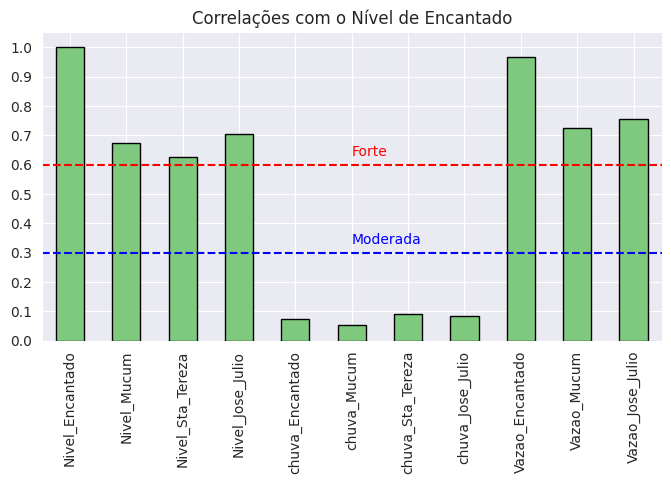

In [102]:
correlacao_geral['Nivel_Encantado'].plot(kind='bar', figsize=(8, 4), edgecolor='black', title='Correlações com o Nível de Encantado')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.yticks(np.arange(0, 1.1, 0.1))
# Adicionar linha horizontal
plt.axhline(y=0.6, color='r', linestyle='--')
plt.axhline(y=0.3, color='b', linestyle='--')
# Adicionar texto acima da linha
plt.text(5, 0.62, 'Forte', color='r', ha='left', va='bottom')
plt.text(5, 0.32, 'Moderada', color='b', ha='left', va='bottom')
plt.show()

## Historiogramas das variáveis




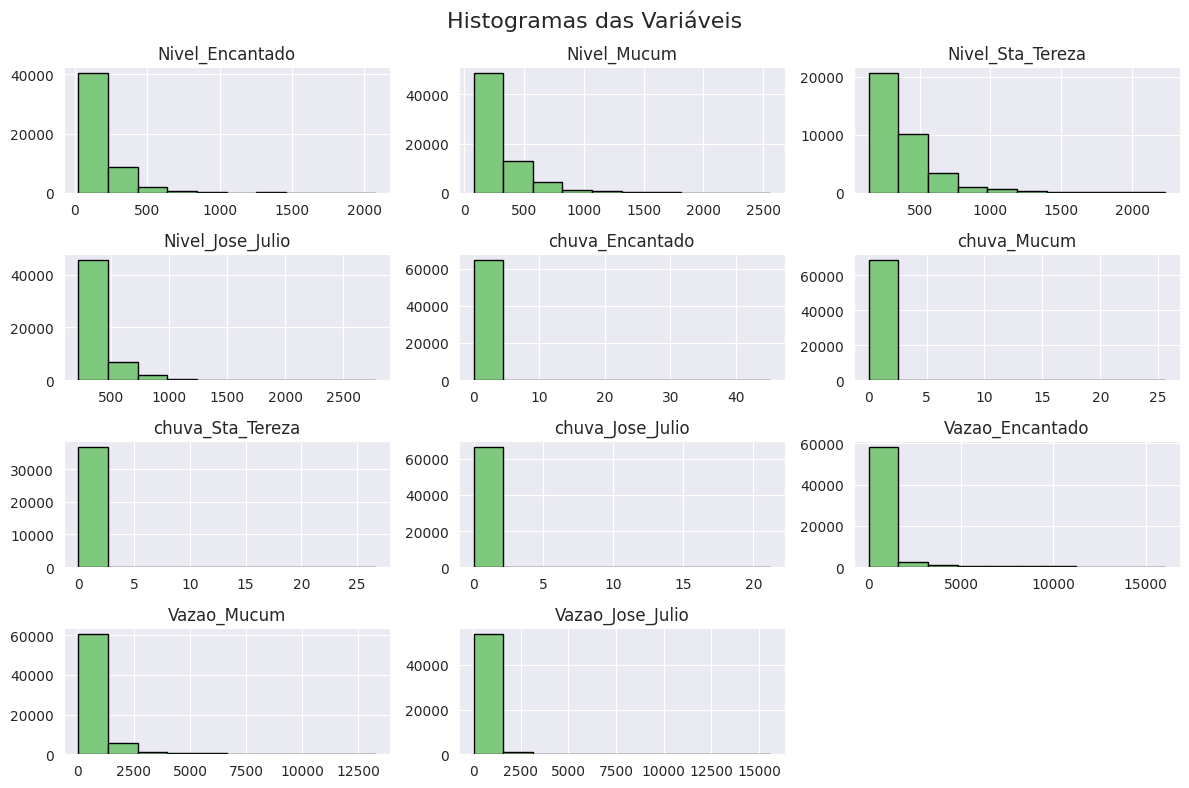

In [103]:
df_geral.hist(figsize=(12, 8), bins=10, edgecolor='black')
plt.suptitle('Histogramas das Variáveis', fontsize=16)
plt.tight_layout()  # Adjusts subplot params for a tight layout
plt.show()

In [110]:

# Calcula a média, mediana e desvio padrão
estatisticas_descritivas = df_geral.agg(['mean', 'median', 'std'])


# Combina as estatísticas em um único DataFrame
tabela_estatisticas = pd.DataFrame({'Média': estatisticas_descritivas.loc['mean'],
                                 'Mediana': estatisticas_descritivas.loc['median'],
                                 'Desvio Padrão': estatisticas_descritivas.loc['std']})
tabela_estatisticas

Média  Mediana  Desvio Padrão
Nivel_Encantado   228.489567    194.0     175.545803
Nivel_Mucum       310.427069    230.0     273.298086
Nivel_Sta_Tereza  413.957147    327.0     274.000715
Nivel_Jose_Julio  384.167379    329.0     216.785172
chuva_Encantado     0.063153      0.0       0.543613
chuva_Mucum         0.076025      0.0       0.602762
chuva_Sta_Tereza    0.081302      0.0       0.588816
chuva_Jose_Julio    0.064076      0.0       0.471712
Vazao_Encantado   810.522605    143.1    2184.650458
Vazao_Mucum       655.566785    271.2    1205.878620
Vazao_Jose_Julio  390.336715    172.8     966.758387